In [1]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb
import matplotlib
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [3]:
path = os.getcwd()+'\\data\\alarm data.csv'

data = pd.read_csv(path,na_values=np.nan)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 2 columns):
Dis      516 non-null float64
Alarm    516 non-null object
dtypes: float64(1), object(1)
memory usage: 8.1+ KB


In [5]:
data1 =  pd.DataFrame(data = data,index = range(1,len(data)))

In [6]:
data = data.reindex(index = range(1,len(data)),fill_value = np.nan)

In [7]:
data.loc[data.Alarm == '20.1a','Alarm'] = 20.1

In [8]:
type(data.Alarm[9])

str

In [9]:
data.loc[:,'Alarm'] = data.Alarm.astype(float)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 1 to 515
Data columns (total 2 columns):
Dis      515 non-null float64
Alarm    515 non-null float64
dtypes: float64(2)
memory usage: 8.1 KB


In [11]:
x_train,x_test,y_train,y_test = train_test_split(data['Dis'],data['Alarm'],
                                                 test_size = 0.3,
                                                 random_state = 42,
                                                 shuffle = True
                                                )

In [12]:
x_train = x_train.reshape(-1,1)
# y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
# y_test = y_test.reshape(-1,1)
# x_train = x_train.ravel()
y_train = y_train.ravel()
# x_test = x_test.ravel()
y_test = y_test.ravel()

C:\Users\XuanYang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\XuanYang\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [13]:
regr = RandomForestRegressor(n_estimators=500,
                             n_jobs=4,
                             criterion='mse',
                             max_depth = 20,
                             min_samples_split = 2,
                             random_state = 42,
                             verbose = 1)


In [14]:
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
r2score = r2_score(y_test,y_pred)
print('R2 score={:f}'.format(r2score))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


R2 score=0.999630


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


In [15]:
result = pd.DataFrame({ 'X':x_test.reshape(1,-1)[0],
                        'y_true':y_test,
                        'y_pred':y_pred})

C:\Users\XuanYang\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


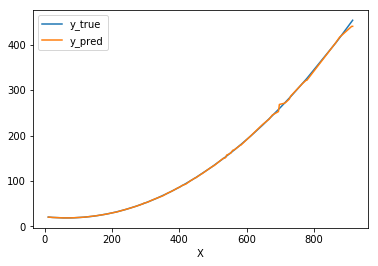

In [16]:
result = result.sort_values(by='X',ascending=True)
result.plot(x=result['X'],y=['y_true','y_pred'],kind='line')

In [17]:
import pickle

In [19]:
with open(os.getcwd()+'\\rf_model.model','wb') as f: # Save RF model
    pickle.dump(regr,f)

In [109]:
grid_param = {'n_estimators':[10,20,50,60,80,100,200,500,1000],
            'max_depth':[2,5,7,10,12,15,20,30],
            'min_samples_split':[2,3,4,5,6],
            }

In [110]:
rf = RandomForestRegressor(random_state = 42,verbose =1, n_jobs=4)
grid_regr = GridSearchCV(rf,grid_param,scoring = 'r2',cv =3 )


In [111]:
grid_regr.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
print(grid_regr.best_params_)

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversion

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jo

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jo

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y 

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jo

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Pa

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Pa

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s 

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.1s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s fin

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s fin

C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.1s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklear

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_pa

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.1s finished
C:\Users\XuanYang\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jo

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}


In [100]:
pred_data = np.array([587,123,257])
pred_data_xgb = xgb.DMatrix(pred_data.reshape(-1,1))

In [101]:
regr.predict(pred_data.reshape(-1,1))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.0s finished


array([ 179.38229524,   20.86493833,   41.35538111])

In [74]:
dtrain = xgb.DMatrix(x_train,y_train)
dvalid = xgb.DMatrix(x_test,y_test)

In [75]:
evallist = [(dvalid,'eval'),(dtrain,'train')]

In [90]:
xgb_params = {"objective":"reg:linear",
              "booster":"gbtree",
              "eta":0.005,
              "max_depth":10,
              "subsample":0.5,
              "colsample_bytree":0.4,
              "min_child_weight":4,
             "silent":1,
             "thread":32,
             "seed":42,
            
             }

In [91]:
num_boost_round = 50000
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round,
                early_stopping_rounds=500,
                evals=evallist,
                )

[0]	eval-rmse:127.547	train-rmse:116.203
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 500 rounds.
[1]	eval-rmse:126.971	train-rmse:115.691
[2]	eval-rmse:126.381	train-rmse:115.168
[3]	eval-rmse:125.791	train-rmse:114.628
[4]	eval-rmse:125.221	train-rmse:114.12
[5]	eval-rmse:124.63	train-rmse:113.587
[6]	eval-rmse:124.062	train-rmse:113.079
[7]	eval-rmse:123.499	train-rmse:112.572
[8]	eval-rmse:122.916	train-rmse:112.052
[9]	eval-rmse:122.341	train-rmse:111.532
[10]	eval-rmse:121.788	train-rmse:111.016
[11]	eval-rmse:121.231	train-rmse:110.517
[12]	eval-rmse:120.653	train-rmse:110.004
[13]	eval-rmse:120.14	train-rmse:109.535
[14]	eval-rmse:119.589	train-rmse:109.033
[15]	eval-rmse:119.037	train-rmse:108.539
[16]	eval-rmse:118.505	train-rmse:108.045
[17]	eval-rmse:117.947	train-rmse:107.54
[18]	eval-rmse:117.446	train-rmse:107.081
[19]	eval-rmse:116.91	train-rmse:106.599
[20]	eval-rmse:116.384	train-

[191]	eval-rmse:55.7083	train-rmse:49.5814
[192]	eval-rmse:55.4823	train-rmse:49.3656
[193]	eval-rmse:55.2585	train-rmse:49.1432
[194]	eval-rmse:55.0303	train-rmse:48.9376
[195]	eval-rmse:54.8152	train-rmse:48.7271
[196]	eval-rmse:54.5893	train-rmse:48.521
[197]	eval-rmse:54.3681	train-rmse:48.3032
[198]	eval-rmse:54.141	train-rmse:48.0907
[199]	eval-rmse:53.9219	train-rmse:47.875
[200]	eval-rmse:53.7007	train-rmse:47.6635
[201]	eval-rmse:53.4803	train-rmse:47.4464
[202]	eval-rmse:53.2595	train-rmse:47.2287
[203]	eval-rmse:53.0572	train-rmse:47.0399
[204]	eval-rmse:52.8502	train-rmse:46.8353
[205]	eval-rmse:52.638	train-rmse:46.6412
[206]	eval-rmse:52.4329	train-rmse:46.4528
[207]	eval-rmse:52.2158	train-rmse:46.2461
[208]	eval-rmse:52.0061	train-rmse:46.0396
[209]	eval-rmse:51.7925	train-rmse:45.8371
[210]	eval-rmse:51.5829	train-rmse:45.6457
[211]	eval-rmse:51.3735	train-rmse:45.4386
[212]	eval-rmse:51.1603	train-rmse:45.2299
[213]	eval-rmse:50.9492	train-rmse:45.024
[214]	eval-rmse:

[383]	eval-rmse:26.7556	train-rmse:21.8312
[384]	eval-rmse:26.6678	train-rmse:21.7469
[385]	eval-rmse:26.5764	train-rmse:21.6593
[386]	eval-rmse:26.4753	train-rmse:21.5618
[387]	eval-rmse:26.3867	train-rmse:21.4798
[388]	eval-rmse:26.2967	train-rmse:21.3912
[389]	eval-rmse:26.2115	train-rmse:21.3079
[390]	eval-rmse:26.1259	train-rmse:21.2234
[391]	eval-rmse:26.0383	train-rmse:21.139
[392]	eval-rmse:25.9304	train-rmse:21.0469
[393]	eval-rmse:25.8435	train-rmse:20.9613
[394]	eval-rmse:25.7605	train-rmse:20.8831
[395]	eval-rmse:25.6756	train-rmse:20.7995
[396]	eval-rmse:25.5716	train-rmse:20.7098
[397]	eval-rmse:25.4632	train-rmse:20.6184
[398]	eval-rmse:25.3717	train-rmse:20.5328
[399]	eval-rmse:25.28	train-rmse:20.4447
[400]	eval-rmse:25.1961	train-rmse:20.3611
[401]	eval-rmse:25.0906	train-rmse:20.2717
[402]	eval-rmse:24.9972	train-rmse:20.1851
[403]	eval-rmse:24.9153	train-rmse:20.1068
[404]	eval-rmse:24.8374	train-rmse:20.0311
[405]	eval-rmse:24.7563	train-rmse:19.9538
[406]	eval-rms

[575]	eval-rmse:14.3909	train-rmse:10.3078
[576]	eval-rmse:14.3479	train-rmse:10.2678
[577]	eval-rmse:14.2994	train-rmse:10.2241
[578]	eval-rmse:14.249	train-rmse:10.1824
[579]	eval-rmse:14.218	train-rmse:10.1515
[580]	eval-rmse:14.1795	train-rmse:10.1149
[581]	eval-rmse:14.1503	train-rmse:10.086
[582]	eval-rmse:14.112	train-rmse:10.05
[583]	eval-rmse:14.082	train-rmse:10.0208
[584]	eval-rmse:14.0519	train-rmse:9.99089
[585]	eval-rmse:14.0225	train-rmse:9.96228
[586]	eval-rmse:13.9878	train-rmse:9.92937
[587]	eval-rmse:13.9577	train-rmse:9.90009
[588]	eval-rmse:13.9295	train-rmse:9.87223
[589]	eval-rmse:13.9021	train-rmse:9.84513
[590]	eval-rmse:13.8704	train-rmse:9.81367
[591]	eval-rmse:13.8385	train-rmse:9.78192
[592]	eval-rmse:13.7895	train-rmse:9.74116
[593]	eval-rmse:13.754	train-rmse:9.70903
[594]	eval-rmse:13.7154	train-rmse:9.67117
[595]	eval-rmse:13.6688	train-rmse:9.63241
[596]	eval-rmse:13.6298	train-rmse:9.59744
[597]	eval-rmse:13.6006	train-rmse:9.56824
[598]	eval-rmse:13.

[767]	eval-rmse:9.07393	train-rmse:5.54276
[768]	eval-rmse:9.06392	train-rmse:5.53293
[769]	eval-rmse:9.05121	train-rmse:5.52113
[770]	eval-rmse:9.04437	train-rmse:5.5138
[771]	eval-rmse:9.03594	train-rmse:5.50528
[772]	eval-rmse:9.01195	train-rmse:5.48624
[773]	eval-rmse:8.99209	train-rmse:5.46889
[774]	eval-rmse:8.98186	train-rmse:5.4589
[775]	eval-rmse:8.95931	train-rmse:5.44043
[776]	eval-rmse:8.94249	train-rmse:5.42591
[777]	eval-rmse:8.92588	train-rmse:5.41172
[778]	eval-rmse:8.91149	train-rmse:5.39925
[779]	eval-rmse:8.8929	train-rmse:5.3841
[780]	eval-rmse:8.88005	train-rmse:5.37255
[781]	eval-rmse:8.87054	train-rmse:5.3632
[782]	eval-rmse:8.85657	train-rmse:5.35116
[783]	eval-rmse:8.83496	train-rmse:5.33261
[784]	eval-rmse:8.81473	train-rmse:5.31481
[785]	eval-rmse:8.79916	train-rmse:5.30168
[786]	eval-rmse:8.78096	train-rmse:5.28579
[787]	eval-rmse:8.76862	train-rmse:5.2747
[788]	eval-rmse:8.75715	train-rmse:5.2645
[789]	eval-rmse:8.74552	train-rmse:5.25348
[790]	eval-rmse:8.

[959]	eval-rmse:6.77614	train-rmse:3.70925
[960]	eval-rmse:6.77403	train-rmse:3.70723
[961]	eval-rmse:6.77287	train-rmse:3.70567
[962]	eval-rmse:6.76139	train-rmse:3.69819
[963]	eval-rmse:6.74603	train-rmse:3.6876
[964]	eval-rmse:6.74128	train-rmse:3.68396
[965]	eval-rmse:6.73921	train-rmse:3.68203
[966]	eval-rmse:6.72737	train-rmse:3.67461
[967]	eval-rmse:6.72305	train-rmse:3.67122
[968]	eval-rmse:6.70996	train-rmse:3.66189
[969]	eval-rmse:6.70334	train-rmse:3.65742
[970]	eval-rmse:6.69928	train-rmse:3.65443
[971]	eval-rmse:6.68399	train-rmse:3.64425
[972]	eval-rmse:6.68075	train-rmse:3.64154
[973]	eval-rmse:6.66999	train-rmse:3.63424
[974]	eval-rmse:6.66179	train-rmse:3.62896
[975]	eval-rmse:6.64713	train-rmse:3.61891
[976]	eval-rmse:6.64577	train-rmse:3.61735
[977]	eval-rmse:6.63964	train-rmse:3.6132
[978]	eval-rmse:6.63051	train-rmse:3.60731
[979]	eval-rmse:6.62973	train-rmse:3.60617
[980]	eval-rmse:6.6257	train-rmse:3.6031
[981]	eval-rmse:6.61978	train-rmse:3.59875
[982]	eval-rmse

[1147]	eval-rmse:5.6798	train-rmse:3.02526
[1148]	eval-rmse:5.67318	train-rmse:3.0226
[1149]	eval-rmse:5.67542	train-rmse:3.02321
[1150]	eval-rmse:5.66919	train-rmse:3.02071
[1151]	eval-rmse:5.66979	train-rmse:3.02066
[1152]	eval-rmse:5.67202	train-rmse:3.02123
[1153]	eval-rmse:5.6658	train-rmse:3.01873
[1154]	eval-rmse:5.66734	train-rmse:3.01909
[1155]	eval-rmse:5.66028	train-rmse:3.01631
[1156]	eval-rmse:5.65948	train-rmse:3.01574
[1157]	eval-rmse:5.64979	train-rmse:3.01218
[1158]	eval-rmse:5.64821	train-rmse:3.01139
[1159]	eval-rmse:5.63849	train-rmse:3.00472
[1160]	eval-rmse:5.6381	train-rmse:3.00436
[1161]	eval-rmse:5.63911	train-rmse:3.00445
[1162]	eval-rmse:5.63992	train-rmse:3.00448
[1163]	eval-rmse:5.63644	train-rmse:3.00169
[1164]	eval-rmse:5.63785	train-rmse:3.00192
[1165]	eval-rmse:5.63115	train-rmse:2.99935
[1166]	eval-rmse:5.62142	train-rmse:2.99296
[1167]	eval-rmse:5.61812	train-rmse:2.99099
[1168]	eval-rmse:5.61753	train-rmse:2.99053
[1169]	eval-rmse:5.61021	train-rmse:

[1335]	eval-rmse:5.1595	train-rmse:2.7589
[1336]	eval-rmse:5.16099	train-rmse:2.75909
[1337]	eval-rmse:5.16219	train-rmse:2.75923
[1338]	eval-rmse:5.16452	train-rmse:2.75972
[1339]	eval-rmse:5.15842	train-rmse:2.75843
[1340]	eval-rmse:5.15816	train-rmse:2.75831
[1341]	eval-rmse:5.1539	train-rmse:2.75629
[1342]	eval-rmse:5.15408	train-rmse:2.75622
[1343]	eval-rmse:5.15393	train-rmse:2.75612
[1344]	eval-rmse:5.14697	train-rmse:2.75189
[1345]	eval-rmse:5.14255	train-rmse:2.75088
[1346]	eval-rmse:5.13571	train-rmse:2.74633
[1347]	eval-rmse:5.12999	train-rmse:2.74516
[1348]	eval-rmse:5.13258	train-rmse:2.74561
[1349]	eval-rmse:5.13216	train-rmse:2.74548
[1350]	eval-rmse:5.1311	train-rmse:2.7452
[1351]	eval-rmse:5.13265	train-rmse:2.74539
[1352]	eval-rmse:5.13153	train-rmse:2.74465
[1353]	eval-rmse:5.13039	train-rmse:2.74436
[1354]	eval-rmse:5.12894	train-rmse:2.74399
[1355]	eval-rmse:5.12312	train-rmse:2.74287
[1356]	eval-rmse:5.11933	train-rmse:2.74205
[1357]	eval-rmse:5.11401	train-rmse:2

[1523]	eval-rmse:4.91031	train-rmse:2.63544
[1524]	eval-rmse:4.90622	train-rmse:2.63276
[1525]	eval-rmse:4.90804	train-rmse:2.63299
[1526]	eval-rmse:4.90378	train-rmse:2.63251
[1527]	eval-rmse:4.90233	train-rmse:2.63179
[1528]	eval-rmse:4.89862	train-rmse:2.63135
[1529]	eval-rmse:4.89968	train-rmse:2.63143
[1530]	eval-rmse:4.89558	train-rmse:2.62896
[1531]	eval-rmse:4.89174	train-rmse:2.62677
[1532]	eval-rmse:4.89309	train-rmse:2.62692
[1533]	eval-rmse:4.89482	train-rmse:2.6271
[1534]	eval-rmse:4.89522	train-rmse:2.62709
[1535]	eval-rmse:4.89304	train-rmse:2.62682
[1536]	eval-rmse:4.88886	train-rmse:2.62634
[1537]	eval-rmse:4.8848	train-rmse:2.62392
[1538]	eval-rmse:4.88667	train-rmse:2.62417
[1539]	eval-rmse:4.88397	train-rmse:2.62385
[1540]	eval-rmse:4.88168	train-rmse:2.62357
[1541]	eval-rmse:4.88251	train-rmse:2.62366
[1542]	eval-rmse:4.87785	train-rmse:2.62307
[1543]	eval-rmse:4.87985	train-rmse:2.62331
[1544]	eval-rmse:4.87734	train-rmse:2.62282
[1545]	eval-rmse:4.87431	train-rms

[1711]	eval-rmse:4.71125	train-rmse:2.53424
[1712]	eval-rmse:4.71299	train-rmse:2.53446
[1713]	eval-rmse:4.71368	train-rmse:2.53446
[1714]	eval-rmse:4.71183	train-rmse:2.53431
[1715]	eval-rmse:4.71372	train-rmse:2.53444
[1716]	eval-rmse:4.71514	train-rmse:2.53452
[1717]	eval-rmse:4.71587	train-rmse:2.53456
[1718]	eval-rmse:4.71622	train-rmse:2.53455
[1719]	eval-rmse:4.71788	train-rmse:2.53465
[1720]	eval-rmse:4.7134	train-rmse:2.53225
[1721]	eval-rmse:4.7132	train-rmse:2.53223
[1722]	eval-rmse:4.70852	train-rmse:2.52849
[1723]	eval-rmse:4.70382	train-rmse:2.52655
[1724]	eval-rmse:4.6999	train-rmse:2.52541
[1725]	eval-rmse:4.69424	train-rmse:2.52484
[1726]	eval-rmse:4.69106	train-rmse:2.52464
[1727]	eval-rmse:4.68873	train-rmse:2.52436
[1728]	eval-rmse:4.68996	train-rmse:2.52442
[1729]	eval-rmse:4.69137	train-rmse:2.5245
[1730]	eval-rmse:4.68704	train-rmse:2.524
[1731]	eval-rmse:4.68289	train-rmse:2.5215
[1732]	eval-rmse:4.68532	train-rmse:2.52164
[1733]	eval-rmse:4.68266	train-rmse:2.5

[1899]	eval-rmse:4.55397	train-rmse:2.45805
[1900]	eval-rmse:4.55011	train-rmse:2.45581
[1901]	eval-rmse:4.54754	train-rmse:2.45487
[1902]	eval-rmse:4.54943	train-rmse:2.45488
[1903]	eval-rmse:4.54705	train-rmse:2.45475
[1904]	eval-rmse:4.54329	train-rmse:2.45254
[1905]	eval-rmse:4.54137	train-rmse:2.45212
[1906]	eval-rmse:4.53605	train-rmse:2.45194
[1907]	eval-rmse:4.53456	train-rmse:2.45192
[1908]	eval-rmse:4.53081	train-rmse:2.44978
[1909]	eval-rmse:4.53202	train-rmse:2.44974
[1910]	eval-rmse:4.53487	train-rmse:2.44972
[1911]	eval-rmse:4.53194	train-rmse:2.44969
[1912]	eval-rmse:4.53366	train-rmse:2.44965
[1913]	eval-rmse:4.53074	train-rmse:2.44963
[1914]	eval-rmse:4.52699	train-rmse:2.44947
[1915]	eval-rmse:4.52322	train-rmse:2.44696
[1916]	eval-rmse:4.5248	train-rmse:2.44693
[1917]	eval-rmse:4.52491	train-rmse:2.44691
[1918]	eval-rmse:4.52656	train-rmse:2.44689
[1919]	eval-rmse:4.52278	train-rmse:2.44354
[1920]	eval-rmse:4.52466	train-rmse:2.4435
[1921]	eval-rmse:4.52094	train-rms

[2087]	eval-rmse:4.45962	train-rmse:2.40302
[2088]	eval-rmse:4.46078	train-rmse:2.40301
[2089]	eval-rmse:4.45871	train-rmse:2.40212
[2090]	eval-rmse:4.46094	train-rmse:2.40221
[2091]	eval-rmse:4.45752	train-rmse:2.39921
[2092]	eval-rmse:4.4584	train-rmse:2.39918
[2093]	eval-rmse:4.45666	train-rmse:2.39914
[2094]	eval-rmse:4.45508	train-rmse:2.39908
[2095]	eval-rmse:4.45289	train-rmse:2.39777
[2096]	eval-rmse:4.44973	train-rmse:2.39647
[2097]	eval-rmse:4.44722	train-rmse:2.39643
[2098]	eval-rmse:4.44923	train-rmse:2.39639
[2099]	eval-rmse:4.44587	train-rmse:2.39468
[2100]	eval-rmse:4.44653	train-rmse:2.39468
[2101]	eval-rmse:4.44822	train-rmse:2.39465
[2102]	eval-rmse:4.44488	train-rmse:2.39465
[2103]	eval-rmse:4.44342	train-rmse:2.39439
[2104]	eval-rmse:4.44128	train-rmse:2.39441
[2105]	eval-rmse:4.44251	train-rmse:2.3944
[2106]	eval-rmse:4.43935	train-rmse:2.39315
[2107]	eval-rmse:4.43773	train-rmse:2.39289
[2108]	eval-rmse:4.44064	train-rmse:2.39282
[2109]	eval-rmse:4.43731	train-rms

[2275]	eval-rmse:4.41474	train-rmse:2.35079
[2276]	eval-rmse:4.41655	train-rmse:2.35082
[2277]	eval-rmse:4.41339	train-rmse:2.34939
[2278]	eval-rmse:4.41193	train-rmse:2.34932
[2279]	eval-rmse:4.41035	train-rmse:2.3493
[2280]	eval-rmse:4.40891	train-rmse:2.34929
[2281]	eval-rmse:4.41024	train-rmse:2.34927
[2282]	eval-rmse:4.40835	train-rmse:2.34925
[2283]	eval-rmse:4.40532	train-rmse:2.3481
[2284]	eval-rmse:4.40725	train-rmse:2.34808
[2285]	eval-rmse:4.4089	train-rmse:2.3481
[2286]	eval-rmse:4.41037	train-rmse:2.34809
[2287]	eval-rmse:4.41108	train-rmse:2.34809
[2288]	eval-rmse:4.40951	train-rmse:2.34802
[2289]	eval-rmse:4.40714	train-rmse:2.34792
[2290]	eval-rmse:4.4055	train-rmse:2.34787
[2291]	eval-rmse:4.40266	train-rmse:2.34571
[2292]	eval-rmse:4.39959	train-rmse:2.3437
[2293]	eval-rmse:4.40113	train-rmse:2.34368
[2294]	eval-rmse:4.39801	train-rmse:2.34226
[2295]	eval-rmse:4.39907	train-rmse:2.34228
[2296]	eval-rmse:4.39981	train-rmse:2.34229
[2297]	eval-rmse:4.39725	train-rmse:2.

[2463]	eval-rmse:4.35727	train-rmse:2.30876
[2464]	eval-rmse:4.3576	train-rmse:2.30876
[2465]	eval-rmse:4.36025	train-rmse:2.30877
[2466]	eval-rmse:4.3611	train-rmse:2.30879
[2467]	eval-rmse:4.35838	train-rmse:2.30779
[2468]	eval-rmse:4.35945	train-rmse:2.30783
[2469]	eval-rmse:4.35658	train-rmse:2.3069
[2470]	eval-rmse:4.35949	train-rmse:2.30691
[2471]	eval-rmse:4.35751	train-rmse:2.30686
[2472]	eval-rmse:4.3531	train-rmse:2.30658
[2473]	eval-rmse:4.35492	train-rmse:2.30664
[2474]	eval-rmse:4.35358	train-rmse:2.30663
[2475]	eval-rmse:4.35512	train-rmse:2.30672
[2476]	eval-rmse:4.35632	train-rmse:2.30676
[2477]	eval-rmse:4.35999	train-rmse:2.30676
[2478]	eval-rmse:4.35826	train-rmse:2.30632
[2479]	eval-rmse:4.35542	train-rmse:2.30482
[2480]	eval-rmse:4.35822	train-rmse:2.30488
[2481]	eval-rmse:4.35679	train-rmse:2.30483
[2482]	eval-rmse:4.35631	train-rmse:2.3048
[2483]	eval-rmse:4.3556	train-rmse:2.30477
[2484]	eval-rmse:4.35514	train-rmse:2.30475
[2485]	eval-rmse:4.35351	train-rmse:2.

[2651]	eval-rmse:4.31209	train-rmse:2.28589
[2652]	eval-rmse:4.31137	train-rmse:2.28586
[2653]	eval-rmse:4.30881	train-rmse:2.28512
[2654]	eval-rmse:4.30618	train-rmse:2.28451
[2655]	eval-rmse:4.30751	train-rmse:2.28451
[2656]	eval-rmse:4.30992	train-rmse:2.28449
[2657]	eval-rmse:4.30747	train-rmse:2.28451
[2658]	eval-rmse:4.30527	train-rmse:2.28447
[2659]	eval-rmse:4.3036	train-rmse:2.28448
[2660]	eval-rmse:4.30534	train-rmse:2.28449
[2661]	eval-rmse:4.30362	train-rmse:2.2845
[2662]	eval-rmse:4.30453	train-rmse:2.28454
[2663]	eval-rmse:4.30312	train-rmse:2.28453
[2664]	eval-rmse:4.30022	train-rmse:2.28443
[2665]	eval-rmse:4.29754	train-rmse:2.28441
[2666]	eval-rmse:4.29728	train-rmse:2.2844
[2667]	eval-rmse:4.29437	train-rmse:2.28441
[2668]	eval-rmse:4.29624	train-rmse:2.28432
[2669]	eval-rmse:4.29887	train-rmse:2.28423
[2670]	eval-rmse:4.29976	train-rmse:2.28426
[2671]	eval-rmse:4.29786	train-rmse:2.28425
[2672]	eval-rmse:4.29655	train-rmse:2.28414
[2673]	eval-rmse:4.29907	train-rmse

[2838]	eval-rmse:4.26193	train-rmse:2.26262
[2839]	eval-rmse:4.26334	train-rmse:2.26255
[2840]	eval-rmse:4.26136	train-rmse:2.26254
[2841]	eval-rmse:4.25892	train-rmse:2.26259
[2842]	eval-rmse:4.25974	train-rmse:2.26259
[2843]	eval-rmse:4.25952	train-rmse:2.26257
[2844]	eval-rmse:4.25819	train-rmse:2.26257
[2845]	eval-rmse:4.25664	train-rmse:2.26257
[2846]	eval-rmse:4.25516	train-rmse:2.26258
[2847]	eval-rmse:4.25385	train-rmse:2.2625
[2848]	eval-rmse:4.25479	train-rmse:2.26245
[2849]	eval-rmse:4.25244	train-rmse:2.2608
[2850]	eval-rmse:4.25222	train-rmse:2.26077
[2851]	eval-rmse:4.25419	train-rmse:2.26066
[2852]	eval-rmse:4.25189	train-rmse:2.25885
[2853]	eval-rmse:4.25213	train-rmse:2.25885
[2854]	eval-rmse:4.25333	train-rmse:2.25879
[2855]	eval-rmse:4.25479	train-rmse:2.25878
[2856]	eval-rmse:4.25298	train-rmse:2.25878
[2857]	eval-rmse:4.2507	train-rmse:2.25884
[2858]	eval-rmse:4.24835	train-rmse:2.25838
[2859]	eval-rmse:4.25025	train-rmse:2.25827
[2860]	eval-rmse:4.25146	train-rmse

[3026]	eval-rmse:4.22546	train-rmse:2.2392
[3027]	eval-rmse:4.22418	train-rmse:2.23913
[3028]	eval-rmse:4.22495	train-rmse:2.23913
[3029]	eval-rmse:4.22675	train-rmse:2.23904
[3030]	eval-rmse:4.22561	train-rmse:2.23863
[3031]	eval-rmse:4.22236	train-rmse:2.23863
[3032]	eval-rmse:4.22022	train-rmse:2.23789
[3033]	eval-rmse:4.22305	train-rmse:2.23776
[3034]	eval-rmse:4.22449	train-rmse:2.23775
[3035]	eval-rmse:4.22328	train-rmse:2.2377
[3036]	eval-rmse:4.22222	train-rmse:2.23749
[3037]	eval-rmse:4.2226	train-rmse:2.23749
[3038]	eval-rmse:4.22045	train-rmse:2.23684
[3039]	eval-rmse:4.21657	train-rmse:2.23676
[3040]	eval-rmse:4.21787	train-rmse:2.23676
[3041]	eval-rmse:4.22003	train-rmse:2.23681
[3042]	eval-rmse:4.21826	train-rmse:2.23681
[3043]	eval-rmse:4.21859	train-rmse:2.2368
[3044]	eval-rmse:4.2216	train-rmse:2.23667
[3045]	eval-rmse:4.22337	train-rmse:2.2366
[3046]	eval-rmse:4.22222	train-rmse:2.2362
[3047]	eval-rmse:4.22125	train-rmse:2.23581
[3048]	eval-rmse:4.2232	train-rmse:2.23

[3214]	eval-rmse:4.18617	train-rmse:2.22206
[3215]	eval-rmse:4.18812	train-rmse:2.22196
[3216]	eval-rmse:4.19048	train-rmse:2.22183
[3217]	eval-rmse:4.19117	train-rmse:2.22181
[3218]	eval-rmse:4.19142	train-rmse:2.22181
[3219]	eval-rmse:4.18924	train-rmse:2.22135
[3220]	eval-rmse:4.18888	train-rmse:2.22134
[3221]	eval-rmse:4.18937	train-rmse:2.22133
[3222]	eval-rmse:4.18764	train-rmse:2.22136
[3223]	eval-rmse:4.18783	train-rmse:2.22136
[3224]	eval-rmse:4.18974	train-rmse:2.22126
[3225]	eval-rmse:4.18789	train-rmse:2.22011
[3226]	eval-rmse:4.18681	train-rmse:2.22008
[3227]	eval-rmse:4.18852	train-rmse:2.22005
[3228]	eval-rmse:4.19036	train-rmse:2.22002
[3229]	eval-rmse:4.18814	train-rmse:2.22005
[3230]	eval-rmse:4.19009	train-rmse:2.21996
[3231]	eval-rmse:4.19251	train-rmse:2.21985
[3232]	eval-rmse:4.19341	train-rmse:2.21985
[3233]	eval-rmse:4.19154	train-rmse:2.21991
[3234]	eval-rmse:4.19388	train-rmse:2.21989
[3235]	eval-rmse:4.19072	train-rmse:2.22001
[3236]	eval-rmse:4.19311	train-r

[3401]	eval-rmse:4.16727	train-rmse:2.20419
[3402]	eval-rmse:4.16985	train-rmse:2.20421
[3403]	eval-rmse:4.17127	train-rmse:2.20414
[3404]	eval-rmse:4.16941	train-rmse:2.20421
[3405]	eval-rmse:4.16773	train-rmse:2.20426
[3406]	eval-rmse:4.16993	train-rmse:2.20417
[3407]	eval-rmse:4.1701	train-rmse:2.20417
[3408]	eval-rmse:4.16887	train-rmse:2.20422
[3409]	eval-rmse:4.17095	train-rmse:2.20412
[3410]	eval-rmse:4.17282	train-rmse:2.20405
[3411]	eval-rmse:4.17167	train-rmse:2.20402
[3412]	eval-rmse:4.17352	train-rmse:2.20393
[3413]	eval-rmse:4.17475	train-rmse:2.20389
[3414]	eval-rmse:4.17623	train-rmse:2.20389
[3415]	eval-rmse:4.17348	train-rmse:2.20388
[3416]	eval-rmse:4.17153	train-rmse:2.20332
[3417]	eval-rmse:4.17133	train-rmse:2.20332
[3418]	eval-rmse:4.17038	train-rmse:2.20335
[3419]	eval-rmse:4.16804	train-rmse:2.20332
[3420]	eval-rmse:4.16616	train-rmse:2.20293
[3421]	eval-rmse:4.16626	train-rmse:2.20293
[3422]	eval-rmse:4.16347	train-rmse:2.20296
[3423]	eval-rmse:4.16187	train-rm

[3588]	eval-rmse:4.15386	train-rmse:2.19218
[3589]	eval-rmse:4.15228	train-rmse:2.19224
[3590]	eval-rmse:4.1504	train-rmse:2.19229
[3591]	eval-rmse:4.1532	train-rmse:2.19217
[3592]	eval-rmse:4.15463	train-rmse:2.19218
[3593]	eval-rmse:4.1557	train-rmse:2.19219
[3594]	eval-rmse:4.15372	train-rmse:2.1922
[3595]	eval-rmse:4.15285	train-rmse:2.19187
[3596]	eval-rmse:4.15489	train-rmse:2.19223
[3597]	eval-rmse:4.15311	train-rmse:2.19131
[3598]	eval-rmse:4.1551	train-rmse:2.19124
[3599]	eval-rmse:4.15355	train-rmse:2.19125
[3600]	eval-rmse:4.15555	train-rmse:2.19117
[3601]	eval-rmse:4.15469	train-rmse:2.1912
[3602]	eval-rmse:4.15554	train-rmse:2.1912
[3603]	eval-rmse:4.15644	train-rmse:2.19119
[3604]	eval-rmse:4.15666	train-rmse:2.19118
[3605]	eval-rmse:4.15582	train-rmse:2.19085
[3606]	eval-rmse:4.15772	train-rmse:2.19079
[3607]	eval-rmse:4.15964	train-rmse:2.19079
[3608]	eval-rmse:4.15942	train-rmse:2.19079
[3609]	eval-rmse:4.16114	train-rmse:2.19074
[3610]	eval-rmse:4.15907	train-rmse:2.1

[3776]	eval-rmse:4.13966	train-rmse:2.18153
[3777]	eval-rmse:4.13909	train-rmse:2.18153
[3778]	eval-rmse:4.13749	train-rmse:2.1816
[3779]	eval-rmse:4.13559	train-rmse:2.18161
[3780]	eval-rmse:4.13347	train-rmse:2.18169
[3781]	eval-rmse:4.13044	train-rmse:2.18173
[3782]	eval-rmse:4.13117	train-rmse:2.18172
[3783]	eval-rmse:4.13185	train-rmse:2.18171
[3784]	eval-rmse:4.13203	train-rmse:2.18169
[3785]	eval-rmse:4.1303	train-rmse:2.18129
[3786]	eval-rmse:4.13103	train-rmse:2.18128
[3787]	eval-rmse:4.13011	train-rmse:2.18131
[3788]	eval-rmse:4.12923	train-rmse:2.18132
[3789]	eval-rmse:4.12736	train-rmse:2.18091
[3790]	eval-rmse:4.12568	train-rmse:2.18008
[3791]	eval-rmse:4.12396	train-rmse:2.17894
[3792]	eval-rmse:4.12214	train-rmse:2.17897
[3793]	eval-rmse:4.12401	train-rmse:2.17894
[3794]	eval-rmse:4.12585	train-rmse:2.17886
[3795]	eval-rmse:4.12501	train-rmse:2.17889
[3796]	eval-rmse:4.12488	train-rmse:2.17889
[3797]	eval-rmse:4.1247	train-rmse:2.17889
[3798]	eval-rmse:4.12664	train-rmse

[3964]	eval-rmse:4.13032	train-rmse:2.1668
[3965]	eval-rmse:4.13128	train-rmse:2.16683
[3966]	eval-rmse:4.13361	train-rmse:2.16683
[3967]	eval-rmse:4.13249	train-rmse:2.16681
[3968]	eval-rmse:4.13064	train-rmse:2.16672
[3969]	eval-rmse:4.13271	train-rmse:2.16707
[3970]	eval-rmse:4.13059	train-rmse:2.16703
[3971]	eval-rmse:4.12948	train-rmse:2.167
[3972]	eval-rmse:4.1296	train-rmse:2.16701
[3973]	eval-rmse:4.12802	train-rmse:2.16696
[3974]	eval-rmse:4.12634	train-rmse:2.16608
[3975]	eval-rmse:4.12825	train-rmse:2.16607
[3976]	eval-rmse:4.12639	train-rmse:2.16607
[3977]	eval-rmse:4.12871	train-rmse:2.16604
[3978]	eval-rmse:4.12991	train-rmse:2.16609
[3979]	eval-rmse:4.13177	train-rmse:2.16604
[3980]	eval-rmse:4.13043	train-rmse:2.16604
[3981]	eval-rmse:4.12906	train-rmse:2.16603
[3982]	eval-rmse:4.12925	train-rmse:2.16604
[3983]	eval-rmse:4.13044	train-rmse:2.16603
[3984]	eval-rmse:4.13238	train-rmse:2.16602
[3985]	eval-rmse:4.13371	train-rmse:2.16606
[3986]	eval-rmse:4.13432	train-rmse:

[4151]	eval-rmse:4.12668	train-rmse:2.15494
[4152]	eval-rmse:4.12364	train-rmse:2.15478
[4153]	eval-rmse:4.12167	train-rmse:2.15468
[4154]	eval-rmse:4.12371	train-rmse:2.15465
[4155]	eval-rmse:4.12453	train-rmse:2.15466
[4156]	eval-rmse:4.12622	train-rmse:2.15475
[4157]	eval-rmse:4.12537	train-rmse:2.15454
[4158]	eval-rmse:4.12515	train-rmse:2.15452
[4159]	eval-rmse:4.12364	train-rmse:2.15452
[4160]	eval-rmse:4.12208	train-rmse:2.15356
[4161]	eval-rmse:4.12039	train-rmse:2.15322
[4162]	eval-rmse:4.12307	train-rmse:2.15327
[4163]	eval-rmse:4.1239	train-rmse:2.15332
[4164]	eval-rmse:4.12472	train-rmse:2.15337
[4165]	eval-rmse:4.12649	train-rmse:2.15341
[4166]	eval-rmse:4.12627	train-rmse:2.15339
[4167]	eval-rmse:4.12455	train-rmse:2.15255
[4168]	eval-rmse:4.12343	train-rmse:2.15252
[4169]	eval-rmse:4.12115	train-rmse:2.15237
[4170]	eval-rmse:4.12037	train-rmse:2.15218
[4171]	eval-rmse:4.12239	train-rmse:2.15253
[4172]	eval-rmse:4.12333	train-rmse:2.15259
[4173]	eval-rmse:4.12474	train-rm

[4339]	eval-rmse:4.10629	train-rmse:2.14283
[4340]	eval-rmse:4.10365	train-rmse:2.14277
[4341]	eval-rmse:4.10575	train-rmse:2.14281
[4342]	eval-rmse:4.10677	train-rmse:2.14283
[4343]	eval-rmse:4.10487	train-rmse:2.14271
[4344]	eval-rmse:4.1069	train-rmse:2.14302
[4345]	eval-rmse:4.10482	train-rmse:2.14298
[4346]	eval-rmse:4.10569	train-rmse:2.14303
[4347]	eval-rmse:4.10546	train-rmse:2.14302
[4348]	eval-rmse:4.10273	train-rmse:2.14296
[4349]	eval-rmse:4.10448	train-rmse:2.14298
[4350]	eval-rmse:4.10266	train-rmse:2.14288
[4351]	eval-rmse:4.10061	train-rmse:2.14276
[4352]	eval-rmse:4.09992	train-rmse:2.14262
[4353]	eval-rmse:4.10033	train-rmse:2.14264
[4354]	eval-rmse:4.09861	train-rmse:2.14261
[4355]	eval-rmse:4.09792	train-rmse:2.14257
[4356]	eval-rmse:4.1007	train-rmse:2.14251
[4357]	eval-rmse:4.09942	train-rmse:2.14249
[4358]	eval-rmse:4.09858	train-rmse:2.14233
[4359]	eval-rmse:4.09673	train-rmse:2.14208
[4360]	eval-rmse:4.09761	train-rmse:2.14213
[4361]	eval-rmse:4.09965	train-rms

[4527]	eval-rmse:4.08742	train-rmse:2.13699
[4528]	eval-rmse:4.08594	train-rmse:2.13604
[4529]	eval-rmse:4.08533	train-rmse:2.1359
[4530]	eval-rmse:4.08349	train-rmse:2.13591
[4531]	eval-rmse:4.08275	train-rmse:2.13589
[4532]	eval-rmse:4.07978	train-rmse:2.13586
[4533]	eval-rmse:4.08128	train-rmse:2.1359
[4534]	eval-rmse:4.07966	train-rmse:2.13594
[4535]	eval-rmse:4.0779	train-rmse:2.13572
[4536]	eval-rmse:4.08049	train-rmse:2.13577
[4537]	eval-rmse:4.079	train-rmse:2.13552
[4538]	eval-rmse:4.07997	train-rmse:2.13551
[4539]	eval-rmse:4.07856	train-rmse:2.1348
[4540]	eval-rmse:4.07584	train-rmse:2.13477
[4541]	eval-rmse:4.07754	train-rmse:2.1348
[4542]	eval-rmse:4.07654	train-rmse:2.13478
[4543]	eval-rmse:4.07381	train-rmse:2.13481
[4544]	eval-rmse:4.07111	train-rmse:2.13485
[4545]	eval-rmse:4.07302	train-rmse:2.13488
[4546]	eval-rmse:4.07239	train-rmse:2.13487
[4547]	eval-rmse:4.07082	train-rmse:2.1349
[4548]	eval-rmse:4.07273	train-rmse:2.13486
[4549]	eval-rmse:4.07004	train-rmse:2.13

[4715]	eval-rmse:4.05266	train-rmse:2.12804
[4716]	eval-rmse:4.05526	train-rmse:2.12788
[4717]	eval-rmse:4.0547	train-rmse:2.12788
[4718]	eval-rmse:4.05588	train-rmse:2.12788
[4719]	eval-rmse:4.05752	train-rmse:2.12784
[4720]	eval-rmse:4.05939	train-rmse:2.12779
[4721]	eval-rmse:4.06131	train-rmse:2.12775
[4722]	eval-rmse:4.06199	train-rmse:2.12773
[4723]	eval-rmse:4.0593	train-rmse:2.12772
[4724]	eval-rmse:4.06184	train-rmse:2.12772
[4725]	eval-rmse:4.06103	train-rmse:2.12774
[4726]	eval-rmse:4.05962	train-rmse:2.12779
[4727]	eval-rmse:4.05875	train-rmse:2.12781
[4728]	eval-rmse:4.06085	train-rmse:2.12808
[4729]	eval-rmse:4.05983	train-rmse:2.1281
[4730]	eval-rmse:4.05816	train-rmse:2.12785
[4731]	eval-rmse:4.05913	train-rmse:2.12785
[4732]	eval-rmse:4.06126	train-rmse:2.12811
[4733]	eval-rmse:4.06324	train-rmse:2.12807
[4734]	eval-rmse:4.06593	train-rmse:2.12796
[4735]	eval-rmse:4.06649	train-rmse:2.12796
[4736]	eval-rmse:4.06733	train-rmse:2.12795
[4737]	eval-rmse:4.06813	train-rmse

[4903]	eval-rmse:4.05953	train-rmse:2.12341
[4904]	eval-rmse:4.05827	train-rmse:2.1226
[4905]	eval-rmse:4.06087	train-rmse:2.12256
[4906]	eval-rmse:4.06077	train-rmse:2.12256
[4907]	eval-rmse:4.06346	train-rmse:2.12247
[4908]	eval-rmse:4.06484	train-rmse:2.1225
[4909]	eval-rmse:4.06349	train-rmse:2.1225
[4910]	eval-rmse:4.06466	train-rmse:2.12253
[4911]	eval-rmse:4.06333	train-rmse:2.12253
[4912]	eval-rmse:4.06221	train-rmse:2.12253
[4913]	eval-rmse:4.06232	train-rmse:2.12253
[4914]	eval-rmse:4.06164	train-rmse:2.12246
[4915]	eval-rmse:4.06374	train-rmse:2.12251
[4916]	eval-rmse:4.06364	train-rmse:2.1225
[4917]	eval-rmse:4.06488	train-rmse:2.1225
[4918]	eval-rmse:4.06431	train-rmse:2.12237
[4919]	eval-rmse:4.0632	train-rmse:2.12233
[4920]	eval-rmse:4.06177	train-rmse:2.12217
[4921]	eval-rmse:4.06444	train-rmse:2.12208
[4922]	eval-rmse:4.06339	train-rmse:2.12205
[4923]	eval-rmse:4.06217	train-rmse:2.12204
[4924]	eval-rmse:4.06272	train-rmse:2.12206
[4925]	eval-rmse:4.06108	train-rmse:2.

[5091]	eval-rmse:4.08927	train-rmse:2.11777
[5092]	eval-rmse:4.09002	train-rmse:2.11781
[5093]	eval-rmse:4.09072	train-rmse:2.11784
[5094]	eval-rmse:4.08971	train-rmse:2.1178
[5095]	eval-rmse:4.08805	train-rmse:2.1177
[5096]	eval-rmse:4.09018	train-rmse:2.11775
[5097]	eval-rmse:4.08832	train-rmse:2.1176
[5098]	eval-rmse:4.08813	train-rmse:2.11759
[5099]	eval-rmse:4.08633	train-rmse:2.11754
[5100]	eval-rmse:4.08419	train-rmse:2.11749
[5101]	eval-rmse:4.08329	train-rmse:2.11745
[5102]	eval-rmse:4.08176	train-rmse:2.11738
[5103]	eval-rmse:4.08248	train-rmse:2.11742
[5104]	eval-rmse:4.08425	train-rmse:2.11755
[5105]	eval-rmse:4.08596	train-rmse:2.11757
[5106]	eval-rmse:4.08421	train-rmse:2.11748
[5107]	eval-rmse:4.08573	train-rmse:2.11751
[5108]	eval-rmse:4.08549	train-rmse:2.11749
[5109]	eval-rmse:4.08363	train-rmse:2.11739
[5110]	eval-rmse:4.08172	train-rmse:2.11726
[5111]	eval-rmse:4.08226	train-rmse:2.1173
[5112]	eval-rmse:4.0839	train-rmse:2.11741
[5113]	eval-rmse:4.0824	train-rmse:2.

[5279]	eval-rmse:4.04745	train-rmse:2.1084
[5280]	eval-rmse:4.04979	train-rmse:2.10843
[5281]	eval-rmse:4.04995	train-rmse:2.10844
[5282]	eval-rmse:4.04752	train-rmse:2.10839
[5283]	eval-rmse:4.04971	train-rmse:2.10837
[5284]	eval-rmse:4.0484	train-rmse:2.10817
[5285]	eval-rmse:4.04712	train-rmse:2.10798
[5286]	eval-rmse:4.04896	train-rmse:2.10801
[5287]	eval-rmse:4.04784	train-rmse:2.10801
[5288]	eval-rmse:4.0462	train-rmse:2.10779
[5289]	eval-rmse:4.04571	train-rmse:2.1077
[5290]	eval-rmse:4.04686	train-rmse:2.10775
[5291]	eval-rmse:4.0463	train-rmse:2.1077
[5292]	eval-rmse:4.04694	train-rmse:2.10772
[5293]	eval-rmse:4.04827	train-rmse:2.10769
[5294]	eval-rmse:4.04635	train-rmse:2.10766
[5295]	eval-rmse:4.04855	train-rmse:2.1077
[5296]	eval-rmse:4.04966	train-rmse:2.10775
[5297]	eval-rmse:4.04853	train-rmse:2.10772
[5298]	eval-rmse:4.05085	train-rmse:2.10777
[5299]	eval-rmse:4.05251	train-rmse:2.10786
[5300]	eval-rmse:4.05059	train-rmse:2.10781
[5301]	eval-rmse:4.05069	train-rmse:2.1

[5467]	eval-rmse:4.03331	train-rmse:2.10119
[5468]	eval-rmse:4.03318	train-rmse:2.10119
[5469]	eval-rmse:4.0352	train-rmse:2.10115
[5470]	eval-rmse:4.03318	train-rmse:2.10108
[5471]	eval-rmse:4.03061	train-rmse:2.10098
[5472]	eval-rmse:4.03137	train-rmse:2.101
[5473]	eval-rmse:4.03013	train-rmse:2.10097
[5474]	eval-rmse:4.03127	train-rmse:2.10101
[5475]	eval-rmse:4.03214	train-rmse:2.10101
[5476]	eval-rmse:4.03298	train-rmse:2.10105
[5477]	eval-rmse:4.03174	train-rmse:2.10106
[5478]	eval-rmse:4.02998	train-rmse:2.10101
[5479]	eval-rmse:4.02717	train-rmse:2.10094
[5480]	eval-rmse:4.02515	train-rmse:2.10099
[5481]	eval-rmse:4.02457	train-rmse:2.10092
[5482]	eval-rmse:4.02612	train-rmse:2.10087
[5483]	eval-rmse:4.02534	train-rmse:2.10089
[5484]	eval-rmse:4.02482	train-rmse:2.10081
[5485]	eval-rmse:4.02746	train-rmse:2.10075
[5486]	eval-rmse:4.02701	train-rmse:2.10067
[5487]	eval-rmse:4.02919	train-rmse:2.10089
[5488]	eval-rmse:4.02732	train-rmse:2.10092
[5489]	eval-rmse:4.02953	train-rmse

[5655]	eval-rmse:4.03142	train-rmse:2.09579
[5656]	eval-rmse:4.02948	train-rmse:2.09573
[5657]	eval-rmse:4.02734	train-rmse:2.09563
[5658]	eval-rmse:4.02946	train-rmse:2.09568
[5659]	eval-rmse:4.03192	train-rmse:2.09566
[5660]	eval-rmse:4.03109	train-rmse:2.09564
[5661]	eval-rmse:4.02917	train-rmse:2.09563
[5662]	eval-rmse:4.02934	train-rmse:2.09564
[5663]	eval-rmse:4.02744	train-rmse:2.09559
[5664]	eval-rmse:4.02998	train-rmse:2.09556
[5665]	eval-rmse:4.02861	train-rmse:2.09549
[5666]	eval-rmse:4.02744	train-rmse:2.09546
[5667]	eval-rmse:4.02962	train-rmse:2.09543
[5668]	eval-rmse:4.02807	train-rmse:2.09527
[5669]	eval-rmse:4.02797	train-rmse:2.09527
[5670]	eval-rmse:4.0301	train-rmse:2.0955
[5671]	eval-rmse:4.02899	train-rmse:2.09547
[5672]	eval-rmse:4.02894	train-rmse:2.09547
[5673]	eval-rmse:4.0298	train-rmse:2.09551
[5674]	eval-rmse:4.02788	train-rmse:2.09552
[5675]	eval-rmse:4.02665	train-rmse:2.09498
[5676]	eval-rmse:4.02445	train-rmse:2.09488
[5677]	eval-rmse:4.02655	train-rmse

[5842]	eval-rmse:4.02313	train-rmse:2.09091
[5843]	eval-rmse:4.02144	train-rmse:2.09087
[5844]	eval-rmse:4.02389	train-rmse:2.09085
[5845]	eval-rmse:4.0227	train-rmse:2.0907
[5846]	eval-rmse:4.02386	train-rmse:2.09073
[5847]	eval-rmse:4.02277	train-rmse:2.09069
[5848]	eval-rmse:4.02513	train-rmse:2.09075
[5849]	eval-rmse:4.02557	train-rmse:2.09076
[5850]	eval-rmse:4.02347	train-rmse:2.0907
[5851]	eval-rmse:4.02155	train-rmse:2.09071
[5852]	eval-rmse:4.02324	train-rmse:2.09077
[5853]	eval-rmse:4.02452	train-rmse:2.09076
[5854]	eval-rmse:4.02327	train-rmse:2.09009
[5855]	eval-rmse:4.02474	train-rmse:2.09013
[5856]	eval-rmse:4.02325	train-rmse:2.08994
[5857]	eval-rmse:4.0217	train-rmse:2.08977
[5858]	eval-rmse:4.02058	train-rmse:2.08974
[5859]	eval-rmse:4.02179	train-rmse:2.08977
[5860]	eval-rmse:4.02261	train-rmse:2.08981
[5861]	eval-rmse:4.02108	train-rmse:2.08964
[5862]	eval-rmse:4.0236	train-rmse:2.08963
[5863]	eval-rmse:4.02366	train-rmse:2.08963
[5864]	eval-rmse:4.02435	train-rmse:2

[6030]	eval-rmse:4.00996	train-rmse:2.08303
[6031]	eval-rmse:4.00882	train-rmse:2.0829
[6032]	eval-rmse:4.00827	train-rmse:2.08284
[6033]	eval-rmse:4.00891	train-rmse:2.08285
[6034]	eval-rmse:4.00776	train-rmse:2.08275
[6035]	eval-rmse:4.0065	train-rmse:2.08276
[6036]	eval-rmse:4.005	train-rmse:2.08274
[6037]	eval-rmse:4.00447	train-rmse:2.0827
[6038]	eval-rmse:4.00639	train-rmse:2.08274
[6039]	eval-rmse:4.00665	train-rmse:2.08275
[6040]	eval-rmse:4.00824	train-rmse:2.08277
[6041]	eval-rmse:4.01019	train-rmse:2.08276
[6042]	eval-rmse:4.00832	train-rmse:2.08272
[6043]	eval-rmse:4.00791	train-rmse:2.08266
[6044]	eval-rmse:4.00826	train-rmse:2.08267
[6045]	eval-rmse:4.01056	train-rmse:2.08265
[6046]	eval-rmse:4.01309	train-rmse:2.08272
[6047]	eval-rmse:4.01085	train-rmse:2.08263
[6048]	eval-rmse:4.01045	train-rmse:2.08262
[6049]	eval-rmse:4.01137	train-rmse:2.08265
[6050]	eval-rmse:4.01022	train-rmse:2.08266
[6051]	eval-rmse:4.01235	train-rmse:2.08263
[6052]	eval-rmse:4.01326	train-rmse:2

[6218]	eval-rmse:3.99125	train-rmse:2.07761
[6219]	eval-rmse:3.98934	train-rmse:2.07765
[6220]	eval-rmse:3.98703	train-rmse:2.07766
[6221]	eval-rmse:3.98814	train-rmse:2.07765
[6222]	eval-rmse:3.98767	train-rmse:2.0776
[6223]	eval-rmse:3.98982	train-rmse:2.0776
[6224]	eval-rmse:3.99221	train-rmse:2.07752
[6225]	eval-rmse:3.99245	train-rmse:2.07752
[6226]	eval-rmse:3.99439	train-rmse:2.07754
[6227]	eval-rmse:3.99399	train-rmse:2.07753
[6228]	eval-rmse:3.9947	train-rmse:2.07754
[6229]	eval-rmse:3.99583	train-rmse:2.07755
[6230]	eval-rmse:3.99597	train-rmse:2.07755
[6231]	eval-rmse:3.99467	train-rmse:2.07757
[6232]	eval-rmse:3.99521	train-rmse:2.07758
[6233]	eval-rmse:3.99485	train-rmse:2.07753
[6234]	eval-rmse:3.99578	train-rmse:2.07755
[6235]	eval-rmse:3.99772	train-rmse:2.07752
[6236]	eval-rmse:3.99722	train-rmse:2.07746
[6237]	eval-rmse:3.99465	train-rmse:2.07742
[6238]	eval-rmse:3.99652	train-rmse:2.07745
[6239]	eval-rmse:3.99713	train-rmse:2.07744
[6240]	eval-rmse:3.99951	train-rmse

[6406]	eval-rmse:3.94801	train-rmse:2.07426
[6407]	eval-rmse:3.94827	train-rmse:2.07424
[6408]	eval-rmse:3.94752	train-rmse:2.07429
[6409]	eval-rmse:3.94776	train-rmse:2.07427
[6410]	eval-rmse:3.94675	train-rmse:2.07436
[6411]	eval-rmse:3.94591	train-rmse:2.07434
[6412]	eval-rmse:3.94728	train-rmse:2.07425
[6413]	eval-rmse:3.94891	train-rmse:2.07413
[6414]	eval-rmse:3.94775	train-rmse:2.0742
[6415]	eval-rmse:3.94943	train-rmse:2.07409
[6416]	eval-rmse:3.95083	train-rmse:2.07397
[6417]	eval-rmse:3.95285	train-rmse:2.07381
[6418]	eval-rmse:3.95284	train-rmse:2.07381
[6419]	eval-rmse:3.95182	train-rmse:2.07389
[6420]	eval-rmse:3.95094	train-rmse:2.07387
[6421]	eval-rmse:3.95064	train-rmse:2.07385
[6422]	eval-rmse:3.94907	train-rmse:2.07398
[6423]	eval-rmse:3.9483	train-rmse:2.07404
[6424]	eval-rmse:3.94836	train-rmse:2.07404
[6425]	eval-rmse:3.94749	train-rmse:2.0735
[6426]	eval-rmse:3.94692	train-rmse:2.07353
[6427]	eval-rmse:3.94599	train-rmse:2.07361
[6428]	eval-rmse:3.94638	train-rmse

[6593]	eval-rmse:3.94016	train-rmse:2.07061
[6594]	eval-rmse:3.93931	train-rmse:2.07022
[6595]	eval-rmse:3.93837	train-rmse:2.0703
[6596]	eval-rmse:3.93834	train-rmse:2.07031
[6597]	eval-rmse:3.93828	train-rmse:2.07031
[6598]	eval-rmse:3.93706	train-rmse:2.07039
[6599]	eval-rmse:3.93505	train-rmse:2.07054
[6600]	eval-rmse:3.93451	train-rmse:2.07058
[6601]	eval-rmse:3.93291	train-rmse:2.07069
[6602]	eval-rmse:3.9349	train-rmse:2.07049
[6603]	eval-rmse:3.93708	train-rmse:2.07027
[6604]	eval-rmse:3.9386	train-rmse:2.07013
[6605]	eval-rmse:3.93776	train-rmse:2.07012
[6606]	eval-rmse:3.93834	train-rmse:2.07008
[6607]	eval-rmse:3.93754	train-rmse:2.07003
[6608]	eval-rmse:3.93599	train-rmse:2.07019
[6609]	eval-rmse:3.93712	train-rmse:2.07012
[6610]	eval-rmse:3.93517	train-rmse:2.07026
[6611]	eval-rmse:3.93509	train-rmse:2.07026
[6612]	eval-rmse:3.93491	train-rmse:2.07027
[6613]	eval-rmse:3.93615	train-rmse:2.07018
[6614]	eval-rmse:3.93702	train-rmse:2.07009
[6615]	eval-rmse:3.93794	train-rmse

[6781]	eval-rmse:3.92722	train-rmse:2.06668
[6782]	eval-rmse:3.92648	train-rmse:2.06665
[6783]	eval-rmse:3.92833	train-rmse:2.06644
[6784]	eval-rmse:3.9308	train-rmse:2.06627
[6785]	eval-rmse:3.93227	train-rmse:2.06613
[6786]	eval-rmse:3.93465	train-rmse:2.06597
[6787]	eval-rmse:3.93505	train-rmse:2.06595
[6788]	eval-rmse:3.93521	train-rmse:2.06593
[6789]	eval-rmse:3.93768	train-rmse:2.0657
[6790]	eval-rmse:3.93569	train-rmse:2.06582
[6791]	eval-rmse:3.93766	train-rmse:2.0657
[6792]	eval-rmse:3.93772	train-rmse:2.06569
[6793]	eval-rmse:3.94006	train-rmse:2.06548
[6794]	eval-rmse:3.93883	train-rmse:2.06555
[6795]	eval-rmse:3.94105	train-rmse:2.06559
[6796]	eval-rmse:3.93865	train-rmse:2.06568
[6797]	eval-rmse:3.93854	train-rmse:2.06569
[6798]	eval-rmse:3.9375	train-rmse:2.06574
[6799]	eval-rmse:3.93878	train-rmse:2.06567
[6800]	eval-rmse:3.93687	train-rmse:2.06577
[6801]	eval-rmse:3.93838	train-rmse:2.06569
[6802]	eval-rmse:3.93873	train-rmse:2.06567
[6803]	eval-rmse:3.94055	train-rmse:

[6969]	eval-rmse:3.94496	train-rmse:2.06134
[6970]	eval-rmse:3.94416	train-rmse:2.06097
[6971]	eval-rmse:3.94319	train-rmse:2.06097
[6972]	eval-rmse:3.94382	train-rmse:2.06093
[6973]	eval-rmse:3.94296	train-rmse:2.06047
[6974]	eval-rmse:3.94119	train-rmse:2.06053
[6975]	eval-rmse:3.94038	train-rmse:2.0605
[6976]	eval-rmse:3.94192	train-rmse:2.0604
[6977]	eval-rmse:3.94071	train-rmse:2.06035
[6978]	eval-rmse:3.93884	train-rmse:2.06042
[6979]	eval-rmse:3.93802	train-rmse:2.06001
[6980]	eval-rmse:3.93685	train-rmse:2.06006
[6981]	eval-rmse:3.93578	train-rmse:2.06011
[6982]	eval-rmse:3.93647	train-rmse:2.06008
[6983]	eval-rmse:3.936	train-rmse:2.0601
[6984]	eval-rmse:3.9374	train-rmse:2.05999
[6985]	eval-rmse:3.93644	train-rmse:2.06006
[6986]	eval-rmse:3.9374	train-rmse:2.06005
[6987]	eval-rmse:3.93937	train-rmse:2.05997
[6988]	eval-rmse:3.93996	train-rmse:2.05994
[6989]	eval-rmse:3.94237	train-rmse:2.05979
[6990]	eval-rmse:3.93998	train-rmse:2.05983
[6991]	eval-rmse:3.94037	train-rmse:2.0

[7157]	eval-rmse:3.92213	train-rmse:2.05881
[7158]	eval-rmse:3.92146	train-rmse:2.05885
[7159]	eval-rmse:3.92294	train-rmse:2.05876
[7160]	eval-rmse:3.92417	train-rmse:2.05868
[7161]	eval-rmse:3.92393	train-rmse:2.05867
[7162]	eval-rmse:3.92516	train-rmse:2.05859
[7163]	eval-rmse:3.92449	train-rmse:2.05814
[7164]	eval-rmse:3.9265	train-rmse:2.05802
[7165]	eval-rmse:3.92574	train-rmse:2.05758
[7166]	eval-rmse:3.92517	train-rmse:2.05763
[7167]	eval-rmse:3.92389	train-rmse:2.05768
[7168]	eval-rmse:3.92596	train-rmse:2.05756
[7169]	eval-rmse:3.92421	train-rmse:2.05765
[7170]	eval-rmse:3.92345	train-rmse:2.05763
[7171]	eval-rmse:3.92253	train-rmse:2.05769
[7172]	eval-rmse:3.92055	train-rmse:2.05782
[7173]	eval-rmse:3.92198	train-rmse:2.05773
[7174]	eval-rmse:3.92157	train-rmse:2.05776
[7175]	eval-rmse:3.9232	train-rmse:2.05768
[7176]	eval-rmse:3.92501	train-rmse:2.05753
[7177]	eval-rmse:3.92359	train-rmse:2.05764
[7178]	eval-rmse:3.9238	train-rmse:2.05763
[7179]	eval-rmse:3.926	train-rmse:2

[7345]	eval-rmse:3.93354	train-rmse:2.05487
[7346]	eval-rmse:3.93581	train-rmse:2.05475
[7347]	eval-rmse:3.93818	train-rmse:2.05463
[7348]	eval-rmse:3.9368	train-rmse:2.05466
[7349]	eval-rmse:3.93906	train-rmse:2.05452
[7350]	eval-rmse:3.93717	train-rmse:2.05456
[7351]	eval-rmse:3.93746	train-rmse:2.05456
[7352]	eval-rmse:3.93953	train-rmse:2.05442
[7353]	eval-rmse:3.93985	train-rmse:2.05441
[7354]	eval-rmse:3.94065	train-rmse:2.0544
[7355]	eval-rmse:3.94178	train-rmse:2.05438
[7356]	eval-rmse:3.94055	train-rmse:2.05435
[7357]	eval-rmse:3.94192	train-rmse:2.05427
[7358]	eval-rmse:3.94352	train-rmse:2.05425
[7359]	eval-rmse:3.94269	train-rmse:2.05425
[7360]	eval-rmse:3.94328	train-rmse:2.05424
[7361]	eval-rmse:3.94439	train-rmse:2.05423
[7362]	eval-rmse:3.94665	train-rmse:2.05411
[7363]	eval-rmse:3.9481	train-rmse:2.05406
[7364]	eval-rmse:3.94725	train-rmse:2.05402
[7365]	eval-rmse:3.9495	train-rmse:2.05391
[7366]	eval-rmse:3.95165	train-rmse:2.05401
[7367]	eval-rmse:3.95346	train-rmse:

[7533]	eval-rmse:3.9538	train-rmse:2.05186
[7534]	eval-rmse:3.95596	train-rmse:2.05197
[7535]	eval-rmse:3.95453	train-rmse:2.05194
[7536]	eval-rmse:3.95455	train-rmse:2.05194
[7537]	eval-rmse:3.95365	train-rmse:2.05189
[7538]	eval-rmse:3.95295	train-rmse:2.05188
[7539]	eval-rmse:3.95186	train-rmse:2.05189
[7540]	eval-rmse:3.95087	train-rmse:2.05188
[7541]	eval-rmse:3.94847	train-rmse:2.05187
[7542]	eval-rmse:3.95081	train-rmse:2.05183
[7543]	eval-rmse:3.95269	train-rmse:2.05185
[7544]	eval-rmse:3.95378	train-rmse:2.05187
[7545]	eval-rmse:3.95445	train-rmse:2.05187
[7546]	eval-rmse:3.95242	train-rmse:2.05185
[7547]	eval-rmse:3.95201	train-rmse:2.05183
[7548]	eval-rmse:3.95435	train-rmse:2.05186
[7549]	eval-rmse:3.95209	train-rmse:2.05183
[7550]	eval-rmse:3.95018	train-rmse:2.05181
[7551]	eval-rmse:3.9483	train-rmse:2.05179
[7552]	eval-rmse:3.94795	train-rmse:2.05179
[7553]	eval-rmse:3.94672	train-rmse:2.05172
[7554]	eval-rmse:3.94666	train-rmse:2.05172
[7555]	eval-rmse:3.94611	train-rms

[7721]	eval-rmse:3.95433	train-rmse:2.0502
[7722]	eval-rmse:3.95611	train-rmse:2.05026
[7723]	eval-rmse:3.95742	train-rmse:2.05023
[7724]	eval-rmse:3.95942	train-rmse:2.05032
[7725]	eval-rmse:3.9579	train-rmse:2.05031
[7726]	eval-rmse:3.95832	train-rmse:2.05033
[7727]	eval-rmse:3.95972	train-rmse:2.05039
[7728]	eval-rmse:3.96076	train-rmse:2.05043
[7729]	eval-rmse:3.96306	train-rmse:2.0504
[7730]	eval-rmse:3.96323	train-rmse:2.05041
[7731]	eval-rmse:3.96168	train-rmse:2.05034
[7732]	eval-rmse:3.9632	train-rmse:2.0504
[7733]	eval-rmse:3.96412	train-rmse:2.05044
[7734]	eval-rmse:3.96461	train-rmse:2.05047
[7735]	eval-rmse:3.96692	train-rmse:2.05045
[7736]	eval-rmse:3.96738	train-rmse:2.05047
[7737]	eval-rmse:3.96462	train-rmse:2.0503
[7738]	eval-rmse:3.96681	train-rmse:2.0504
[7739]	eval-rmse:3.96572	train-rmse:2.05033
[7740]	eval-rmse:3.96425	train-rmse:2.05023
[7741]	eval-rmse:3.96644	train-rmse:2.05022
[7742]	eval-rmse:3.96513	train-rmse:2.05021
[7743]	eval-rmse:3.96375	train-rmse:2.0

[7909]	eval-rmse:3.96744	train-rmse:2.04707
[7910]	eval-rmse:3.96607	train-rmse:2.04698
[7911]	eval-rmse:3.96711	train-rmse:2.04704
[7912]	eval-rmse:3.9647	train-rmse:2.04692
[7913]	eval-rmse:3.96587	train-rmse:2.04698
[7914]	eval-rmse:3.96476	train-rmse:2.04692
[7915]	eval-rmse:3.96325	train-rmse:2.04689
[7916]	eval-rmse:3.96331	train-rmse:2.04689
[7917]	eval-rmse:3.9613	train-rmse:2.04685
[7918]	eval-rmse:3.96148	train-rmse:2.04685
[7919]	eval-rmse:3.96211	train-rmse:2.04688
[7920]	eval-rmse:3.96281	train-rmse:2.04691
[7921]	eval-rmse:3.96414	train-rmse:2.04697
[7922]	eval-rmse:3.96334	train-rmse:2.04693
[7923]	eval-rmse:3.96237	train-rmse:2.04687
[7924]	eval-rmse:3.96022	train-rmse:2.04677
[7925]	eval-rmse:3.95928	train-rmse:2.04672
[7926]	eval-rmse:3.95894	train-rmse:2.04671
[7927]	eval-rmse:3.95851	train-rmse:2.04668
[7928]	eval-rmse:3.95699	train-rmse:2.04663
[7929]	eval-rmse:3.95566	train-rmse:2.04655
[7930]	eval-rmse:3.95586	train-rmse:2.04655
[7931]	eval-rmse:3.95685	train-rms

[8097]	eval-rmse:3.95303	train-rmse:2.04451
[8098]	eval-rmse:3.95106	train-rmse:2.04444
[8099]	eval-rmse:3.95165	train-rmse:2.04445
[8100]	eval-rmse:3.95077	train-rmse:2.04441
[8101]	eval-rmse:3.95292	train-rmse:2.04448
[8102]	eval-rmse:3.95074	train-rmse:2.0444
[8103]	eval-rmse:3.95111	train-rmse:2.04441
[8104]	eval-rmse:3.95022	train-rmse:2.04402
[8105]	eval-rmse:3.9498	train-rmse:2.044
[8106]	eval-rmse:3.95172	train-rmse:2.04407
[8107]	eval-rmse:3.94965	train-rmse:2.044
[8108]	eval-rmse:3.9506	train-rmse:2.04402
[8109]	eval-rmse:3.94878	train-rmse:2.04397
[8110]	eval-rmse:3.95004	train-rmse:2.04394
[8111]	eval-rmse:3.9497	train-rmse:2.04393
[8112]	eval-rmse:3.95096	train-rmse:2.04394
[8113]	eval-rmse:3.94966	train-rmse:2.04393
[8114]	eval-rmse:3.94783	train-rmse:2.04386
[8115]	eval-rmse:3.94663	train-rmse:2.04383
[8116]	eval-rmse:3.94861	train-rmse:2.04379
[8117]	eval-rmse:3.9469	train-rmse:2.04374
[8118]	eval-rmse:3.9481	train-rmse:2.04376
[8119]	eval-rmse:3.94722	train-rmse:2.0434

[8285]	eval-rmse:3.93943	train-rmse:2.04126
[8286]	eval-rmse:3.9387	train-rmse:2.04124
[8287]	eval-rmse:3.93964	train-rmse:2.04127
[8288]	eval-rmse:3.9377	train-rmse:2.04124
[8289]	eval-rmse:3.93834	train-rmse:2.04125
[8290]	eval-rmse:3.93632	train-rmse:2.04123
[8291]	eval-rmse:3.93436	train-rmse:2.04119
[8292]	eval-rmse:3.93651	train-rmse:2.04127
[8293]	eval-rmse:3.9357	train-rmse:2.04124
[8294]	eval-rmse:3.93678	train-rmse:2.04124
[8295]	eval-rmse:3.93781	train-rmse:2.04127
[8296]	eval-rmse:3.93919	train-rmse:2.0413
[8297]	eval-rmse:3.94087	train-rmse:2.0413
[8298]	eval-rmse:3.94075	train-rmse:2.0413
[8299]	eval-rmse:3.94073	train-rmse:2.0413
[8300]	eval-rmse:3.94269	train-rmse:2.04126
[8301]	eval-rmse:3.94237	train-rmse:2.04125
[8302]	eval-rmse:3.94001	train-rmse:2.04118
[8303]	eval-rmse:3.93936	train-rmse:2.04116
[8304]	eval-rmse:3.94084	train-rmse:2.0412
[8305]	eval-rmse:3.94051	train-rmse:2.04119
[8306]	eval-rmse:3.94125	train-rmse:2.0412
[8307]	eval-rmse:3.94	train-rmse:2.04115


[8473]	eval-rmse:3.92172	train-rmse:2.03761
[8474]	eval-rmse:3.92063	train-rmse:2.03765
[8475]	eval-rmse:3.92191	train-rmse:2.03758
[8476]	eval-rmse:3.92169	train-rmse:2.03758
[8477]	eval-rmse:3.92048	train-rmse:2.03763
[8478]	eval-rmse:3.91874	train-rmse:2.03763
[8479]	eval-rmse:3.91894	train-rmse:2.03763
[8480]	eval-rmse:3.91766	train-rmse:2.03764
[8481]	eval-rmse:3.9198	train-rmse:2.03753
[8482]	eval-rmse:3.92194	train-rmse:2.03751
[8483]	eval-rmse:3.92291	train-rmse:2.03749
[8484]	eval-rmse:3.92461	train-rmse:2.0375
[8485]	eval-rmse:3.926	train-rmse:2.03751
[8486]	eval-rmse:3.9253	train-rmse:2.0375
[8487]	eval-rmse:3.92515	train-rmse:2.0375
[8488]	eval-rmse:3.92444	train-rmse:2.03721
[8489]	eval-rmse:3.92341	train-rmse:2.03722
[8490]	eval-rmse:3.92202	train-rmse:2.03721
[8491]	eval-rmse:3.92372	train-rmse:2.03723
[8492]	eval-rmse:3.92193	train-rmse:2.03723
[8493]	eval-rmse:3.92164	train-rmse:2.03723
[8494]	eval-rmse:3.92293	train-rmse:2.03723
[8495]	eval-rmse:3.92095	train-rmse:2.0

[8661]	eval-rmse:3.90192	train-rmse:2.03632
[8662]	eval-rmse:3.90417	train-rmse:2.0362
[8663]	eval-rmse:3.90482	train-rmse:2.03617
[8664]	eval-rmse:3.90393	train-rmse:2.0362
[8665]	eval-rmse:3.90325	train-rmse:2.03586
[8666]	eval-rmse:3.9047	train-rmse:2.03581
[8667]	eval-rmse:3.90478	train-rmse:2.03581
[8668]	eval-rmse:3.90694	train-rmse:2.03581
[8669]	eval-rmse:3.90561	train-rmse:2.03587
[8670]	eval-rmse:3.90344	train-rmse:2.03595
[8671]	eval-rmse:3.90496	train-rmse:2.0359
[8672]	eval-rmse:3.90435	train-rmse:2.03563
[8673]	eval-rmse:3.90634	train-rmse:2.03558
[8674]	eval-rmse:3.90803	train-rmse:2.03554
[8675]	eval-rmse:3.90899	train-rmse:2.0355
[8676]	eval-rmse:3.90746	train-rmse:2.03554
[8677]	eval-rmse:3.90741	train-rmse:2.03554
[8678]	eval-rmse:3.90647	train-rmse:2.03556
[8679]	eval-rmse:3.90758	train-rmse:2.03554
[8680]	eval-rmse:3.90594	train-rmse:2.03557
[8681]	eval-rmse:3.90525	train-rmse:2.03557
[8682]	eval-rmse:3.90542	train-rmse:2.03556
[8683]	eval-rmse:3.9045	train-rmse:2.

[8848]	eval-rmse:3.91439	train-rmse:2.03416
[8849]	eval-rmse:3.91563	train-rmse:2.03417
[8850]	eval-rmse:3.9168	train-rmse:2.03418
[8851]	eval-rmse:3.91709	train-rmse:2.03418
[8852]	eval-rmse:3.91805	train-rmse:2.03421
[8853]	eval-rmse:3.9174	train-rmse:2.0342
[8854]	eval-rmse:3.91877	train-rmse:2.03421
[8855]	eval-rmse:3.92066	train-rmse:2.03424
[8856]	eval-rmse:3.92236	train-rmse:2.03422
[8857]	eval-rmse:3.92068	train-rmse:2.03419
[8858]	eval-rmse:3.91933	train-rmse:2.03416
[8859]	eval-rmse:3.91997	train-rmse:2.03418
[8860]	eval-rmse:3.91923	train-rmse:2.03417
[8861]	eval-rmse:3.91747	train-rmse:2.03414
[8862]	eval-rmse:3.91541	train-rmse:2.03412
[8863]	eval-rmse:3.91666	train-rmse:2.03412
[8864]	eval-rmse:3.91714	train-rmse:2.03413
[8865]	eval-rmse:3.91883	train-rmse:2.03404
[8866]	eval-rmse:3.92079	train-rmse:2.03395
[8867]	eval-rmse:3.92101	train-rmse:2.03396
[8868]	eval-rmse:3.91912	train-rmse:2.03393
[8869]	eval-rmse:3.91908	train-rmse:2.03393
[8870]	eval-rmse:3.91878	train-rmse

[9035]	eval-rmse:3.91689	train-rmse:2.03208
[9036]	eval-rmse:3.91798	train-rmse:2.03209
[9037]	eval-rmse:3.91559	train-rmse:2.03208
[9038]	eval-rmse:3.91363	train-rmse:2.03207
[9039]	eval-rmse:3.91411	train-rmse:2.03207
[9040]	eval-rmse:3.91535	train-rmse:2.03208
[9041]	eval-rmse:3.91725	train-rmse:2.03211
[9042]	eval-rmse:3.9169	train-rmse:2.03211
[9043]	eval-rmse:3.91498	train-rmse:2.03209
[9044]	eval-rmse:3.91398	train-rmse:2.03209
[9045]	eval-rmse:3.91305	train-rmse:2.03209
[9046]	eval-rmse:3.91459	train-rmse:2.03211
[9047]	eval-rmse:3.91313	train-rmse:2.03213
[9048]	eval-rmse:3.91523	train-rmse:2.03203
[9049]	eval-rmse:3.91349	train-rmse:2.03204
[9050]	eval-rmse:3.91444	train-rmse:2.03202
[9051]	eval-rmse:3.91346	train-rmse:2.03202
[9052]	eval-rmse:3.91274	train-rmse:2.03201
[9053]	eval-rmse:3.91112	train-rmse:2.03209
[9054]	eval-rmse:3.91135	train-rmse:2.03208
[9055]	eval-rmse:3.91276	train-rmse:2.03206
[9056]	eval-rmse:3.91057	train-rmse:2.03206
[9057]	eval-rmse:3.90982	train-rm

[9223]	eval-rmse:3.91822	train-rmse:2.03039
[9224]	eval-rmse:3.91685	train-rmse:2.03036
[9225]	eval-rmse:3.91717	train-rmse:2.03036
[9226]	eval-rmse:3.91789	train-rmse:2.03037
[9227]	eval-rmse:3.91999	train-rmse:2.0304
[9228]	eval-rmse:3.91813	train-rmse:2.03039
[9229]	eval-rmse:3.91646	train-rmse:2.0304
[9230]	eval-rmse:3.91743	train-rmse:2.03041
[9231]	eval-rmse:3.91712	train-rmse:2.03041
[9232]	eval-rmse:3.9168	train-rmse:2.0304
[9233]	eval-rmse:3.91647	train-rmse:2.0304
[9234]	eval-rmse:3.91504	train-rmse:2.03039
[9235]	eval-rmse:3.91442	train-rmse:2.03039
[9236]	eval-rmse:3.91629	train-rmse:2.03036
[9237]	eval-rmse:3.91505	train-rmse:2.03035
[9238]	eval-rmse:3.91434	train-rmse:2.03034
[9239]	eval-rmse:3.91504	train-rmse:2.03034
[9240]	eval-rmse:3.91354	train-rmse:2.03033
[9241]	eval-rmse:3.91283	train-rmse:2.03032
[9242]	eval-rmse:3.91305	train-rmse:2.03032
[9243]	eval-rmse:3.91142	train-rmse:2.03032
[9244]	eval-rmse:3.91338	train-rmse:2.03034
[9245]	eval-rmse:3.91273	train-rmse:2

[9410]	eval-rmse:3.90722	train-rmse:2.02906
[9411]	eval-rmse:3.90587	train-rmse:2.02907
[9412]	eval-rmse:3.90652	train-rmse:2.02906
[9413]	eval-rmse:3.90706	train-rmse:2.02906
[9414]	eval-rmse:3.90677	train-rmse:2.02905
[9415]	eval-rmse:3.9078	train-rmse:2.02903
[9416]	eval-rmse:3.90762	train-rmse:2.02902
[9417]	eval-rmse:3.90834	train-rmse:2.02902
[9418]	eval-rmse:3.90687	train-rmse:2.02905
[9419]	eval-rmse:3.90903	train-rmse:2.02907
[9420]	eval-rmse:3.91025	train-rmse:2.02906
[9421]	eval-rmse:3.90874	train-rmse:2.02909
[9422]	eval-rmse:3.90951	train-rmse:2.02909
[9423]	eval-rmse:3.90881	train-rmse:2.02909
[9424]	eval-rmse:3.90743	train-rmse:2.02912
[9425]	eval-rmse:3.90515	train-rmse:2.02913
[9426]	eval-rmse:3.90494	train-rmse:2.02913
[9427]	eval-rmse:3.90395	train-rmse:2.02916
[9428]	eval-rmse:3.90288	train-rmse:2.02919
[9429]	eval-rmse:3.90506	train-rmse:2.0292
[9430]	eval-rmse:3.90667	train-rmse:2.02916
[9431]	eval-rmse:3.90453	train-rmse:2.02919
[9432]	eval-rmse:3.9046	train-rmse

[9598]	eval-rmse:3.91004	train-rmse:2.02747
[9599]	eval-rmse:3.91015	train-rmse:2.02747
[9600]	eval-rmse:3.91031	train-rmse:2.02747
[9601]	eval-rmse:3.91139	train-rmse:2.02747
[9602]	eval-rmse:3.9124	train-rmse:2.02748
[9603]	eval-rmse:3.91454	train-rmse:2.02752
[9604]	eval-rmse:3.91544	train-rmse:2.02752
[9605]	eval-rmse:3.91762	train-rmse:2.02744
[9606]	eval-rmse:3.9186	train-rmse:2.02744
[9607]	eval-rmse:3.91709	train-rmse:2.02741
[9608]	eval-rmse:3.91582	train-rmse:2.02744
[9609]	eval-rmse:3.91411	train-rmse:2.02742
[9610]	eval-rmse:3.9152	train-rmse:2.02744
[9611]	eval-rmse:3.9164	train-rmse:2.02745
[9612]	eval-rmse:3.91688	train-rmse:2.02746
[9613]	eval-rmse:3.91613	train-rmse:2.02715
[9614]	eval-rmse:3.91733	train-rmse:2.02711
[9615]	eval-rmse:3.91698	train-rmse:2.0271
[9616]	eval-rmse:3.91671	train-rmse:2.02709
[9617]	eval-rmse:3.91505	train-rmse:2.02714
[9618]	eval-rmse:3.91618	train-rmse:2.02716
[9619]	eval-rmse:3.91469	train-rmse:2.02713
[9620]	eval-rmse:3.91459	train-rmse:2

[9786]	eval-rmse:3.92136	train-rmse:2.02596
[9787]	eval-rmse:3.92112	train-rmse:2.02595
[9788]	eval-rmse:3.92204	train-rmse:2.02598
[9789]	eval-rmse:3.92421	train-rmse:2.02596
[9790]	eval-rmse:3.92348	train-rmse:2.02593
[9791]	eval-rmse:3.92441	train-rmse:2.02595
[9792]	eval-rmse:3.92607	train-rmse:2.02598
[9793]	eval-rmse:3.92519	train-rmse:2.02596
[9794]	eval-rmse:3.92654	train-rmse:2.02603
[9795]	eval-rmse:3.9252	train-rmse:2.02597
[9796]	eval-rmse:3.92686	train-rmse:2.02605
[9797]	eval-rmse:3.92706	train-rmse:2.02606
[9798]	eval-rmse:3.92788	train-rmse:2.02611
[9799]	eval-rmse:3.927	train-rmse:2.02608
[9800]	eval-rmse:3.9252	train-rmse:2.026
[9801]	eval-rmse:3.92578	train-rmse:2.02603
[9802]	eval-rmse:3.92524	train-rmse:2.026
[9803]	eval-rmse:3.92272	train-rmse:2.02587
[9804]	eval-rmse:3.9241	train-rmse:2.0259
[9805]	eval-rmse:3.92372	train-rmse:2.02589
[9806]	eval-rmse:3.92136	train-rmse:2.02575
[9807]	eval-rmse:3.92098	train-rmse:2.02574
[9808]	eval-rmse:3.92064	train-rmse:2.0257

[9974]	eval-rmse:3.90808	train-rmse:2.02427
[9975]	eval-rmse:3.90889	train-rmse:2.02428
[9976]	eval-rmse:3.90896	train-rmse:2.02428
[9977]	eval-rmse:3.90891	train-rmse:2.02428
[9978]	eval-rmse:3.90938	train-rmse:2.02429
[9979]	eval-rmse:3.91153	train-rmse:2.02433
[9980]	eval-rmse:3.91275	train-rmse:2.02435
[9981]	eval-rmse:3.91342	train-rmse:2.02436
[9982]	eval-rmse:3.91335	train-rmse:2.02436
[9983]	eval-rmse:3.91131	train-rmse:2.02433
[9984]	eval-rmse:3.9127	train-rmse:2.02433
[9985]	eval-rmse:3.91396	train-rmse:2.02435
[9986]	eval-rmse:3.91585	train-rmse:2.02436
[9987]	eval-rmse:3.9151	train-rmse:2.02434
[9988]	eval-rmse:3.91506	train-rmse:2.02433
[9989]	eval-rmse:3.91389	train-rmse:2.02435
[9990]	eval-rmse:3.91276	train-rmse:2.02438
[9991]	eval-rmse:3.91367	train-rmse:2.02438
[9992]	eval-rmse:3.91369	train-rmse:2.02438
[9993]	eval-rmse:3.9148	train-rmse:2.0244
[9994]	eval-rmse:3.916	train-rmse:2.02443
[9995]	eval-rmse:3.91499	train-rmse:2.0244
[9996]	eval-rmse:3.91537	train-rmse:2.0

[10158]	eval-rmse:3.91134	train-rmse:2.02283
[10159]	eval-rmse:3.91304	train-rmse:2.02286
[10160]	eval-rmse:3.91111	train-rmse:2.02282
[10161]	eval-rmse:3.9123	train-rmse:2.02282
[10162]	eval-rmse:3.91075	train-rmse:2.02282
[10163]	eval-rmse:3.91091	train-rmse:2.02282
[10164]	eval-rmse:3.91305	train-rmse:2.02282
[10165]	eval-rmse:3.91299	train-rmse:2.02282
[10166]	eval-rmse:3.91323	train-rmse:2.02283
[10167]	eval-rmse:3.91489	train-rmse:2.02279
[10168]	eval-rmse:3.91564	train-rmse:2.02282
[10169]	eval-rmse:3.9151	train-rmse:2.0228
[10170]	eval-rmse:3.91437	train-rmse:2.02251
[10171]	eval-rmse:3.91243	train-rmse:2.02247
[10172]	eval-rmse:3.91175	train-rmse:2.02221
[10173]	eval-rmse:3.90983	train-rmse:2.02218
[10174]	eval-rmse:3.91058	train-rmse:2.02219
[10175]	eval-rmse:3.912	train-rmse:2.02222
[10176]	eval-rmse:3.91129	train-rmse:2.02195
[10177]	eval-rmse:3.91264	train-rmse:2.02199
[10178]	eval-rmse:3.91298	train-rmse:2.022
[10179]	eval-rmse:3.91366	train-rmse:2.02203
[10180]	eval-rmse

[10342]	eval-rmse:3.89274	train-rmse:2.02032
[10343]	eval-rmse:3.89081	train-rmse:2.02032
[10344]	eval-rmse:3.89184	train-rmse:2.02032
[10345]	eval-rmse:3.89074	train-rmse:2.02032
[10346]	eval-rmse:3.89173	train-rmse:2.02032
[10347]	eval-rmse:3.892	train-rmse:2.02032
[10348]	eval-rmse:3.89415	train-rmse:2.02032
[10349]	eval-rmse:3.89599	train-rmse:2.02031
[10350]	eval-rmse:3.89454	train-rmse:2.02033
[10351]	eval-rmse:3.8943	train-rmse:2.02034
[10352]	eval-rmse:3.89633	train-rmse:2.02024
[10353]	eval-rmse:3.8945	train-rmse:2.02025
[10354]	eval-rmse:3.89636	train-rmse:2.02026
[10355]	eval-rmse:3.89425	train-rmse:2.02026
[10356]	eval-rmse:3.89498	train-rmse:2.02025
[10357]	eval-rmse:3.89472	train-rmse:2.02025
[10358]	eval-rmse:3.89614	train-rmse:2.02024
[10359]	eval-rmse:3.89818	train-rmse:2.02024
[10360]	eval-rmse:3.89909	train-rmse:2.02024
[10361]	eval-rmse:3.9004	train-rmse:2.02025
[10362]	eval-rmse:3.90022	train-rmse:2.02024
[10363]	eval-rmse:3.90094	train-rmse:2.02025
[10364]	eval-rm

[10526]	eval-rmse:3.88055	train-rmse:2.01817
[10527]	eval-rmse:3.87904	train-rmse:2.01822
[10528]	eval-rmse:3.8802	train-rmse:2.01818
[10529]	eval-rmse:3.882	train-rmse:2.01813
[10530]	eval-rmse:3.88082	train-rmse:2.01817
[10531]	eval-rmse:3.88249	train-rmse:2.0181
[10532]	eval-rmse:3.8826	train-rmse:2.0181
[10533]	eval-rmse:3.88119	train-rmse:2.01814
[10534]	eval-rmse:3.88286	train-rmse:2.01802
[10535]	eval-rmse:3.88132	train-rmse:2.01811
[10536]	eval-rmse:3.88109	train-rmse:2.01812
[10537]	eval-rmse:3.88139	train-rmse:2.01811
[10538]	eval-rmse:3.882	train-rmse:2.0181
[10539]	eval-rmse:3.88132	train-rmse:2.01812
[10540]	eval-rmse:3.88164	train-rmse:2.01811
[10541]	eval-rmse:3.88266	train-rmse:2.01809
[10542]	eval-rmse:3.88149	train-rmse:2.01815
[10543]	eval-rmse:3.88043	train-rmse:2.01817
[10544]	eval-rmse:3.88211	train-rmse:2.01813
[10545]	eval-rmse:3.87986	train-rmse:2.01818
[10546]	eval-rmse:3.88055	train-rmse:2.01817
[10547]	eval-rmse:3.87985	train-rmse:2.01818
[10548]	eval-rmse:3

[10710]	eval-rmse:3.88361	train-rmse:2.01695
[10711]	eval-rmse:3.88303	train-rmse:2.01697
[10712]	eval-rmse:3.88244	train-rmse:2.01699
[10713]	eval-rmse:3.88279	train-rmse:2.01698
[10714]	eval-rmse:3.88312	train-rmse:2.01697
[10715]	eval-rmse:3.8846	train-rmse:2.01695
[10716]	eval-rmse:3.8825	train-rmse:2.017
[10717]	eval-rmse:3.88227	train-rmse:2.017
[10718]	eval-rmse:3.88238	train-rmse:2.01699
[10719]	eval-rmse:3.8823	train-rmse:2.017
[10720]	eval-rmse:3.88135	train-rmse:2.01702
[10721]	eval-rmse:3.88286	train-rmse:2.01697
[10722]	eval-rmse:3.88113	train-rmse:2.01701
[10723]	eval-rmse:3.88232	train-rmse:2.01694
[10724]	eval-rmse:3.88417	train-rmse:2.0169
[10725]	eval-rmse:3.88398	train-rmse:2.0169
[10726]	eval-rmse:3.88611	train-rmse:2.01689
[10727]	eval-rmse:3.88812	train-rmse:2.01678
[10728]	eval-rmse:3.89002	train-rmse:2.01675
[10729]	eval-rmse:3.88781	train-rmse:2.0168
[10730]	eval-rmse:3.88766	train-rmse:2.0168
[10731]	eval-rmse:3.88944	train-rmse:2.01678
[10732]	eval-rmse:3.888

[10894]	eval-rmse:3.90031	train-rmse:2.01585
[10895]	eval-rmse:3.9024	train-rmse:2.01591
[10896]	eval-rmse:3.90171	train-rmse:2.0159
[10897]	eval-rmse:3.90211	train-rmse:2.01591
[10898]	eval-rmse:3.90128	train-rmse:2.01587
[10899]	eval-rmse:3.90291	train-rmse:2.0159
[10900]	eval-rmse:3.90137	train-rmse:2.01585
[10901]	eval-rmse:3.90296	train-rmse:2.0159
[10902]	eval-rmse:3.90209	train-rmse:2.01587
[10903]	eval-rmse:3.9009	train-rmse:2.01584
[10904]	eval-rmse:3.90152	train-rmse:2.01587
[10905]	eval-rmse:3.90315	train-rmse:2.01583
[10906]	eval-rmse:3.905	train-rmse:2.01589
[10907]	eval-rmse:3.90433	train-rmse:2.01588
[10908]	eval-rmse:3.90364	train-rmse:2.01563
[10909]	eval-rmse:3.90439	train-rmse:2.01564
[10910]	eval-rmse:3.90371	train-rmse:2.01563
[10911]	eval-rmse:3.90496	train-rmse:2.01566
[10912]	eval-rmse:3.90426	train-rmse:2.01564
[10913]	eval-rmse:3.9052	train-rmse:2.01567
[10914]	eval-rmse:3.90638	train-rmse:2.01573
[10915]	eval-rmse:3.90567	train-rmse:2.01571
[10916]	eval-rmse:

[11078]	eval-rmse:3.91968	train-rmse:2.01562
[11079]	eval-rmse:3.9189	train-rmse:2.01558
[11080]	eval-rmse:3.91726	train-rmse:2.01547
[11081]	eval-rmse:3.91802	train-rmse:2.01553
[11082]	eval-rmse:3.91802	train-rmse:2.01552
[11083]	eval-rmse:3.91974	train-rmse:2.01565
[11084]	eval-rmse:3.91968	train-rmse:2.01564
[11085]	eval-rmse:3.9179	train-rmse:2.01552
[11086]	eval-rmse:3.91882	train-rmse:2.01558
[11087]	eval-rmse:3.91769	train-rmse:2.01552
[11088]	eval-rmse:3.91737	train-rmse:2.0155
[11089]	eval-rmse:3.91821	train-rmse:2.01555
[11090]	eval-rmse:3.91742	train-rmse:2.01551
[11091]	eval-rmse:3.91778	train-rmse:2.01553
[11092]	eval-rmse:3.91694	train-rmse:2.01549
[11093]	eval-rmse:3.91771	train-rmse:2.01554
[11094]	eval-rmse:3.91979	train-rmse:2.01564
[11095]	eval-rmse:3.91837	train-rmse:2.01561
[11096]	eval-rmse:3.91894	train-rmse:2.01565
[11097]	eval-rmse:3.91892	train-rmse:2.01565
[11098]	eval-rmse:3.921	train-rmse:2.01575
[11099]	eval-rmse:3.91867	train-rmse:2.01558
[11100]	eval-rm

[11261]	eval-rmse:3.89364	train-rmse:2.01308
[11262]	eval-rmse:3.89244	train-rmse:2.0131
[11263]	eval-rmse:3.89104	train-rmse:2.01309
[11264]	eval-rmse:3.89105	train-rmse:2.01309
[11265]	eval-rmse:3.89218	train-rmse:2.01306
[11266]	eval-rmse:3.89056	train-rmse:2.01302
[11267]	eval-rmse:3.88908	train-rmse:2.013
[11268]	eval-rmse:3.88747	train-rmse:2.013
[11269]	eval-rmse:3.8872	train-rmse:2.013
[11270]	eval-rmse:3.88582	train-rmse:2.013
[11271]	eval-rmse:3.88779	train-rmse:2.01293
[11272]	eval-rmse:3.88863	train-rmse:2.01294
[11273]	eval-rmse:3.88818	train-rmse:2.01293
[11274]	eval-rmse:3.8865	train-rmse:2.01291
[11275]	eval-rmse:3.88487	train-rmse:2.01289
[11276]	eval-rmse:3.88652	train-rmse:2.01288
[11277]	eval-rmse:3.8868	train-rmse:2.01288
[11278]	eval-rmse:3.88763	train-rmse:2.01288
[11279]	eval-rmse:3.88854	train-rmse:2.01288
[11280]	eval-rmse:3.88931	train-rmse:2.01288
[11281]	eval-rmse:3.88765	train-rmse:2.01285
[11282]	eval-rmse:3.88791	train-rmse:2.01285
[11283]	eval-rmse:3.88

[11444]	eval-rmse:3.88271	train-rmse:2.01213
[11445]	eval-rmse:3.8835	train-rmse:2.01213
[11446]	eval-rmse:3.8832	train-rmse:2.01213
[11447]	eval-rmse:3.88211	train-rmse:2.01213
[11448]	eval-rmse:3.88082	train-rmse:2.01213
[11449]	eval-rmse:3.879	train-rmse:2.01214
[11450]	eval-rmse:3.88098	train-rmse:2.01204
[11451]	eval-rmse:3.88245	train-rmse:2.01204
[11452]	eval-rmse:3.88353	train-rmse:2.01204
[11453]	eval-rmse:3.88458	train-rmse:2.01205
[11454]	eval-rmse:3.88442	train-rmse:2.01205
[11455]	eval-rmse:3.88427	train-rmse:2.01205
[11456]	eval-rmse:3.88267	train-rmse:2.0121
[11457]	eval-rmse:3.8806	train-rmse:2.01207
[11458]	eval-rmse:3.88075	train-rmse:2.01207
[11459]	eval-rmse:3.88218	train-rmse:2.01207
[11460]	eval-rmse:3.88102	train-rmse:2.01207
[11461]	eval-rmse:3.87994	train-rmse:2.01208
[11462]	eval-rmse:3.87793	train-rmse:2.01209
[11463]	eval-rmse:3.87599	train-rmse:2.01212
[11464]	eval-rmse:3.87493	train-rmse:2.01213
[11465]	eval-rmse:3.87467	train-rmse:2.01213
[11466]	eval-rms

[11628]	eval-rmse:3.85718	train-rmse:2.01246
[11629]	eval-rmse:3.8593	train-rmse:2.01233
[11630]	eval-rmse:3.86109	train-rmse:2.01223
[11631]	eval-rmse:3.86308	train-rmse:2.01213
[11632]	eval-rmse:3.86194	train-rmse:2.01219
[11633]	eval-rmse:3.86187	train-rmse:2.01219
[11634]	eval-rmse:3.86089	train-rmse:2.01222
[11635]	eval-rmse:3.8625	train-rmse:2.01214
[11636]	eval-rmse:3.86055	train-rmse:2.01224
[11637]	eval-rmse:3.85959	train-rmse:2.01228
[11638]	eval-rmse:3.86076	train-rmse:2.01221
[11639]	eval-rmse:3.86029	train-rmse:2.01224
[11640]	eval-rmse:3.85859	train-rmse:2.01235
[11641]	eval-rmse:3.85958	train-rmse:2.01229
[11642]	eval-rmse:3.85863	train-rmse:2.01233
[11643]	eval-rmse:3.85741	train-rmse:2.0124
[11644]	eval-rmse:3.85941	train-rmse:2.01227
[11645]	eval-rmse:3.85989	train-rmse:2.01224
[11646]	eval-rmse:3.86122	train-rmse:2.01216
[11647]	eval-rmse:3.86246	train-rmse:2.01209
[11648]	eval-rmse:3.86077	train-rmse:2.01219
[11649]	eval-rmse:3.8614	train-rmse:2.01216
[11650]	eval-r

[11811]	eval-rmse:3.87167	train-rmse:2.01027
[11812]	eval-rmse:3.87141	train-rmse:2.01027
[11813]	eval-rmse:3.86979	train-rmse:2.01029
[11814]	eval-rmse:3.86884	train-rmse:2.01031
[11815]	eval-rmse:3.87091	train-rmse:2.01028
[11816]	eval-rmse:3.87174	train-rmse:2.01028
[11817]	eval-rmse:3.87279	train-rmse:2.01027
[11818]	eval-rmse:3.87405	train-rmse:2.01026
[11819]	eval-rmse:3.87615	train-rmse:2.01024
[11820]	eval-rmse:3.87696	train-rmse:2.01025
[11821]	eval-rmse:3.87698	train-rmse:2.01025
[11822]	eval-rmse:3.8767	train-rmse:2.01025
[11823]	eval-rmse:3.87826	train-rmse:2.01025
[11824]	eval-rmse:3.87989	train-rmse:2.01018
[11825]	eval-rmse:3.88142	train-rmse:2.0102
[11826]	eval-rmse:3.88305	train-rmse:2.0102
[11827]	eval-rmse:3.88396	train-rmse:2.01022
[11828]	eval-rmse:3.88264	train-rmse:2.0102
[11829]	eval-rmse:3.88292	train-rmse:2.01021
[11830]	eval-rmse:3.88347	train-rmse:2.01022
[11831]	eval-rmse:3.88558	train-rmse:2.01022
[11832]	eval-rmse:3.88524	train-rmse:2.01021
[11833]	eval-r

[11994]	eval-rmse:3.90054	train-rmse:2.00942
[11995]	eval-rmse:3.89848	train-rmse:2.00934
[11996]	eval-rmse:3.89904	train-rmse:2.00936
[11997]	eval-rmse:3.89756	train-rmse:2.00931
[11998]	eval-rmse:3.89859	train-rmse:2.00935
[11999]	eval-rmse:3.90038	train-rmse:2.00942
[12000]	eval-rmse:3.89795	train-rmse:2.00932
[12001]	eval-rmse:3.89772	train-rmse:2.00932
[12002]	eval-rmse:3.89627	train-rmse:2.00927
[12003]	eval-rmse:3.89494	train-rmse:2.00928
[12004]	eval-rmse:3.89429	train-rmse:2.00905
[12005]	eval-rmse:3.89465	train-rmse:2.00906
[12006]	eval-rmse:3.89407	train-rmse:2.00904
[12007]	eval-rmse:3.89356	train-rmse:2.00903
[12008]	eval-rmse:3.89451	train-rmse:2.00905
[12009]	eval-rmse:3.8943	train-rmse:2.00905
[12010]	eval-rmse:3.89264	train-rmse:2.00907
[12011]	eval-rmse:3.89411	train-rmse:2.00911
[12012]	eval-rmse:3.89474	train-rmse:2.00913
[12013]	eval-rmse:3.89442	train-rmse:2.00912
[12014]	eval-rmse:3.89285	train-rmse:2.00908
[12015]	eval-rmse:3.89105	train-rmse:2.00902
[12016]	eva

[12178]	eval-rmse:3.88924	train-rmse:2.00635
[12179]	eval-rmse:3.89108	train-rmse:2.0064
[12180]	eval-rmse:3.89299	train-rmse:2.00646
[12181]	eval-rmse:3.89166	train-rmse:2.00641
[12182]	eval-rmse:3.89218	train-rmse:2.00643
[12183]	eval-rmse:3.89119	train-rmse:2.00641
[12184]	eval-rmse:3.88955	train-rmse:2.00642
[12185]	eval-rmse:3.88861	train-rmse:2.00641
[12186]	eval-rmse:3.8888	train-rmse:2.00641
[12187]	eval-rmse:3.88818	train-rmse:2.0064
[12188]	eval-rmse:3.88704	train-rmse:2.00638
[12189]	eval-rmse:3.88513	train-rmse:2.00637
[12190]	eval-rmse:3.88723	train-rmse:2.0064
[12191]	eval-rmse:3.885	train-rmse:2.00637
[12192]	eval-rmse:3.88542	train-rmse:2.00637
[12193]	eval-rmse:3.88366	train-rmse:2.00637
[12194]	eval-rmse:3.88405	train-rmse:2.00637
[12195]	eval-rmse:3.88532	train-rmse:2.00638
[12196]	eval-rmse:3.88573	train-rmse:2.00638
[12197]	eval-rmse:3.88488	train-rmse:2.00637
[12198]	eval-rmse:3.88424	train-rmse:2.00636
[12199]	eval-rmse:3.88633	train-rmse:2.00639
[12200]	eval-rms

[12361]	eval-rmse:3.88293	train-rmse:2.0054
[12362]	eval-rmse:3.88274	train-rmse:2.0054
[12363]	eval-rmse:3.88458	train-rmse:2.00541
[12364]	eval-rmse:3.88667	train-rmse:2.00544
[12365]	eval-rmse:3.88681	train-rmse:2.00544
[12366]	eval-rmse:3.88882	train-rmse:2.00541
[12367]	eval-rmse:3.88868	train-rmse:2.0054
[12368]	eval-rmse:3.88807	train-rmse:2.0054
[12369]	eval-rmse:3.8874	train-rmse:2.00538
[12370]	eval-rmse:3.88709	train-rmse:2.00538
[12371]	eval-rmse:3.88741	train-rmse:2.00539
[12372]	eval-rmse:3.88753	train-rmse:2.00539
[12373]	eval-rmse:3.88732	train-rmse:2.00538
[12374]	eval-rmse:3.88729	train-rmse:2.00538
[12375]	eval-rmse:3.8878	train-rmse:2.00539
[12376]	eval-rmse:3.88793	train-rmse:2.0054
[12377]	eval-rmse:3.88965	train-rmse:2.00544
[12378]	eval-rmse:3.89006	train-rmse:2.00545
[12379]	eval-rmse:3.89031	train-rmse:2.00546
[12380]	eval-rmse:3.89101	train-rmse:2.00548
[12381]	eval-rmse:3.89292	train-rmse:2.00553
[12382]	eval-rmse:3.89269	train-rmse:2.00553
[12383]	eval-rmse

[12544]	eval-rmse:3.87195	train-rmse:2.00384
[12545]	eval-rmse:3.87227	train-rmse:2.00384
[12546]	eval-rmse:3.87067	train-rmse:2.00387
[12547]	eval-rmse:3.87042	train-rmse:2.00387
[12548]	eval-rmse:3.86981	train-rmse:2.00388
[12549]	eval-rmse:3.87113	train-rmse:2.00388
[12550]	eval-rmse:3.87259	train-rmse:2.00387
[12551]	eval-rmse:3.87332	train-rmse:2.00386
[12552]	eval-rmse:3.87393	train-rmse:2.00387
[12553]	eval-rmse:3.87367	train-rmse:2.00387
[12554]	eval-rmse:3.87313	train-rmse:2.00387
[12555]	eval-rmse:3.87279	train-rmse:2.00388
[12556]	eval-rmse:3.87147	train-rmse:2.00388
[12557]	eval-rmse:3.8734	train-rmse:2.00389
[12558]	eval-rmse:3.87469	train-rmse:2.0039
[12559]	eval-rmse:3.87394	train-rmse:2.0039
[12560]	eval-rmse:3.87367	train-rmse:2.0039
[12561]	eval-rmse:3.87406	train-rmse:2.0039
[12562]	eval-rmse:3.87401	train-rmse:2.0039
[12563]	eval-rmse:3.87427	train-rmse:2.0039
[12564]	eval-rmse:3.8732	train-rmse:2.00391
[12565]	eval-rmse:3.87339	train-rmse:2.00391
[12566]	eval-rmse:

[12728]	eval-rmse:3.87564	train-rmse:2.00294
[12729]	eval-rmse:3.87704	train-rmse:2.00301
[12730]	eval-rmse:3.8788	train-rmse:2.00307
[12731]	eval-rmse:3.87891	train-rmse:2.00307
[12732]	eval-rmse:3.88026	train-rmse:2.00315
[12733]	eval-rmse:3.87894	train-rmse:2.00316
[12734]	eval-rmse:3.87837	train-rmse:2.00314
[12735]	eval-rmse:3.87742	train-rmse:2.0031
[12736]	eval-rmse:3.87807	train-rmse:2.00312
[12737]	eval-rmse:3.87676	train-rmse:2.00313
[12738]	eval-rmse:3.87712	train-rmse:2.00316
[12739]	eval-rmse:3.87835	train-rmse:2.00317
[12740]	eval-rmse:3.87852	train-rmse:2.00318
[12741]	eval-rmse:3.87757	train-rmse:2.00314
[12742]	eval-rmse:3.8769	train-rmse:2.00312
[12743]	eval-rmse:3.87832	train-rmse:2.00314
[12744]	eval-rmse:3.87963	train-rmse:2.00319
[12745]	eval-rmse:3.88069	train-rmse:2.00316
[12746]	eval-rmse:3.8788	train-rmse:2.00311
[12747]	eval-rmse:3.87855	train-rmse:2.0031
[12748]	eval-rmse:3.87829	train-rmse:2.00309
[12749]	eval-rmse:3.87967	train-rmse:2.00313
[12750]	eval-rm

[12911]	eval-rmse:3.89307	train-rmse:2.00247
[12912]	eval-rmse:3.89284	train-rmse:2.00245
[12913]	eval-rmse:3.89095	train-rmse:2.00234
[12914]	eval-rmse:3.88931	train-rmse:2.00224
[12915]	eval-rmse:3.8876	train-rmse:2.00213
[12916]	eval-rmse:3.88799	train-rmse:2.00215
[12917]	eval-rmse:3.89005	train-rmse:2.00219
[12918]	eval-rmse:3.88905	train-rmse:2.00213
[12919]	eval-rmse:3.88852	train-rmse:2.00211
[12920]	eval-rmse:3.88834	train-rmse:2.00209
[12921]	eval-rmse:3.89013	train-rmse:2.00219
[12922]	eval-rmse:3.88904	train-rmse:2.00213
[12923]	eval-rmse:3.8903	train-rmse:2.00222
[12924]	eval-rmse:3.88985	train-rmse:2.00219
[12925]	eval-rmse:3.88902	train-rmse:2.00215
[12926]	eval-rmse:3.89108	train-rmse:2.00219
[12927]	eval-rmse:3.89187	train-rmse:2.00225
[12928]	eval-rmse:3.89124	train-rmse:2.00207
[12929]	eval-rmse:3.89061	train-rmse:2.00187
[12930]	eval-rmse:3.89247	train-rmse:2.00188
[12931]	eval-rmse:3.89128	train-rmse:2.00183
[12932]	eval-rmse:3.89104	train-rmse:2.00183
[12933]	eval

[13094]	eval-rmse:3.88249	train-rmse:2.00085
[13095]	eval-rmse:3.88291	train-rmse:2.00087
[13096]	eval-rmse:3.88477	train-rmse:2.00095
[13097]	eval-rmse:3.88353	train-rmse:2.0009
[13098]	eval-rmse:3.88456	train-rmse:2.00088
[13099]	eval-rmse:3.88341	train-rmse:2.00086
[13100]	eval-rmse:3.88314	train-rmse:2.00085
[13101]	eval-rmse:3.88391	train-rmse:2.00088
[13102]	eval-rmse:3.88173	train-rmse:2.00078
[13103]	eval-rmse:3.88294	train-rmse:2.00083
[13104]	eval-rmse:3.8843	train-rmse:2.0009
[13105]	eval-rmse:3.88369	train-rmse:2.00089
[13106]	eval-rmse:3.88309	train-rmse:2.00088
[13107]	eval-rmse:3.88486	train-rmse:2.00097
[13108]	eval-rmse:3.88343	train-rmse:2.0009
[13109]	eval-rmse:3.88471	train-rmse:2.00098
[13110]	eval-rmse:3.88571	train-rmse:2.00104
[13111]	eval-rmse:3.88543	train-rmse:2.00102
[13112]	eval-rmse:3.88748	train-rmse:2.00106
[13113]	eval-rmse:3.88754	train-rmse:2.00106
[13114]	eval-rmse:3.8877	train-rmse:2.00107
[13115]	eval-rmse:3.88708	train-rmse:2.00106
[13116]	eval-rm

[13278]	eval-rmse:3.89402	train-rmse:2.00015
[13279]	eval-rmse:3.89353	train-rmse:2.00011
[13280]	eval-rmse:3.89437	train-rmse:2.00017
[13281]	eval-rmse:3.89195	train-rmse:1.99999
[13282]	eval-rmse:3.89182	train-rmse:1.99998
[13283]	eval-rmse:3.89006	train-rmse:1.99985
[13284]	eval-rmse:3.88847	train-rmse:1.99976
[13285]	eval-rmse:3.8887	train-rmse:1.99977
[13286]	eval-rmse:3.88922	train-rmse:1.99981
[13287]	eval-rmse:3.88852	train-rmse:1.99976
[13288]	eval-rmse:3.88781	train-rmse:1.99972
[13289]	eval-rmse:3.88916	train-rmse:1.99981
[13290]	eval-rmse:3.89075	train-rmse:1.9999
[13291]	eval-rmse:3.89089	train-rmse:1.99991
[13292]	eval-rmse:3.89173	train-rmse:1.99995
[13293]	eval-rmse:3.89321	train-rmse:2.00006
[13294]	eval-rmse:3.89383	train-rmse:2.0001
[13295]	eval-rmse:3.89317	train-rmse:2.00007
[13296]	eval-rmse:3.89253	train-rmse:1.99986
[13297]	eval-rmse:3.89054	train-rmse:1.99971
[13298]	eval-rmse:3.88836	train-rmse:1.99957
[13299]	eval-rmse:3.88757	train-rmse:1.99953
[13300]	eval-

[13462]	eval-rmse:3.88418	train-rmse:1.99793
[13463]	eval-rmse:3.88573	train-rmse:1.99801
[13464]	eval-rmse:3.88527	train-rmse:1.99798
[13465]	eval-rmse:3.88733	train-rmse:1.99809
[13466]	eval-rmse:3.88566	train-rmse:1.99802
[13467]	eval-rmse:3.88771	train-rmse:1.99807
[13468]	eval-rmse:3.88811	train-rmse:1.99809
[13469]	eval-rmse:3.8875	train-rmse:1.99807
[13470]	eval-rmse:3.88863	train-rmse:1.99813
[13471]	eval-rmse:3.88919	train-rmse:1.99816
[13472]	eval-rmse:3.8899	train-rmse:1.99821
[13473]	eval-rmse:3.89173	train-rmse:1.9983
[13474]	eval-rmse:3.89366	train-rmse:1.99834
[13475]	eval-rmse:3.89159	train-rmse:1.99822
[13476]	eval-rmse:3.89059	train-rmse:1.99816
[13477]	eval-rmse:3.88939	train-rmse:1.99812
[13478]	eval-rmse:3.8901	train-rmse:1.99816
[13479]	eval-rmse:3.89214	train-rmse:1.99823
[13480]	eval-rmse:3.89329	train-rmse:1.99831
[13481]	eval-rmse:3.89247	train-rmse:1.99825
[13482]	eval-rmse:3.89183	train-rmse:1.99822
[13483]	eval-rmse:3.89098	train-rmse:1.99818
[13484]	eval-r

[13645]	eval-rmse:3.87326	train-rmse:1.99621
[13646]	eval-rmse:3.87532	train-rmse:1.99623
[13647]	eval-rmse:3.87692	train-rmse:1.99622
[13648]	eval-rmse:3.87709	train-rmse:1.99622
[13649]	eval-rmse:3.87786	train-rmse:1.99625
[13650]	eval-rmse:3.87981	train-rmse:1.9963
[13651]	eval-rmse:3.88096	train-rmse:1.99634
[13652]	eval-rmse:3.88064	train-rmse:1.99634
[13653]	eval-rmse:3.87869	train-rmse:1.99624
[13654]	eval-rmse:3.87837	train-rmse:1.99623
[13655]	eval-rmse:3.87779	train-rmse:1.99621
[13656]	eval-rmse:3.876	train-rmse:1.99613
[13657]	eval-rmse:3.87528	train-rmse:1.99612
[13658]	eval-rmse:3.87637	train-rmse:1.99615
[13659]	eval-rmse:3.87564	train-rmse:1.99613
[13660]	eval-rmse:3.87741	train-rmse:1.99619
[13661]	eval-rmse:3.87581	train-rmse:1.99616
[13662]	eval-rmse:3.87712	train-rmse:1.99621
[13663]	eval-rmse:3.87842	train-rmse:1.99627
[13664]	eval-rmse:3.87632	train-rmse:1.99618
[13665]	eval-rmse:3.87576	train-rmse:1.99617
[13666]	eval-rmse:3.87662	train-rmse:1.9962
[13667]	eval-r

[13828]	eval-rmse:3.87443	train-rmse:1.99487
[13829]	eval-rmse:3.87285	train-rmse:1.99485
[13830]	eval-rmse:3.87471	train-rmse:1.99483
[13831]	eval-rmse:3.87348	train-rmse:1.9948
[13832]	eval-rmse:3.87295	train-rmse:1.99479
[13833]	eval-rmse:3.8722	train-rmse:1.99479
[13834]	eval-rmse:3.87084	train-rmse:1.99477
[13835]	eval-rmse:3.87086	train-rmse:1.99477
[13836]	eval-rmse:3.87137	train-rmse:1.99477
[13837]	eval-rmse:3.87107	train-rmse:1.99477
[13838]	eval-rmse:3.87289	train-rmse:1.99479
[13839]	eval-rmse:3.87258	train-rmse:1.99479
[13840]	eval-rmse:3.87464	train-rmse:1.99481
[13841]	eval-rmse:3.87592	train-rmse:1.99484
[13842]	eval-rmse:3.87694	train-rmse:1.99483
[13843]	eval-rmse:3.87898	train-rmse:1.99487
[13844]	eval-rmse:3.87925	train-rmse:1.99488
[13845]	eval-rmse:3.8792	train-rmse:1.99488
[13846]	eval-rmse:3.88046	train-rmse:1.99491
[13847]	eval-rmse:3.88206	train-rmse:1.99496
[13848]	eval-rmse:3.88254	train-rmse:1.99498
[13849]	eval-rmse:3.88026	train-rmse:1.99491
[13850]	eval-

[14012]	eval-rmse:3.87408	train-rmse:1.99392
[14013]	eval-rmse:3.87546	train-rmse:1.99394
[14014]	eval-rmse:3.87335	train-rmse:1.99393
[14015]	eval-rmse:3.87412	train-rmse:1.99394
[14016]	eval-rmse:3.87412	train-rmse:1.99394
[14017]	eval-rmse:3.87305	train-rmse:1.99394
[14018]	eval-rmse:3.87323	train-rmse:1.99394
[14019]	eval-rmse:3.87119	train-rmse:1.99393
[14020]	eval-rmse:3.87067	train-rmse:1.99392
[14021]	eval-rmse:3.87099	train-rmse:1.99393
[14022]	eval-rmse:3.8713	train-rmse:1.99393
[14023]	eval-rmse:3.871	train-rmse:1.99392
[14024]	eval-rmse:3.87182	train-rmse:1.99394
[14025]	eval-rmse:3.87377	train-rmse:1.99395
[14026]	eval-rmse:3.87385	train-rmse:1.99395
[14027]	eval-rmse:3.87272	train-rmse:1.99393
[14028]	eval-rmse:3.87323	train-rmse:1.99394
[14029]	eval-rmse:3.87267	train-rmse:1.99393
[14030]	eval-rmse:3.87181	train-rmse:1.99392
[14031]	eval-rmse:3.87162	train-rmse:1.99392
[14032]	eval-rmse:3.86977	train-rmse:1.99392
[14033]	eval-rmse:3.86857	train-rmse:1.99394
[14034]	eval-

[14196]	eval-rmse:3.86693	train-rmse:1.99262
[14197]	eval-rmse:3.86655	train-rmse:1.99262
[14198]	eval-rmse:3.86818	train-rmse:1.99262
[14199]	eval-rmse:3.86929	train-rmse:1.99262
[14200]	eval-rmse:3.86976	train-rmse:1.99262
[14201]	eval-rmse:3.87148	train-rmse:1.99263
[14202]	eval-rmse:3.87043	train-rmse:1.99262
[14203]	eval-rmse:3.8697	train-rmse:1.99263
[14204]	eval-rmse:3.87091	train-rmse:1.99263
[14205]	eval-rmse:3.87038	train-rmse:1.99263
[14206]	eval-rmse:3.86998	train-rmse:1.99263
[14207]	eval-rmse:3.86944	train-rmse:1.99244
[14208]	eval-rmse:3.86923	train-rmse:1.99244
[14209]	eval-rmse:3.87013	train-rmse:1.99244
[14210]	eval-rmse:3.87171	train-rmse:1.99246
[14211]	eval-rmse:3.87332	train-rmse:1.99244
[14212]	eval-rmse:3.87208	train-rmse:1.99245
[14213]	eval-rmse:3.87229	train-rmse:1.99246
[14214]	eval-rmse:3.87395	train-rmse:1.99249
[14215]	eval-rmse:3.87435	train-rmse:1.9925
[14216]	eval-rmse:3.87301	train-rmse:1.9925
[14217]	eval-rmse:3.87417	train-rmse:1.99253
[14218]	eval-

[14379]	eval-rmse:3.87091	train-rmse:1.99156
[14380]	eval-rmse:3.87171	train-rmse:1.99157
[14381]	eval-rmse:3.86992	train-rmse:1.99156
[14382]	eval-rmse:3.8708	train-rmse:1.99157
[14383]	eval-rmse:3.87049	train-rmse:1.99156
[14384]	eval-rmse:3.87254	train-rmse:1.99159
[14385]	eval-rmse:3.872	train-rmse:1.99158
[14386]	eval-rmse:3.87011	train-rmse:1.99157
[14387]	eval-rmse:3.86972	train-rmse:1.99157
[14388]	eval-rmse:3.87176	train-rmse:1.99159
[14389]	eval-rmse:3.87338	train-rmse:1.99158
[14390]	eval-rmse:3.87262	train-rmse:1.99158
[14391]	eval-rmse:3.87106	train-rmse:1.9916
[14392]	eval-rmse:3.8729	train-rmse:1.99161
[14393]	eval-rmse:3.87268	train-rmse:1.99161
[14394]	eval-rmse:3.87328	train-rmse:1.99162
[14395]	eval-rmse:3.87324	train-rmse:1.99162
[14396]	eval-rmse:3.87176	train-rmse:1.9916
[14397]	eval-rmse:3.87123	train-rmse:1.99159
[14398]	eval-rmse:3.87001	train-rmse:1.99161
[14399]	eval-rmse:3.87185	train-rmse:1.99163
[14400]	eval-rmse:3.87154	train-rmse:1.99162
[14401]	eval-rms

[14563]	eval-rmse:3.87239	train-rmse:1.99081
[14564]	eval-rmse:3.87326	train-rmse:1.99082
[14565]	eval-rmse:3.87252	train-rmse:1.99081
[14566]	eval-rmse:3.87396	train-rmse:1.99082
[14567]	eval-rmse:3.87535	train-rmse:1.99084
[14568]	eval-rmse:3.87645	train-rmse:1.99087
[14569]	eval-rmse:3.87816	train-rmse:1.99092
[14570]	eval-rmse:3.87661	train-rmse:1.99087
[14571]	eval-rmse:3.87743	train-rmse:1.9909
[14572]	eval-rmse:3.87708	train-rmse:1.99089
[14573]	eval-rmse:3.87826	train-rmse:1.99092
[14574]	eval-rmse:3.88029	train-rmse:1.99098
[14575]	eval-rmse:3.88199	train-rmse:1.99102
[14576]	eval-rmse:3.88278	train-rmse:1.99105
[14577]	eval-rmse:3.88219	train-rmse:1.99103
[14578]	eval-rmse:3.88325	train-rmse:1.99107
[14579]	eval-rmse:3.88281	train-rmse:1.99105
[14580]	eval-rmse:3.88125	train-rmse:1.99099
[14581]	eval-rmse:3.88155	train-rmse:1.991
[14582]	eval-rmse:3.88017	train-rmse:1.99095
[14583]	eval-rmse:3.87958	train-rmse:1.99093
[14584]	eval-rmse:3.87932	train-rmse:1.99093
[14585]	eval-

[14747]	eval-rmse:3.86557	train-rmse:1.98975
[14748]	eval-rmse:3.86446	train-rmse:1.98975
[14749]	eval-rmse:3.86498	train-rmse:1.98975
[14750]	eval-rmse:3.8666	train-rmse:1.98972
[14751]	eval-rmse:3.8652	train-rmse:1.98971
[14752]	eval-rmse:3.86419	train-rmse:1.98973
[14753]	eval-rmse:3.86521	train-rmse:1.9897
[14754]	eval-rmse:3.86368	train-rmse:1.98971
[14755]	eval-rmse:3.86377	train-rmse:1.98971
[14756]	eval-rmse:3.86499	train-rmse:1.98969
[14757]	eval-rmse:3.86561	train-rmse:1.98969
[14758]	eval-rmse:3.86623	train-rmse:1.98969
[14759]	eval-rmse:3.8657	train-rmse:1.9895
[14760]	eval-rmse:3.86617	train-rmse:1.9895
[14761]	eval-rmse:3.86718	train-rmse:1.98948
[14762]	eval-rmse:3.86902	train-rmse:1.98949
[14763]	eval-rmse:3.87074	train-rmse:1.9895
[14764]	eval-rmse:3.87235	train-rmse:1.98952
[14765]	eval-rmse:3.871	train-rmse:1.98952
[14766]	eval-rmse:3.86995	train-rmse:1.98951
[14767]	eval-rmse:3.86843	train-rmse:1.98949
[14768]	eval-rmse:3.8671	train-rmse:1.98951
[14769]	eval-rmse:3.

[14930]	eval-rmse:3.85692	train-rmse:1.98881
[14931]	eval-rmse:3.85733	train-rmse:1.9888
[14932]	eval-rmse:3.85837	train-rmse:1.98877
[14933]	eval-rmse:3.86003	train-rmse:1.98875
[14934]	eval-rmse:3.85894	train-rmse:1.98875
[14935]	eval-rmse:3.85975	train-rmse:1.98874
[14936]	eval-rmse:3.86178	train-rmse:1.98874
[14937]	eval-rmse:3.8625	train-rmse:1.98874
[14938]	eval-rmse:3.86435	train-rmse:1.98873
[14939]	eval-rmse:3.86241	train-rmse:1.98874
[14940]	eval-rmse:3.86354	train-rmse:1.98874
[14941]	eval-rmse:3.86429	train-rmse:1.98874
[14942]	eval-rmse:3.86358	train-rmse:1.98876
[14943]	eval-rmse:3.86199	train-rmse:1.98876
[14944]	eval-rmse:3.86243	train-rmse:1.98876
[14945]	eval-rmse:3.86414	train-rmse:1.98875
[14946]	eval-rmse:3.86304	train-rmse:1.98874
[14947]	eval-rmse:3.86194	train-rmse:1.98874
[14948]	eval-rmse:3.86064	train-rmse:1.98877
[14949]	eval-rmse:3.86078	train-rmse:1.98877
[14950]	eval-rmse:3.8604	train-rmse:1.98877
[14951]	eval-rmse:3.85967	train-rmse:1.98878
[14952]	eval-

[15114]	eval-rmse:3.85966	train-rmse:1.98792
[15115]	eval-rmse:3.86119	train-rmse:1.98792
[15116]	eval-rmse:3.86165	train-rmse:1.98792
[15117]	eval-rmse:3.85959	train-rmse:1.98791
[15118]	eval-rmse:3.85993	train-rmse:1.98791
[15119]	eval-rmse:3.86171	train-rmse:1.98792
[15120]	eval-rmse:3.8629	train-rmse:1.98792
[15121]	eval-rmse:3.86217	train-rmse:1.98792
[15122]	eval-rmse:3.861	train-rmse:1.98792
[15123]	eval-rmse:3.86249	train-rmse:1.98793
[15124]	eval-rmse:3.8626	train-rmse:1.98793
[15125]	eval-rmse:3.86241	train-rmse:1.98793
[15126]	eval-rmse:3.86191	train-rmse:1.98793
[15127]	eval-rmse:3.86028	train-rmse:1.98791
[15128]	eval-rmse:3.85819	train-rmse:1.98791
[15129]	eval-rmse:3.85745	train-rmse:1.98791
[15130]	eval-rmse:3.85896	train-rmse:1.98791
[15131]	eval-rmse:3.85776	train-rmse:1.98794
[15132]	eval-rmse:3.85938	train-rmse:1.98794
[15133]	eval-rmse:3.86006	train-rmse:1.98794
[15134]	eval-rmse:3.86191	train-rmse:1.98795
[15135]	eval-rmse:3.86231	train-rmse:1.98795
[15136]	eval-r

[15297]	eval-rmse:3.83335	train-rmse:1.9874
[15298]	eval-rmse:3.83539	train-rmse:1.98731
[15299]	eval-rmse:3.83704	train-rmse:1.98721
[15300]	eval-rmse:3.83685	train-rmse:1.98722
[15301]	eval-rmse:3.83516	train-rmse:1.98731
[15302]	eval-rmse:3.83602	train-rmse:1.98727
[15303]	eval-rmse:3.83657	train-rmse:1.98724
[15304]	eval-rmse:3.83638	train-rmse:1.98725
[15305]	eval-rmse:3.83447	train-rmse:1.98736
[15306]	eval-rmse:3.83474	train-rmse:1.98734
[15307]	eval-rmse:3.83297	train-rmse:1.98745
[15308]	eval-rmse:3.83153	train-rmse:1.98755
[15309]	eval-rmse:3.8315	train-rmse:1.98755
[15310]	eval-rmse:3.83224	train-rmse:1.9875
[15311]	eval-rmse:3.83158	train-rmse:1.98754
[15312]	eval-rmse:3.83122	train-rmse:1.98756
[15313]	eval-rmse:3.83218	train-rmse:1.98749
[15314]	eval-rmse:3.83061	train-rmse:1.9876
[15315]	eval-rmse:3.83218	train-rmse:1.98748
[15316]	eval-rmse:3.83383	train-rmse:1.98736
[15317]	eval-rmse:3.8344	train-rmse:1.98732
[15318]	eval-rmse:3.83468	train-rmse:1.9873
[15319]	eval-rms

[15480]	eval-rmse:3.85151	train-rmse:1.98587
[15481]	eval-rmse:3.85045	train-rmse:1.98588
[15482]	eval-rmse:3.84854	train-rmse:1.98595
[15483]	eval-rmse:3.8482	train-rmse:1.98596
[15484]	eval-rmse:3.84975	train-rmse:1.98591
[15485]	eval-rmse:3.8496	train-rmse:1.98592
[15486]	eval-rmse:3.84911	train-rmse:1.98593
[15487]	eval-rmse:3.84827	train-rmse:1.98596
[15488]	eval-rmse:3.84651	train-rmse:1.98602
[15489]	eval-rmse:3.84784	train-rmse:1.98596
[15490]	eval-rmse:3.84901	train-rmse:1.98593
[15491]	eval-rmse:3.84824	train-rmse:1.98595
[15492]	eval-rmse:3.84625	train-rmse:1.98602
[15493]	eval-rmse:3.84461	train-rmse:1.98608
[15494]	eval-rmse:3.84407	train-rmse:1.98611
[15495]	eval-rmse:3.84571	train-rmse:1.98604
[15496]	eval-rmse:3.84441	train-rmse:1.9861
[15497]	eval-rmse:3.84399	train-rmse:1.98611
[15498]	eval-rmse:3.84357	train-rmse:1.98594
[15499]	eval-rmse:3.84238	train-rmse:1.98599
[15500]	eval-rmse:3.84185	train-rmse:1.98602
[15501]	eval-rmse:3.84323	train-rmse:1.98595
[15502]	eval-

[15663]	eval-rmse:3.85417	train-rmse:1.98554
[15664]	eval-rmse:3.853	train-rmse:1.98556
[15665]	eval-rmse:3.85112	train-rmse:1.98559
[15666]	eval-rmse:3.85075	train-rmse:1.9856
[15667]	eval-rmse:3.85145	train-rmse:1.98559
[15668]	eval-rmse:3.85079	train-rmse:1.9856
[15669]	eval-rmse:3.84953	train-rmse:1.98564
[15670]	eval-rmse:3.84759	train-rmse:1.9857
[15671]	eval-rmse:3.84582	train-rmse:1.98577
[15672]	eval-rmse:3.84786	train-rmse:1.98573
[15673]	eval-rmse:3.84638	train-rmse:1.98579
[15674]	eval-rmse:3.84595	train-rmse:1.98561
[15675]	eval-rmse:3.84494	train-rmse:1.98566
[15676]	eval-rmse:3.84518	train-rmse:1.98565
[15677]	eval-rmse:3.84684	train-rmse:1.98559
[15678]	eval-rmse:3.8471	train-rmse:1.98557
[15679]	eval-rmse:3.84739	train-rmse:1.98556
[15680]	eval-rmse:3.84932	train-rmse:1.98548
[15681]	eval-rmse:3.8488	train-rmse:1.9855
[15682]	eval-rmse:3.84975	train-rmse:1.98547
[15683]	eval-rmse:3.8487	train-rmse:1.98548
[15684]	eval-rmse:3.84804	train-rmse:1.98551
[15685]	eval-rmse:3

[15846]	eval-rmse:3.84575	train-rmse:1.98422
[15847]	eval-rmse:3.84553	train-rmse:1.98423
[15848]	eval-rmse:3.84734	train-rmse:1.98417
[15849]	eval-rmse:3.84868	train-rmse:1.98413
[15850]	eval-rmse:3.84957	train-rmse:1.98411
[15851]	eval-rmse:3.84913	train-rmse:1.98411
[15852]	eval-rmse:3.84949	train-rmse:1.9841
[15853]	eval-rmse:3.85054	train-rmse:1.98408
[15854]	eval-rmse:3.85009	train-rmse:1.98393
[15855]	eval-rmse:3.84835	train-rmse:1.98397
[15856]	eval-rmse:3.84759	train-rmse:1.98399
[15857]	eval-rmse:3.84961	train-rmse:1.98396
[15858]	eval-rmse:3.84936	train-rmse:1.98397
[15859]	eval-rmse:3.85006	train-rmse:1.98395
[15860]	eval-rmse:3.85121	train-rmse:1.98393
[15861]	eval-rmse:3.85086	train-rmse:1.98394
[15862]	eval-rmse:3.85244	train-rmse:1.98393
[15863]	eval-rmse:3.85198	train-rmse:1.98379
[15864]	eval-rmse:3.85371	train-rmse:1.98377
[15865]	eval-rmse:3.85214	train-rmse:1.98378
[15866]	eval-rmse:3.85213	train-rmse:1.98378
[15867]	eval-rmse:3.85252	train-rmse:1.98378
[15868]	eva

[16029]	eval-rmse:3.8314	train-rmse:1.98413
[16030]	eval-rmse:3.83188	train-rmse:1.98411
[16031]	eval-rmse:3.83152	train-rmse:1.98412
[16032]	eval-rmse:3.83279	train-rmse:1.98403
[16033]	eval-rmse:3.83231	train-rmse:1.98406
[16034]	eval-rmse:3.83302	train-rmse:1.98402
[16035]	eval-rmse:3.8314	train-rmse:1.98413
[16036]	eval-rmse:3.83311	train-rmse:1.98402
[16037]	eval-rmse:3.83173	train-rmse:1.98411
[16038]	eval-rmse:3.8301	train-rmse:1.98423
[16039]	eval-rmse:3.83012	train-rmse:1.98423
[16040]	eval-rmse:3.83183	train-rmse:1.9841
[16041]	eval-rmse:3.83019	train-rmse:1.98421
[16042]	eval-rmse:3.82962	train-rmse:1.98425
[16043]	eval-rmse:3.83127	train-rmse:1.98415
[16044]	eval-rmse:3.83261	train-rmse:1.98406
[16045]	eval-rmse:3.83097	train-rmse:1.98418
[16046]	eval-rmse:3.83301	train-rmse:1.98409
[16047]	eval-rmse:3.83168	train-rmse:1.98419
[16048]	eval-rmse:3.8315	train-rmse:1.9842
[16049]	eval-rmse:3.83132	train-rmse:1.98421
[16050]	eval-rmse:3.83114	train-rmse:1.98422
[16051]	eval-rms

[16213]	eval-rmse:3.848	train-rmse:1.98299
[16214]	eval-rmse:3.84894	train-rmse:1.98296
[16215]	eval-rmse:3.84811	train-rmse:1.98298
[16216]	eval-rmse:3.84796	train-rmse:1.98299
[16217]	eval-rmse:3.8478	train-rmse:1.98299
[16218]	eval-rmse:3.84609	train-rmse:1.98305
[16219]	eval-rmse:3.84566	train-rmse:1.98306
[16220]	eval-rmse:3.84529	train-rmse:1.98291
[16221]	eval-rmse:3.84405	train-rmse:1.98296
[16222]	eval-rmse:3.84496	train-rmse:1.98293
[16223]	eval-rmse:3.84461	train-rmse:1.98294
[16224]	eval-rmse:3.8451	train-rmse:1.98293
[16225]	eval-rmse:3.84318	train-rmse:1.98299
[16226]	eval-rmse:3.84177	train-rmse:1.98305
[16227]	eval-rmse:3.84166	train-rmse:1.98305
[16228]	eval-rmse:3.84009	train-rmse:1.98314
[16229]	eval-rmse:3.84142	train-rmse:1.98308
[16230]	eval-rmse:3.84171	train-rmse:1.98307
[16231]	eval-rmse:3.84084	train-rmse:1.98311
[16232]	eval-rmse:3.84049	train-rmse:1.98297
[16233]	eval-rmse:3.84251	train-rmse:1.98293
[16234]	eval-rmse:3.84268	train-rmse:1.98292
[16235]	eval-r

[16396]	eval-rmse:3.85121	train-rmse:1.98196
[16397]	eval-rmse:3.85214	train-rmse:1.98195
[16398]	eval-rmse:3.85045	train-rmse:1.98198
[16399]	eval-rmse:3.85092	train-rmse:1.98197
[16400]	eval-rmse:3.85222	train-rmse:1.98195
[16401]	eval-rmse:3.85272	train-rmse:1.98195
[16402]	eval-rmse:3.85226	train-rmse:1.98195
[16403]	eval-rmse:3.85182	train-rmse:1.98195
[16404]	eval-rmse:3.85382	train-rmse:1.98194
[16405]	eval-rmse:3.85494	train-rmse:1.98193
[16406]	eval-rmse:3.85475	train-rmse:1.98193
[16407]	eval-rmse:3.85428	train-rmse:1.98193
[16408]	eval-rmse:3.8547	train-rmse:1.98192
[16409]	eval-rmse:3.85339	train-rmse:1.98193
[16410]	eval-rmse:3.85517	train-rmse:1.98192
[16411]	eval-rmse:3.85364	train-rmse:1.98193
[16412]	eval-rmse:3.85206	train-rmse:1.98195
[16413]	eval-rmse:3.8516	train-rmse:1.98195
[16414]	eval-rmse:3.8535	train-rmse:1.9819
[16415]	eval-rmse:3.85332	train-rmse:1.9819
[16416]	eval-rmse:3.85155	train-rmse:1.98192
[16417]	eval-rmse:3.8493	train-rmse:1.98194
[16418]	eval-rms

[16580]	eval-rmse:3.84561	train-rmse:1.98138
[16581]	eval-rmse:3.84699	train-rmse:1.98133
[16582]	eval-rmse:3.84706	train-rmse:1.98133
[16583]	eval-rmse:3.84716	train-rmse:1.98133
[16584]	eval-rmse:3.84673	train-rmse:1.98133
[16585]	eval-rmse:3.84634	train-rmse:1.98118
[16586]	eval-rmse:3.84597	train-rmse:1.98119
[16587]	eval-rmse:3.84768	train-rmse:1.98116
[16588]	eval-rmse:3.84743	train-rmse:1.98116
[16589]	eval-rmse:3.84872	train-rmse:1.98114
[16590]	eval-rmse:3.84837	train-rmse:1.98115
[16591]	eval-rmse:3.84836	train-rmse:1.98115
[16592]	eval-rmse:3.84653	train-rmse:1.98118
[16593]	eval-rmse:3.84703	train-rmse:1.98117
[16594]	eval-rmse:3.84814	train-rmse:1.98116
[16595]	eval-rmse:3.84772	train-rmse:1.98116
[16596]	eval-rmse:3.84562	train-rmse:1.9812
[16597]	eval-rmse:3.84424	train-rmse:1.98124
[16598]	eval-rmse:3.84274	train-rmse:1.9813
[16599]	eval-rmse:3.84171	train-rmse:1.98131
[16600]	eval-rmse:3.84298	train-rmse:1.98127
[16601]	eval-rmse:3.84325	train-rmse:1.98126
[16602]	eval

[16764]	eval-rmse:3.83444	train-rmse:1.98066
[16765]	eval-rmse:3.83423	train-rmse:1.98067
[16766]	eval-rmse:3.83231	train-rmse:1.98077
[16767]	eval-rmse:3.83308	train-rmse:1.98072
[16768]	eval-rmse:3.83259	train-rmse:1.98074
[16769]	eval-rmse:3.83383	train-rmse:1.98068
[16770]	eval-rmse:3.83389	train-rmse:1.98068
[16771]	eval-rmse:3.83519	train-rmse:1.98061
[16772]	eval-rmse:3.83506	train-rmse:1.98061
[16773]	eval-rmse:3.83549	train-rmse:1.98059
[16774]	eval-rmse:3.83602	train-rmse:1.98057
[16775]	eval-rmse:3.83739	train-rmse:1.9805
[16776]	eval-rmse:3.8394	train-rmse:1.98045
[16777]	eval-rmse:3.8381	train-rmse:1.9805
[16778]	eval-rmse:3.8391	train-rmse:1.98046
[16779]	eval-rmse:3.83838	train-rmse:1.98049
[16780]	eval-rmse:3.83886	train-rmse:1.98047
[16781]	eval-rmse:3.83844	train-rmse:1.98048
[16782]	eval-rmse:3.83731	train-rmse:1.98052
[16783]	eval-rmse:3.83825	train-rmse:1.98049
[16784]	eval-rmse:3.83702	train-rmse:1.98055
[16785]	eval-rmse:3.83504	train-rmse:1.98065
[16786]	eval-rm

[16947]	eval-rmse:3.84507	train-rmse:1.97932
[16948]	eval-rmse:3.84313	train-rmse:1.97936
[16949]	eval-rmse:3.84388	train-rmse:1.97935
[16950]	eval-rmse:3.84334	train-rmse:1.97936
[16951]	eval-rmse:3.84455	train-rmse:1.97935
[16952]	eval-rmse:3.84638	train-rmse:1.97932
[16953]	eval-rmse:3.84758	train-rmse:1.97931
[16954]	eval-rmse:3.84739	train-rmse:1.97931
[16955]	eval-rmse:3.84938	train-rmse:1.97931
[16956]	eval-rmse:3.85082	train-rmse:1.9793
[16957]	eval-rmse:3.84935	train-rmse:1.9793
[16958]	eval-rmse:3.84805	train-rmse:1.9793
[16959]	eval-rmse:3.85004	train-rmse:1.9793
[16960]	eval-rmse:3.85143	train-rmse:1.97931
[16961]	eval-rmse:3.85305	train-rmse:1.97931
[16962]	eval-rmse:3.85099	train-rmse:1.97932
[16963]	eval-rmse:3.85096	train-rmse:1.97932
[16964]	eval-rmse:3.85284	train-rmse:1.97934
[16965]	eval-rmse:3.85084	train-rmse:1.97934
[16966]	eval-rmse:3.84975	train-rmse:1.97933
[16967]	eval-rmse:3.84855	train-rmse:1.97934
[16968]	eval-rmse:3.85016	train-rmse:1.97934
[16969]	eval-r

[17131]	eval-rmse:3.84481	train-rmse:1.97874
[17132]	eval-rmse:3.84521	train-rmse:1.97874
[17133]	eval-rmse:3.84369	train-rmse:1.97876
[17134]	eval-rmse:3.84387	train-rmse:1.97876
[17135]	eval-rmse:3.84412	train-rmse:1.97876
[17136]	eval-rmse:3.84218	train-rmse:1.97877
[17137]	eval-rmse:3.8438	train-rmse:1.97874
[17138]	eval-rmse:3.84338	train-rmse:1.97875
[17139]	eval-rmse:3.84515	train-rmse:1.97869
[17140]	eval-rmse:3.84551	train-rmse:1.97869
[17141]	eval-rmse:3.84397	train-rmse:1.97871
[17142]	eval-rmse:3.84222	train-rmse:1.97872
[17143]	eval-rmse:3.84147	train-rmse:1.97873
[17144]	eval-rmse:3.84214	train-rmse:1.97872
[17145]	eval-rmse:3.84071	train-rmse:1.97877
[17146]	eval-rmse:3.84031	train-rmse:1.97878
[17147]	eval-rmse:3.84123	train-rmse:1.97876
[17148]	eval-rmse:3.84152	train-rmse:1.97876
[17149]	eval-rmse:3.8418	train-rmse:1.97876
[17150]	eval-rmse:3.84306	train-rmse:1.97874
[17151]	eval-rmse:3.84329	train-rmse:1.97874
[17152]	eval-rmse:3.84377	train-rmse:1.97874
[17153]	eval

[17315]	eval-rmse:3.83484	train-rmse:1.97868
[17316]	eval-rmse:3.83437	train-rmse:1.97869
[17317]	eval-rmse:3.8327	train-rmse:1.97873
[17318]	eval-rmse:3.8322	train-rmse:1.97876
[17319]	eval-rmse:3.83087	train-rmse:1.9788
[17320]	eval-rmse:3.83216	train-rmse:1.97875
[17321]	eval-rmse:3.83054	train-rmse:1.97881
[17322]	eval-rmse:3.83191	train-rmse:1.97876
[17323]	eval-rmse:3.83235	train-rmse:1.97875
[17324]	eval-rmse:3.83088	train-rmse:1.97879
[17325]	eval-rmse:3.83189	train-rmse:1.97876
[17326]	eval-rmse:3.83241	train-rmse:1.97874
[17327]	eval-rmse:3.83184	train-rmse:1.97876
[17328]	eval-rmse:3.83061	train-rmse:1.97881
[17329]	eval-rmse:3.83099	train-rmse:1.97879
[17330]	eval-rmse:3.83033	train-rmse:1.97882
[17331]	eval-rmse:3.83028	train-rmse:1.97882
[17332]	eval-rmse:3.83207	train-rmse:1.97876
[17333]	eval-rmse:3.83171	train-rmse:1.97877
[17334]	eval-rmse:3.83093	train-rmse:1.9788
[17335]	eval-rmse:3.83062	train-rmse:1.97865
[17336]	eval-rmse:3.83019	train-rmse:1.97867
[17337]	eval-r

[17498]	eval-rmse:3.8461	train-rmse:1.97761
[17499]	eval-rmse:3.84807	train-rmse:1.97761
[17500]	eval-rmse:3.84844	train-rmse:1.97761
[17501]	eval-rmse:3.84996	train-rmse:1.97764
[17502]	eval-rmse:3.84903	train-rmse:1.97764
[17503]	eval-rmse:3.84926	train-rmse:1.97764
[17504]	eval-rmse:3.8511	train-rmse:1.97761
[17505]	eval-rmse:3.85	train-rmse:1.97761
[17506]	eval-rmse:3.84877	train-rmse:1.97762
[17507]	eval-rmse:3.84687	train-rmse:1.97759
[17508]	eval-rmse:3.84661	train-rmse:1.97759
[17509]	eval-rmse:3.84677	train-rmse:1.97759
[17510]	eval-rmse:3.84675	train-rmse:1.97759
[17511]	eval-rmse:3.84633	train-rmse:1.97759
[17512]	eval-rmse:3.84592	train-rmse:1.97759
[17513]	eval-rmse:3.84629	train-rmse:1.97759
[17514]	eval-rmse:3.84714	train-rmse:1.9776
[17515]	eval-rmse:3.84574	train-rmse:1.97759
[17516]	eval-rmse:3.8462	train-rmse:1.97759
[17517]	eval-rmse:3.8445	train-rmse:1.97758
[17518]	eval-rmse:3.84384	train-rmse:1.97759
[17519]	eval-rmse:3.84332	train-rmse:1.97759
[17520]	eval-rmse:

[17681]	eval-rmse:3.83759	train-rmse:1.9773
[17682]	eval-rmse:3.83723	train-rmse:1.9773
[17683]	eval-rmse:3.83707	train-rmse:1.97731
[17684]	eval-rmse:3.8377	train-rmse:1.97728
[17685]	eval-rmse:3.83788	train-rmse:1.97728
[17686]	eval-rmse:3.83662	train-rmse:1.97733
[17687]	eval-rmse:3.83493	train-rmse:1.97737
[17688]	eval-rmse:3.83355	train-rmse:1.97744
[17689]	eval-rmse:3.83317	train-rmse:1.97745
[17690]	eval-rmse:3.83466	train-rmse:1.97738
[17691]	eval-rmse:3.83406	train-rmse:1.97741
[17692]	eval-rmse:3.83328	train-rmse:1.97744
[17693]	eval-rmse:3.83527	train-rmse:1.9774
[17694]	eval-rmse:3.83354	train-rmse:1.97748
[17695]	eval-rmse:3.8314	train-rmse:1.9776
[17696]	eval-rmse:3.8304	train-rmse:1.97762
[17697]	eval-rmse:3.8314	train-rmse:1.97758
[17698]	eval-rmse:3.83217	train-rmse:1.97755
[17699]	eval-rmse:3.83033	train-rmse:1.97766
[17700]	eval-rmse:3.83151	train-rmse:1.97758
[17701]	eval-rmse:3.83004	train-rmse:1.97768
[17702]	eval-rmse:3.82871	train-rmse:1.97774
[17703]	eval-rmse:

[17865]	eval-rmse:3.81916	train-rmse:1.97808
[17866]	eval-rmse:3.81997	train-rmse:1.97799
[17867]	eval-rmse:3.81989	train-rmse:1.97799
[17868]	eval-rmse:3.82133	train-rmse:1.97787
[17869]	eval-rmse:3.82103	train-rmse:1.9779
[17870]	eval-rmse:3.8194	train-rmse:1.97809
[17871]	eval-rmse:3.81897	train-rmse:1.97813
[17872]	eval-rmse:3.81881	train-rmse:1.97813
[17873]	eval-rmse:3.81975	train-rmse:1.97805
[17874]	eval-rmse:3.82119	train-rmse:1.97794
[17875]	eval-rmse:3.82024	train-rmse:1.97798
[17876]	eval-rmse:3.81992	train-rmse:1.9778
[17877]	eval-rmse:3.81984	train-rmse:1.9778
[17878]	eval-rmse:3.82015	train-rmse:1.97776
[17879]	eval-rmse:3.81876	train-rmse:1.97787
[17880]	eval-rmse:3.82006	train-rmse:1.97773
[17881]	eval-rmse:3.81849	train-rmse:1.97785
[17882]	eval-rmse:3.81813	train-rmse:1.97788
[17883]	eval-rmse:3.81761	train-rmse:1.97793
[17884]	eval-rmse:3.81606	train-rmse:1.97811
[17885]	eval-rmse:3.81678	train-rmse:1.97804
[17886]	eval-rmse:3.81648	train-rmse:1.97805
[17887]	eval-r

[18048]	eval-rmse:3.84822	train-rmse:1.976
[18049]	eval-rmse:3.8478	train-rmse:1.976
[18050]	eval-rmse:3.8487	train-rmse:1.97598
[18051]	eval-rmse:3.8476	train-rmse:1.97598
[18052]	eval-rmse:3.84786	train-rmse:1.97597
[18053]	eval-rmse:3.84742	train-rmse:1.97596
[18054]	eval-rmse:3.84698	train-rmse:1.97596
[18055]	eval-rmse:3.84668	train-rmse:1.97596
[18056]	eval-rmse:3.84797	train-rmse:1.97594
[18057]	eval-rmse:3.84825	train-rmse:1.97594
[18058]	eval-rmse:3.84758	train-rmse:1.97594
[18059]	eval-rmse:3.84738	train-rmse:1.97593
[18060]	eval-rmse:3.849	train-rmse:1.97592
[18061]	eval-rmse:3.84777	train-rmse:1.97592
[18062]	eval-rmse:3.8482	train-rmse:1.97592
[18063]	eval-rmse:3.8485	train-rmse:1.97592
[18064]	eval-rmse:3.84787	train-rmse:1.97592
[18065]	eval-rmse:3.84831	train-rmse:1.97591
[18066]	eval-rmse:3.84681	train-rmse:1.97593
[18067]	eval-rmse:3.84731	train-rmse:1.97593
[18068]	eval-rmse:3.84605	train-rmse:1.97596
[18069]	eval-rmse:3.84539	train-rmse:1.97596
[18070]	eval-rmse:3.8

[18232]	eval-rmse:3.82915	train-rmse:1.97575
[18233]	eval-rmse:3.82829	train-rmse:1.97579
[18234]	eval-rmse:3.82782	train-rmse:1.97582
[18235]	eval-rmse:3.82937	train-rmse:1.97575
[18236]	eval-rmse:3.8278	train-rmse:1.97582
[18237]	eval-rmse:3.82782	train-rmse:1.97582
[18238]	eval-rmse:3.82981	train-rmse:1.97576
[18239]	eval-rmse:3.82846	train-rmse:1.97584
[18240]	eval-rmse:3.82848	train-rmse:1.97584
[18241]	eval-rmse:3.82903	train-rmse:1.97581
[18242]	eval-rmse:3.82908	train-rmse:1.9758
[18243]	eval-rmse:3.82809	train-rmse:1.97583
[18244]	eval-rmse:3.82648	train-rmse:1.97596
[18245]	eval-rmse:3.82836	train-rmse:1.97585
[18246]	eval-rmse:3.83023	train-rmse:1.97576
[18247]	eval-rmse:3.82987	train-rmse:1.97576
[18248]	eval-rmse:3.82952	train-rmse:1.97577
[18249]	eval-rmse:3.83045	train-rmse:1.97572
[18250]	eval-rmse:3.83186	train-rmse:1.97567
[18251]	eval-rmse:3.83098	train-rmse:1.97571
[18252]	eval-rmse:3.83147	train-rmse:1.97568
[18253]	eval-rmse:3.83051	train-rmse:1.97573
[18254]	eval

[18415]	eval-rmse:3.8307	train-rmse:1.97495
[18416]	eval-rmse:3.8313	train-rmse:1.97493
[18417]	eval-rmse:3.83271	train-rmse:1.97487
[18418]	eval-rmse:3.83133	train-rmse:1.97494
[18419]	eval-rmse:3.83136	train-rmse:1.97494
[18420]	eval-rmse:3.831	train-rmse:1.97495
[18421]	eval-rmse:3.83243	train-rmse:1.97488
[18422]	eval-rmse:3.83377	train-rmse:1.97482
[18423]	eval-rmse:3.83353	train-rmse:1.97482
[18424]	eval-rmse:3.8333	train-rmse:1.97483
[18425]	eval-rmse:3.83163	train-rmse:1.97488
[18426]	eval-rmse:3.83121	train-rmse:1.97491
[18427]	eval-rmse:3.82935	train-rmse:1.975
[18428]	eval-rmse:3.82812	train-rmse:1.97508
[18429]	eval-rmse:3.82878	train-rmse:1.97504
[18430]	eval-rmse:3.82848	train-rmse:1.97492
[18431]	eval-rmse:3.83047	train-rmse:1.97486
[18432]	eval-rmse:3.8316	train-rmse:1.97479
[18433]	eval-rmse:3.83036	train-rmse:1.97483
[18434]	eval-rmse:3.83171	train-rmse:1.97478
[18435]	eval-rmse:3.83268	train-rmse:1.97472
[18436]	eval-rmse:3.83296	train-rmse:1.97471
[18437]	eval-rmse:

[18598]	eval-rmse:3.83921	train-rmse:1.97395
[18599]	eval-rmse:3.83904	train-rmse:1.97395
[18600]	eval-rmse:3.83982	train-rmse:1.97393
[18601]	eval-rmse:3.83912	train-rmse:1.97396
[18602]	eval-rmse:3.83999	train-rmse:1.97394
[18603]	eval-rmse:3.83847	train-rmse:1.97397
[18604]	eval-rmse:3.837	train-rmse:1.97401
[18605]	eval-rmse:3.83751	train-rmse:1.97399
[18606]	eval-rmse:3.83847	train-rmse:1.97396
[18607]	eval-rmse:3.83656	train-rmse:1.97401
[18608]	eval-rmse:3.83652	train-rmse:1.97401
[18609]	eval-rmse:3.83822	train-rmse:1.97394
[18610]	eval-rmse:3.83666	train-rmse:1.97398
[18611]	eval-rmse:3.83715	train-rmse:1.97395
[18612]	eval-rmse:3.83767	train-rmse:1.97394
[18613]	eval-rmse:3.83595	train-rmse:1.97399
[18614]	eval-rmse:3.83468	train-rmse:1.97402
[18615]	eval-rmse:3.83386	train-rmse:1.97405
[18616]	eval-rmse:3.83538	train-rmse:1.974
[18617]	eval-rmse:3.83717	train-rmse:1.97395
[18618]	eval-rmse:3.83692	train-rmse:1.97396
[18619]	eval-rmse:3.83654	train-rmse:1.97396
[18620]	eval-r

[18781]	eval-rmse:3.84011	train-rmse:1.9735
[18782]	eval-rmse:3.83792	train-rmse:1.97354
[18783]	eval-rmse:3.83775	train-rmse:1.97354
[18784]	eval-rmse:3.83779	train-rmse:1.97354
[18785]	eval-rmse:3.83977	train-rmse:1.97353
[18786]	eval-rmse:3.8401	train-rmse:1.97352
[18787]	eval-rmse:3.84167	train-rmse:1.97347
[18788]	eval-rmse:3.84219	train-rmse:1.97346
[18789]	eval-rmse:3.84285	train-rmse:1.97346
[18790]	eval-rmse:3.84375	train-rmse:1.97344
[18791]	eval-rmse:3.84216	train-rmse:1.97346
[18792]	eval-rmse:3.84365	train-rmse:1.97343
[18793]	eval-rmse:3.84497	train-rmse:1.9734
[18794]	eval-rmse:3.84591	train-rmse:1.97339
[18795]	eval-rmse:3.84714	train-rmse:1.97339
[18796]	eval-rmse:3.84515	train-rmse:1.97341
[18797]	eval-rmse:3.84336	train-rmse:1.97345
[18798]	eval-rmse:3.84308	train-rmse:1.97345
[18799]	eval-rmse:3.84339	train-rmse:1.97344
[18800]	eval-rmse:3.84513	train-rmse:1.97341
[18801]	eval-rmse:3.84333	train-rmse:1.97345
[18802]	eval-rmse:3.84484	train-rmse:1.97345
[18803]	eval-

[18964]	eval-rmse:3.84166	train-rmse:1.97259
[18965]	eval-rmse:3.8408	train-rmse:1.97259
[18966]	eval-rmse:3.84276	train-rmse:1.9726
[18967]	eval-rmse:3.84458	train-rmse:1.97256
[18968]	eval-rmse:3.84416	train-rmse:1.97242
[18969]	eval-rmse:3.84308	train-rmse:1.97241
[18970]	eval-rmse:3.84243	train-rmse:1.97243
[18971]	eval-rmse:3.84308	train-rmse:1.97242
[18972]	eval-rmse:3.84186	train-rmse:1.97244
[18973]	eval-rmse:3.84341	train-rmse:1.97243
[18974]	eval-rmse:3.843	train-rmse:1.97229
[18975]	eval-rmse:3.84406	train-rmse:1.97227
[18976]	eval-rmse:3.84274	train-rmse:1.97228
[18977]	eval-rmse:3.84311	train-rmse:1.97228
[18978]	eval-rmse:3.84404	train-rmse:1.97226
[18979]	eval-rmse:3.84384	train-rmse:1.97226
[18980]	eval-rmse:3.8438	train-rmse:1.97226
[18981]	eval-rmse:3.8432	train-rmse:1.97226
[18982]	eval-rmse:3.84098	train-rmse:1.97228
[18983]	eval-rmse:3.84128	train-rmse:1.97227
[18984]	eval-rmse:3.84199	train-rmse:1.97226
[18985]	eval-rmse:3.8433	train-rmse:1.97224
[18986]	eval-rmse

[19147]	eval-rmse:3.85122	train-rmse:1.97187
[19148]	eval-rmse:3.85044	train-rmse:1.97185
[19149]	eval-rmse:3.84999	train-rmse:1.97172
[19150]	eval-rmse:3.84953	train-rmse:1.97159
[19151]	eval-rmse:3.85115	train-rmse:1.97161
[19152]	eval-rmse:3.8507	train-rmse:1.9716
[19153]	eval-rmse:3.85013	train-rmse:1.97159
[19154]	eval-rmse:3.84903	train-rmse:1.97158
[19155]	eval-rmse:3.84747	train-rmse:1.97159
[19156]	eval-rmse:3.84565	train-rmse:1.97159
[19157]	eval-rmse:3.84687	train-rmse:1.97161
[19158]	eval-rmse:3.84529	train-rmse:1.97159
[19159]	eval-rmse:3.8437	train-rmse:1.97161
[19160]	eval-rmse:3.84419	train-rmse:1.97161
[19161]	eval-rmse:3.8446	train-rmse:1.9716
[19162]	eval-rmse:3.84314	train-rmse:1.97162
[19163]	eval-rmse:3.84204	train-rmse:1.97161
[19164]	eval-rmse:3.84012	train-rmse:1.97165
[19165]	eval-rmse:3.84177	train-rmse:1.97162
[19166]	eval-rmse:3.84121	train-rmse:1.97163
[19167]	eval-rmse:3.8398	train-rmse:1.97164
[19168]	eval-rmse:3.8394	train-rmse:1.97163
[19169]	eval-rmse

[19330]	eval-rmse:3.85168	train-rmse:1.97094
[19331]	eval-rmse:3.85294	train-rmse:1.97098
[19332]	eval-rmse:3.85434	train-rmse:1.97104
[19333]	eval-rmse:3.85387	train-rmse:1.97091
[19334]	eval-rmse:3.85337	train-rmse:1.97089
[19335]	eval-rmse:3.85462	train-rmse:1.97093
[19336]	eval-rmse:3.85331	train-rmse:1.97089
[19337]	eval-rmse:3.85296	train-rmse:1.97088
[19338]	eval-rmse:3.85239	train-rmse:1.97086
[19339]	eval-rmse:3.8511	train-rmse:1.97084
[19340]	eval-rmse:3.85244	train-rmse:1.97088
[19341]	eval-rmse:3.85373	train-rmse:1.97094
[19342]	eval-rmse:3.85427	train-rmse:1.97096
[19343]	eval-rmse:3.85595	train-rmse:1.97098
[19344]	eval-rmse:3.85629	train-rmse:1.971
[19345]	eval-rmse:3.85686	train-rmse:1.97103
[19346]	eval-rmse:3.85849	train-rmse:1.97111
[19347]	eval-rmse:3.85777	train-rmse:1.97108
[19348]	eval-rmse:3.85633	train-rmse:1.97105
[19349]	eval-rmse:3.85768	train-rmse:1.97112
[19350]	eval-rmse:3.8573	train-rmse:1.9711
[19351]	eval-rmse:3.85522	train-rmse:1.971
[19352]	eval-rmse

[19513]	eval-rmse:3.85188	train-rmse:1.97042
[19514]	eval-rmse:3.8538	train-rmse:1.97048
[19515]	eval-rmse:3.8546	train-rmse:1.97052
[19516]	eval-rmse:3.85549	train-rmse:1.97053
[19517]	eval-rmse:3.8543	train-rmse:1.97049
[19518]	eval-rmse:3.8528	train-rmse:1.97044
[19519]	eval-rmse:3.85098	train-rmse:1.97037
[19520]	eval-rmse:3.84908	train-rmse:1.97029
[19521]	eval-rmse:3.84839	train-rmse:1.97029
[19522]	eval-rmse:3.84794	train-rmse:1.97028
[19523]	eval-rmse:3.84964	train-rmse:1.97031
[19524]	eval-rmse:3.84835	train-rmse:1.97027
[19525]	eval-rmse:3.84957	train-rmse:1.97031
[19526]	eval-rmse:3.85035	train-rmse:1.97034
[19527]	eval-rmse:3.85	train-rmse:1.97033
[19528]	eval-rmse:3.84955	train-rmse:1.97022
[19529]	eval-rmse:3.84992	train-rmse:1.97023
[19530]	eval-rmse:3.84899	train-rmse:1.9702
[19531]	eval-rmse:3.84864	train-rmse:1.97019
[19532]	eval-rmse:3.84841	train-rmse:1.97018
[19533]	eval-rmse:3.85002	train-rmse:1.97024
[19534]	eval-rmse:3.84864	train-rmse:1.9702
[19535]	eval-rmse:3

[19696]	eval-rmse:3.85361	train-rmse:1.96954
[19697]	eval-rmse:3.85208	train-rmse:1.96951
[19698]	eval-rmse:3.8517	train-rmse:1.96949
[19699]	eval-rmse:3.85168	train-rmse:1.96949
[19700]	eval-rmse:3.84994	train-rmse:1.96941
[19701]	eval-rmse:3.85162	train-rmse:1.96947
[19702]	eval-rmse:3.84989	train-rmse:1.96938
[19703]	eval-rmse:3.84849	train-rmse:1.96934
[19704]	eval-rmse:3.84896	train-rmse:1.96936
[19705]	eval-rmse:3.84956	train-rmse:1.96939
[19706]	eval-rmse:3.85133	train-rmse:1.96941
[19707]	eval-rmse:3.85054	train-rmse:1.96939
[19708]	eval-rmse:3.85141	train-rmse:1.96941
[19709]	eval-rmse:3.85109	train-rmse:1.9694
[19710]	eval-rmse:3.85038	train-rmse:1.96938
[19711]	eval-rmse:3.84889	train-rmse:1.96931
[19712]	eval-rmse:3.84928	train-rmse:1.96933
[19713]	eval-rmse:3.85086	train-rmse:1.96938
[19714]	eval-rmse:3.85165	train-rmse:1.96941
[19715]	eval-rmse:3.85182	train-rmse:1.96942
[19716]	eval-rmse:3.85318	train-rmse:1.96949
[19717]	eval-rmse:3.85291	train-rmse:1.96948
[19718]	eval

[19880]	eval-rmse:3.84528	train-rmse:1.96824
[19881]	eval-rmse:3.84381	train-rmse:1.96819
[19882]	eval-rmse:3.84424	train-rmse:1.9682
[19883]	eval-rmse:3.84554	train-rmse:1.96825
[19884]	eval-rmse:3.84568	train-rmse:1.96825
[19885]	eval-rmse:3.84517	train-rmse:1.96825
[19886]	eval-rmse:3.84362	train-rmse:1.96819
[19887]	eval-rmse:3.84228	train-rmse:1.96815
[19888]	eval-rmse:3.84157	train-rmse:1.96813
[19889]	eval-rmse:3.84136	train-rmse:1.96812
[19890]	eval-rmse:3.84285	train-rmse:1.96817
[19891]	eval-rmse:3.8435	train-rmse:1.96818
[19892]	eval-rmse:3.8451	train-rmse:1.96822
[19893]	eval-rmse:3.84415	train-rmse:1.96818
[19894]	eval-rmse:3.84372	train-rmse:1.96807
[19895]	eval-rmse:3.84405	train-rmse:1.96808
[19896]	eval-rmse:3.84371	train-rmse:1.96807
[19897]	eval-rmse:3.84426	train-rmse:1.96809
[19898]	eval-rmse:3.8447	train-rmse:1.96811
[19899]	eval-rmse:3.84521	train-rmse:1.96813
[19900]	eval-rmse:3.84688	train-rmse:1.96818
[19901]	eval-rmse:3.84644	train-rmse:1.96816
[19902]	eval-r

[20064]	eval-rmse:3.83945	train-rmse:1.9674
[20065]	eval-rmse:3.83793	train-rmse:1.96738
[20066]	eval-rmse:3.83739	train-rmse:1.96739
[20067]	eval-rmse:3.83907	train-rmse:1.96737
[20068]	eval-rmse:3.83816	train-rmse:1.96736
[20069]	eval-rmse:3.83691	train-rmse:1.96735
[20070]	eval-rmse:3.83582	train-rmse:1.96735
[20071]	eval-rmse:3.83435	train-rmse:1.96734
[20072]	eval-rmse:3.83366	train-rmse:1.96734
[20073]	eval-rmse:3.83259	train-rmse:1.96735
[20074]	eval-rmse:3.83226	train-rmse:1.96725
[20075]	eval-rmse:3.8328	train-rmse:1.96725
[20076]	eval-rmse:3.83167	train-rmse:1.96725
[20077]	eval-rmse:3.83007	train-rmse:1.96726
[20078]	eval-rmse:3.82924	train-rmse:1.96728
[20079]	eval-rmse:3.82896	train-rmse:1.96728
[20080]	eval-rmse:3.82969	train-rmse:1.96727
[20081]	eval-rmse:3.82989	train-rmse:1.96727
[20082]	eval-rmse:3.83042	train-rmse:1.96726
[20083]	eval-rmse:3.82885	train-rmse:1.96728
[20084]	eval-rmse:3.82887	train-rmse:1.96728
[20085]	eval-rmse:3.82727	train-rmse:1.96731
[20086]	eval

[20247]	eval-rmse:3.84227	train-rmse:1.96666
[20248]	eval-rmse:3.84163	train-rmse:1.96664
[20249]	eval-rmse:3.83987	train-rmse:1.96661
[20250]	eval-rmse:3.83939	train-rmse:1.96661
[20251]	eval-rmse:3.83955	train-rmse:1.96661
[20252]	eval-rmse:3.83844	train-rmse:1.9666
[20253]	eval-rmse:3.83814	train-rmse:1.96659
[20254]	eval-rmse:3.8376	train-rmse:1.96658
[20255]	eval-rmse:3.8369	train-rmse:1.96657
[20256]	eval-rmse:3.83555	train-rmse:1.96658
[20257]	eval-rmse:3.83408	train-rmse:1.96657
[20258]	eval-rmse:3.83217	train-rmse:1.96656
[20259]	eval-rmse:3.83198	train-rmse:1.96656
[20260]	eval-rmse:3.83023	train-rmse:1.96655
[20261]	eval-rmse:3.82854	train-rmse:1.96657
[20262]	eval-rmse:3.82819	train-rmse:1.96657
[20263]	eval-rmse:3.82682	train-rmse:1.96659
[20264]	eval-rmse:3.82837	train-rmse:1.96657
[20265]	eval-rmse:3.82865	train-rmse:1.96656
[20266]	eval-rmse:3.82898	train-rmse:1.96656
[20267]	eval-rmse:3.8288	train-rmse:1.96656
[20268]	eval-rmse:3.82742	train-rmse:1.9666
[20269]	eval-rm

[20430]	eval-rmse:3.82196	train-rmse:1.96615
[20431]	eval-rmse:3.82256	train-rmse:1.96614
[20432]	eval-rmse:3.82424	train-rmse:1.96608
[20433]	eval-rmse:3.82383	train-rmse:1.96609
[20434]	eval-rmse:3.82416	train-rmse:1.96609
[20435]	eval-rmse:3.82442	train-rmse:1.96609
[20436]	eval-rmse:3.82287	train-rmse:1.96611
[20437]	eval-rmse:3.82232	train-rmse:1.96612
[20438]	eval-rmse:3.82077	train-rmse:1.96615
[20439]	eval-rmse:3.82038	train-rmse:1.96616
[20440]	eval-rmse:3.8196	train-rmse:1.96618
[20441]	eval-rmse:3.82014	train-rmse:1.96617
[20442]	eval-rmse:3.81983	train-rmse:1.96618
[20443]	eval-rmse:3.81981	train-rmse:1.96618
[20444]	eval-rmse:3.81966	train-rmse:1.96618
[20445]	eval-rmse:3.81998	train-rmse:1.96617
[20446]	eval-rmse:3.81866	train-rmse:1.96623
[20447]	eval-rmse:3.81852	train-rmse:1.96623
[20448]	eval-rmse:3.81923	train-rmse:1.96621
[20449]	eval-rmse:3.81876	train-rmse:1.96623
[20450]	eval-rmse:3.81933	train-rmse:1.96621
[20451]	eval-rmse:3.81919	train-rmse:1.96622
[20452]	eva

[20613]	eval-rmse:3.80502	train-rmse:1.96614
[20614]	eval-rmse:3.80446	train-rmse:1.96618
[20615]	eval-rmse:3.80468	train-rmse:1.96616
[20616]	eval-rmse:3.80615	train-rmse:1.96606
[20617]	eval-rmse:3.80809	train-rmse:1.96597
[20618]	eval-rmse:3.80646	train-rmse:1.96608
[20619]	eval-rmse:3.80528	train-rmse:1.96616
[20620]	eval-rmse:3.80684	train-rmse:1.96605
[20621]	eval-rmse:3.80733	train-rmse:1.96602
[20622]	eval-rmse:3.80828	train-rmse:1.96595
[20623]	eval-rmse:3.80702	train-rmse:1.96604
[20624]	eval-rmse:3.80769	train-rmse:1.966
[20625]	eval-rmse:3.80912	train-rmse:1.96591
[20626]	eval-rmse:3.8091	train-rmse:1.96591
[20627]	eval-rmse:3.808	train-rmse:1.96598
[20628]	eval-rmse:3.80821	train-rmse:1.96597
[20629]	eval-rmse:3.80763	train-rmse:1.96601
[20630]	eval-rmse:3.80599	train-rmse:1.96611
[20631]	eval-rmse:3.80589	train-rmse:1.96612
[20632]	eval-rmse:3.80739	train-rmse:1.96603
[20633]	eval-rmse:3.80599	train-rmse:1.96612
[20634]	eval-rmse:3.80624	train-rmse:1.96611
[20635]	eval-rm

[20797]	eval-rmse:3.80759	train-rmse:1.96534
[20798]	eval-rmse:3.80793	train-rmse:1.96532
[20799]	eval-rmse:3.8075	train-rmse:1.96535
[20800]	eval-rmse:3.80837	train-rmse:1.9653
[20801]	eval-rmse:3.80892	train-rmse:1.96527
[20802]	eval-rmse:3.80943	train-rmse:1.96525
[20803]	eval-rmse:3.80856	train-rmse:1.96529
[20804]	eval-rmse:3.80699	train-rmse:1.96538
[20805]	eval-rmse:3.80831	train-rmse:1.9653
[20806]	eval-rmse:3.80866	train-rmse:1.96528
[20807]	eval-rmse:3.80741	train-rmse:1.96535
[20808]	eval-rmse:3.80578	train-rmse:1.96544
[20809]	eval-rmse:3.80692	train-rmse:1.96538
[20810]	eval-rmse:3.80753	train-rmse:1.96535
[20811]	eval-rmse:3.80659	train-rmse:1.96539
[20812]	eval-rmse:3.80852	train-rmse:1.9653
[20813]	eval-rmse:3.80957	train-rmse:1.96525
[20814]	eval-rmse:3.80921	train-rmse:1.96527
[20815]	eval-rmse:3.81089	train-rmse:1.96517
[20816]	eval-rmse:3.81154	train-rmse:1.96514
[20817]	eval-rmse:3.8101	train-rmse:1.9652
[20818]	eval-rmse:3.80891	train-rmse:1.96526
[20819]	eval-rms

[20981]	eval-rmse:3.81631	train-rmse:1.96401
[20982]	eval-rmse:3.81792	train-rmse:1.96397
[20983]	eval-rmse:3.81621	train-rmse:1.964
[20984]	eval-rmse:3.81471	train-rmse:1.96403
[20985]	eval-rmse:3.81424	train-rmse:1.96405
[20986]	eval-rmse:3.81601	train-rmse:1.96402
[20987]	eval-rmse:3.81772	train-rmse:1.96401
[20988]	eval-rmse:3.81756	train-rmse:1.96401
[20989]	eval-rmse:3.81891	train-rmse:1.964
[20990]	eval-rmse:3.81892	train-rmse:1.964
[20991]	eval-rmse:3.81844	train-rmse:1.96401
[20992]	eval-rmse:3.81981	train-rmse:1.96399
[20993]	eval-rmse:3.82071	train-rmse:1.96397
[20994]	eval-rmse:3.82232	train-rmse:1.96397
[20995]	eval-rmse:3.82261	train-rmse:1.96397
[20996]	eval-rmse:3.82293	train-rmse:1.96397
[20997]	eval-rmse:3.82243	train-rmse:1.96397
[20998]	eval-rmse:3.82359	train-rmse:1.96399
[20999]	eval-rmse:3.8238	train-rmse:1.96399
[21000]	eval-rmse:3.8249	train-rmse:1.96401
[21001]	eval-rmse:3.82462	train-rmse:1.96401
[21002]	eval-rmse:3.82315	train-rmse:1.96399
[21003]	eval-rmse:

[21164]	eval-rmse:3.84029	train-rmse:1.96445
[21165]	eval-rmse:3.83826	train-rmse:1.96436
[21166]	eval-rmse:3.83814	train-rmse:1.96435
[21167]	eval-rmse:3.83774	train-rmse:1.96426
[21168]	eval-rmse:3.83661	train-rmse:1.96424
[21169]	eval-rmse:3.83478	train-rmse:1.96413
[21170]	eval-rmse:3.83455	train-rmse:1.96412
[21171]	eval-rmse:3.83417	train-rmse:1.96404
[21172]	eval-rmse:3.83551	train-rmse:1.96407
[21173]	eval-rmse:3.83628	train-rmse:1.96409
[21174]	eval-rmse:3.83596	train-rmse:1.96408
[21175]	eval-rmse:3.83681	train-rmse:1.96411
[21176]	eval-rmse:3.83735	train-rmse:1.96415
[21177]	eval-rmse:3.83523	train-rmse:1.96402
[21178]	eval-rmse:3.83487	train-rmse:1.96401
[21179]	eval-rmse:3.83655	train-rmse:1.96407
[21180]	eval-rmse:3.8351	train-rmse:1.96403
[21181]	eval-rmse:3.8333	train-rmse:1.96394
[21182]	eval-rmse:3.83429	train-rmse:1.96399
[21183]	eval-rmse:3.83359	train-rmse:1.96395
[21184]	eval-rmse:3.83484	train-rmse:1.96399
[21185]	eval-rmse:3.83602	train-rmse:1.96406
[21186]	eval

[21347]	eval-rmse:3.80989	train-rmse:1.96366
[21348]	eval-rmse:3.80927	train-rmse:1.96368
[21349]	eval-rmse:3.809	train-rmse:1.96369
[21350]	eval-rmse:3.80777	train-rmse:1.96374
[21351]	eval-rmse:3.80648	train-rmse:1.96378
[21352]	eval-rmse:3.80704	train-rmse:1.96376
[21353]	eval-rmse:3.80817	train-rmse:1.96372
[21354]	eval-rmse:3.80796	train-rmse:1.96373
[21355]	eval-rmse:3.8088	train-rmse:1.96369
[21356]	eval-rmse:3.80858	train-rmse:1.9637
[21357]	eval-rmse:3.80744	train-rmse:1.96376
[21358]	eval-rmse:3.80586	train-rmse:1.96385
[21359]	eval-rmse:3.8069	train-rmse:1.96381
[21360]	eval-rmse:3.80529	train-rmse:1.96388
[21361]	eval-rmse:3.80478	train-rmse:1.96391
[21362]	eval-rmse:3.8064	train-rmse:1.96383
[21363]	eval-rmse:3.80619	train-rmse:1.96384
[21364]	eval-rmse:3.80786	train-rmse:1.96375
[21365]	eval-rmse:3.80625	train-rmse:1.96382
[21366]	eval-rmse:3.80599	train-rmse:1.96383
[21367]	eval-rmse:3.80442	train-rmse:1.96389
[21368]	eval-rmse:3.80429	train-rmse:1.9639
[21369]	eval-rmse

[21531]	eval-rmse:3.78997	train-rmse:1.96495
[21532]	eval-rmse:3.78826	train-rmse:1.96511
[21533]	eval-rmse:3.7902	train-rmse:1.96496
[21534]	eval-rmse:3.7908	train-rmse:1.96491
[21535]	eval-rmse:3.79044	train-rmse:1.96494
[21536]	eval-rmse:3.79076	train-rmse:1.96491
[21537]	eval-rmse:3.78929	train-rmse:1.96505
[21538]	eval-rmse:3.78993	train-rmse:1.96499
[21539]	eval-rmse:3.79059	train-rmse:1.96493
[21540]	eval-rmse:3.79123	train-rmse:1.96487
[21541]	eval-rmse:3.78977	train-rmse:1.96501
[21542]	eval-rmse:3.78964	train-rmse:1.96502
[21543]	eval-rmse:3.79142	train-rmse:1.96484
[21544]	eval-rmse:3.78966	train-rmse:1.96501
[21545]	eval-rmse:3.78936	train-rmse:1.96504
[21546]	eval-rmse:3.78932	train-rmse:1.96504
[21547]	eval-rmse:3.79005	train-rmse:1.96497
[21548]	eval-rmse:3.78961	train-rmse:1.96501
[21549]	eval-rmse:3.79034	train-rmse:1.96494
[21550]	eval-rmse:3.79029	train-rmse:1.96495
[21551]	eval-rmse:3.78927	train-rmse:1.96504
[21552]	eval-rmse:3.79059	train-rmse:1.96492
[21553]	eval

[21714]	eval-rmse:3.82575	train-rmse:1.96319
[21715]	eval-rmse:3.82445	train-rmse:1.96319
[21716]	eval-rmse:3.82426	train-rmse:1.96319
[21717]	eval-rmse:3.8223	train-rmse:1.96316
[21718]	eval-rmse:3.82422	train-rmse:1.96315
[21719]	eval-rmse:3.82251	train-rmse:1.96315
[21720]	eval-rmse:3.82207	train-rmse:1.96315
[21721]	eval-rmse:3.8215	train-rmse:1.96316
[21722]	eval-rmse:3.82267	train-rmse:1.96316
[21723]	eval-rmse:3.82433	train-rmse:1.96312
[21724]	eval-rmse:3.82303	train-rmse:1.96313
[21725]	eval-rmse:3.82268	train-rmse:1.96313
[21726]	eval-rmse:3.82235	train-rmse:1.96304
[21727]	eval-rmse:3.82273	train-rmse:1.96304
[21728]	eval-rmse:3.82222	train-rmse:1.96304
[21729]	eval-rmse:3.82363	train-rmse:1.96305
[21730]	eval-rmse:3.82357	train-rmse:1.96305
[21731]	eval-rmse:3.82339	train-rmse:1.96305
[21732]	eval-rmse:3.82427	train-rmse:1.96306
[21733]	eval-rmse:3.82398	train-rmse:1.96306
[21734]	eval-rmse:3.82432	train-rmse:1.96307
[21735]	eval-rmse:3.82624	train-rmse:1.96307
[21736]	eval

[21897]	eval-rmse:3.83063	train-rmse:1.96272
[21898]	eval-rmse:3.83175	train-rmse:1.96274
[21899]	eval-rmse:3.82979	train-rmse:1.96268
[21900]	eval-rmse:3.83154	train-rmse:1.96267
[21901]	eval-rmse:3.82989	train-rmse:1.96264
[21902]	eval-rmse:3.83125	train-rmse:1.96266
[21903]	eval-rmse:3.83232	train-rmse:1.96269
[21904]	eval-rmse:3.83289	train-rmse:1.9627
[21905]	eval-rmse:3.83389	train-rmse:1.96273
[21906]	eval-rmse:3.8343	train-rmse:1.96275
[21907]	eval-rmse:3.83232	train-rmse:1.9627
[21908]	eval-rmse:3.83195	train-rmse:1.9626
[21909]	eval-rmse:3.83029	train-rmse:1.96255
[21910]	eval-rmse:3.83086	train-rmse:1.96256
[21911]	eval-rmse:3.82908	train-rmse:1.96252
[21912]	eval-rmse:3.82767	train-rmse:1.9625
[21913]	eval-rmse:3.82714	train-rmse:1.9625
[21914]	eval-rmse:3.82661	train-rmse:1.96249
[21915]	eval-rmse:3.82609	train-rmse:1.9625
[21916]	eval-rmse:3.82631	train-rmse:1.9625
[21917]	eval-rmse:3.82748	train-rmse:1.96251
[21918]	eval-rmse:3.82613	train-rmse:1.96249
[21919]	eval-rmse:

[22081]	eval-rmse:3.81889	train-rmse:1.96215
[22082]	eval-rmse:3.8176	train-rmse:1.96217
[22083]	eval-rmse:3.81814	train-rmse:1.96216
[22084]	eval-rmse:3.82005	train-rmse:1.96214
[22085]	eval-rmse:3.81987	train-rmse:1.96214
[22086]	eval-rmse:3.8196	train-rmse:1.96214
[22087]	eval-rmse:3.82099	train-rmse:1.96212
[22088]	eval-rmse:3.81958	train-rmse:1.96215
[22089]	eval-rmse:3.8193	train-rmse:1.96215
[22090]	eval-rmse:3.81988	train-rmse:1.96214
[22091]	eval-rmse:3.81988	train-rmse:1.96214
[22092]	eval-rmse:3.81934	train-rmse:1.96215
[22093]	eval-rmse:3.82093	train-rmse:1.96213
[22094]	eval-rmse:3.81962	train-rmse:1.96216
[22095]	eval-rmse:3.82	train-rmse:1.96215
[22096]	eval-rmse:3.81968	train-rmse:1.96216
[22097]	eval-rmse:3.81835	train-rmse:1.96218
[22098]	eval-rmse:3.81781	train-rmse:1.96219
[22099]	eval-rmse:3.81765	train-rmse:1.96219
[22100]	eval-rmse:3.81941	train-rmse:1.96214
[22101]	eval-rmse:3.81911	train-rmse:1.96205
[22102]	eval-rmse:3.81946	train-rmse:1.96204
[22103]	eval-rms

[22264]	eval-rmse:3.81915	train-rmse:1.96172
[22265]	eval-rmse:3.81887	train-rmse:1.96172
[22266]	eval-rmse:3.8187	train-rmse:1.96172
[22267]	eval-rmse:3.81701	train-rmse:1.96175
[22268]	eval-rmse:3.81598	train-rmse:1.96176
[22269]	eval-rmse:3.81496	train-rmse:1.96178
[22270]	eval-rmse:3.81343	train-rmse:1.96182
[22271]	eval-rmse:3.81227	train-rmse:1.96185
[22272]	eval-rmse:3.81054	train-rmse:1.96192
[22273]	eval-rmse:3.80922	train-rmse:1.96197
[22274]	eval-rmse:3.80804	train-rmse:1.96203
[22275]	eval-rmse:3.80782	train-rmse:1.96203
[22276]	eval-rmse:3.80944	train-rmse:1.96196
[22277]	eval-rmse:3.80846	train-rmse:1.96198
[22278]	eval-rmse:3.80818	train-rmse:1.96199
[22279]	eval-rmse:3.80979	train-rmse:1.96194
[22280]	eval-rmse:3.80855	train-rmse:1.96199
[22281]	eval-rmse:3.80922	train-rmse:1.96196
[22282]	eval-rmse:3.80908	train-rmse:1.96196
[22283]	eval-rmse:3.80881	train-rmse:1.96197
[22284]	eval-rmse:3.81011	train-rmse:1.96193
[22285]	eval-rmse:3.80971	train-rmse:1.96194
[22286]	eva

[22447]	eval-rmse:3.79851	train-rmse:1.96188
[22448]	eval-rmse:3.79853	train-rmse:1.96188
[22449]	eval-rmse:3.79812	train-rmse:1.96192
[22450]	eval-rmse:3.79942	train-rmse:1.96183
[22451]	eval-rmse:3.79782	train-rmse:1.96197
[22452]	eval-rmse:3.79942	train-rmse:1.96183
[22453]	eval-rmse:3.79923	train-rmse:1.96183
[22454]	eval-rmse:3.80116	train-rmse:1.96174
[22455]	eval-rmse:3.80095	train-rmse:1.96175
[22456]	eval-rmse:3.79916	train-rmse:1.9619
[22457]	eval-rmse:3.79791	train-rmse:1.96198
[22458]	eval-rmse:3.79925	train-rmse:1.96189
[22459]	eval-rmse:3.79851	train-rmse:1.96196
[22460]	eval-rmse:3.79828	train-rmse:1.96185
[22461]	eval-rmse:3.79864	train-rmse:1.96182
[22462]	eval-rmse:3.79905	train-rmse:1.96179
[22463]	eval-rmse:3.79751	train-rmse:1.96189
[22464]	eval-rmse:3.79944	train-rmse:1.96179
[22465]	eval-rmse:3.79898	train-rmse:1.96182
[22466]	eval-rmse:3.79806	train-rmse:1.9619
[22467]	eval-rmse:3.79631	train-rmse:1.96203
[22468]	eval-rmse:3.79795	train-rmse:1.96191
[22469]	eval

[22630]	eval-rmse:3.8045	train-rmse:1.96116
[22631]	eval-rmse:3.80586	train-rmse:1.9611
[22632]	eval-rmse:3.80612	train-rmse:1.96108
[22633]	eval-rmse:3.80751	train-rmse:1.96101
[22634]	eval-rmse:3.80728	train-rmse:1.96101
[22635]	eval-rmse:3.80702	train-rmse:1.96102
[22636]	eval-rmse:3.80861	train-rmse:1.96094
[22637]	eval-rmse:3.80763	train-rmse:1.96097
[22638]	eval-rmse:3.80737	train-rmse:1.96098
[22639]	eval-rmse:3.80873	train-rmse:1.96091
[22640]	eval-rmse:3.80927	train-rmse:1.96089
[22641]	eval-rmse:3.81051	train-rmse:1.96084
[22642]	eval-rmse:3.81005	train-rmse:1.96086
[22643]	eval-rmse:3.81043	train-rmse:1.96084
[22644]	eval-rmse:3.81019	train-rmse:1.96075
[22645]	eval-rmse:3.81049	train-rmse:1.96074
[22646]	eval-rmse:3.81004	train-rmse:1.96075
[22647]	eval-rmse:3.81062	train-rmse:1.96074
[22648]	eval-rmse:3.8102	train-rmse:1.96075
[22649]	eval-rmse:3.80862	train-rmse:1.96079
[22650]	eval-rmse:3.80952	train-rmse:1.96075
[22651]	eval-rmse:3.81116	train-rmse:1.96068
[22652]	eval-

[22814]	eval-rmse:3.81542	train-rmse:1.96016
[22815]	eval-rmse:3.81714	train-rmse:1.96011
[22816]	eval-rmse:3.81905	train-rmse:1.9601
[22817]	eval-rmse:3.8194	train-rmse:1.96009
[22818]	eval-rmse:3.82103	train-rmse:1.96007
[22819]	eval-rmse:3.82071	train-rmse:1.96007
[22820]	eval-rmse:3.82226	train-rmse:1.96008
[22821]	eval-rmse:3.82283	train-rmse:1.96008
[22822]	eval-rmse:3.82288	train-rmse:1.96008
[22823]	eval-rmse:3.82446	train-rmse:1.9601
[22824]	eval-rmse:3.8256	train-rmse:1.96011
[22825]	eval-rmse:3.82452	train-rmse:1.9601
[22826]	eval-rmse:3.82469	train-rmse:1.96011
[22827]	eval-rmse:3.82498	train-rmse:1.96011
[22828]	eval-rmse:3.82478	train-rmse:1.9601
[22829]	eval-rmse:3.82531	train-rmse:1.96011
[22830]	eval-rmse:3.82358	train-rmse:1.9601
[22831]	eval-rmse:3.822	train-rmse:1.96008
[22832]	eval-rmse:3.82077	train-rmse:1.9601
[22833]	eval-rmse:3.82105	train-rmse:1.9601
[22834]	eval-rmse:3.8198	train-rmse:1.9601
[22835]	eval-rmse:3.81951	train-rmse:1.96001
[22836]	eval-rmse:3.818

[22998]	eval-rmse:3.81417	train-rmse:1.95939
[22999]	eval-rmse:3.81538	train-rmse:1.95939
[23000]	eval-rmse:3.81662	train-rmse:1.95939
[23001]	eval-rmse:3.81679	train-rmse:1.95939
[23002]	eval-rmse:3.81708	train-rmse:1.95939
[23003]	eval-rmse:3.81879	train-rmse:1.95936
[23004]	eval-rmse:3.81715	train-rmse:1.95935
[23005]	eval-rmse:3.81534	train-rmse:1.95935
[23006]	eval-rmse:3.81481	train-rmse:1.95936
[23007]	eval-rmse:3.81536	train-rmse:1.95935
[23008]	eval-rmse:3.81453	train-rmse:1.95936
[23009]	eval-rmse:3.81391	train-rmse:1.95937
[23010]	eval-rmse:3.81431	train-rmse:1.95936
[23011]	eval-rmse:3.8162	train-rmse:1.95934
[23012]	eval-rmse:3.81589	train-rmse:1.95934
[23013]	eval-rmse:3.81544	train-rmse:1.95935
[23014]	eval-rmse:3.81734	train-rmse:1.95933
[23015]	eval-rmse:3.81855	train-rmse:1.95933
[23016]	eval-rmse:3.81809	train-rmse:1.95933
[23017]	eval-rmse:3.81876	train-rmse:1.95934
[23018]	eval-rmse:3.81956	train-rmse:1.95934
[23019]	eval-rmse:3.81751	train-rmse:1.95934
[23020]	eva

[23181]	eval-rmse:3.80356	train-rmse:1.95944
[23182]	eval-rmse:3.80278	train-rmse:1.95947
[23183]	eval-rmse:3.80295	train-rmse:1.95947
[23184]	eval-rmse:3.80274	train-rmse:1.95947
[23185]	eval-rmse:3.80143	train-rmse:1.95953
[23186]	eval-rmse:3.8014	train-rmse:1.95953
[23187]	eval-rmse:3.80094	train-rmse:1.95955
[23188]	eval-rmse:3.79938	train-rmse:1.95963
[23189]	eval-rmse:3.79794	train-rmse:1.95971
[23190]	eval-rmse:3.79651	train-rmse:1.95979
[23191]	eval-rmse:3.795	train-rmse:1.95989
[23192]	eval-rmse:3.79642	train-rmse:1.9598
[23193]	eval-rmse:3.79579	train-rmse:1.95984
[23194]	eval-rmse:3.79637	train-rmse:1.9598
[23195]	eval-rmse:3.79545	train-rmse:1.95985
[23196]	eval-rmse:3.79597	train-rmse:1.95982
[23197]	eval-rmse:3.79424	train-rmse:1.95994
[23198]	eval-rmse:3.79307	train-rmse:1.96002
[23199]	eval-rmse:3.79186	train-rmse:1.96012
[23200]	eval-rmse:3.79169	train-rmse:1.96012
[23201]	eval-rmse:3.79063	train-rmse:1.96021
[23202]	eval-rmse:3.78948	train-rmse:1.96031
[23203]	eval-rm

[23365]	eval-rmse:3.77873	train-rmse:1.96107
[23366]	eval-rmse:3.77842	train-rmse:1.96111
[23367]	eval-rmse:3.77872	train-rmse:1.96107
[23368]	eval-rmse:3.77929	train-rmse:1.961
[23369]	eval-rmse:3.77999	train-rmse:1.96091
[23370]	eval-rmse:3.78094	train-rmse:1.96081
[23371]	eval-rmse:3.7796	train-rmse:1.96096
[23372]	eval-rmse:3.77855	train-rmse:1.96109
[23373]	eval-rmse:3.77981	train-rmse:1.96092
[23374]	eval-rmse:3.77847	train-rmse:1.96108
[23375]	eval-rmse:3.77834	train-rmse:1.96108
[23376]	eval-rmse:3.77852	train-rmse:1.96106
[23377]	eval-rmse:3.77815	train-rmse:1.96111
[23378]	eval-rmse:3.77989	train-rmse:1.9609
[23379]	eval-rmse:3.77977	train-rmse:1.96091
[23380]	eval-rmse:3.78168	train-rmse:1.96074
[23381]	eval-rmse:3.78302	train-rmse:1.96059
[23382]	eval-rmse:3.78286	train-rmse:1.96052
[23383]	eval-rmse:3.78426	train-rmse:1.96038
[23384]	eval-rmse:3.78323	train-rmse:1.96048
[23385]	eval-rmse:3.78214	train-rmse:1.96059
[23386]	eval-rmse:3.78236	train-rmse:1.96057
[23387]	eval-r

[23549]	eval-rmse:3.79344	train-rmse:1.95893
[23550]	eval-rmse:3.79296	train-rmse:1.95897
[23551]	eval-rmse:3.79453	train-rmse:1.95887
[23552]	eval-rmse:3.79561	train-rmse:1.95882
[23553]	eval-rmse:3.79694	train-rmse:1.95876
[23554]	eval-rmse:3.79683	train-rmse:1.95877
[23555]	eval-rmse:3.79561	train-rmse:1.95883
[23556]	eval-rmse:3.79734	train-rmse:1.95878
[23557]	eval-rmse:3.79622	train-rmse:1.95885
[23558]	eval-rmse:3.79507	train-rmse:1.9589
[23559]	eval-rmse:3.79382	train-rmse:1.95897
[23560]	eval-rmse:3.79441	train-rmse:1.95894
[23561]	eval-rmse:3.79316	train-rmse:1.959
[23562]	eval-rmse:3.79164	train-rmse:1.95909
[23563]	eval-rmse:3.79353	train-rmse:1.95898
[23564]	eval-rmse:3.79233	train-rmse:1.95907
[23565]	eval-rmse:3.79255	train-rmse:1.95906
[23566]	eval-rmse:3.79236	train-rmse:1.959
[23567]	eval-rmse:3.79084	train-rmse:1.9591
[23568]	eval-rmse:3.79241	train-rmse:1.959
[23569]	eval-rmse:3.79402	train-rmse:1.95889
[23570]	eval-rmse:3.79259	train-rmse:1.95897
[23571]	eval-rmse:

[23733]	eval-rmse:3.80711	train-rmse:1.95803
[23734]	eval-rmse:3.80685	train-rmse:1.95804
[23735]	eval-rmse:3.80812	train-rmse:1.95801
[23736]	eval-rmse:3.80787	train-rmse:1.95802
[23737]	eval-rmse:3.80808	train-rmse:1.95802
[23738]	eval-rmse:3.80686	train-rmse:1.95804
[23739]	eval-rmse:3.80706	train-rmse:1.95803
[23740]	eval-rmse:3.80555	train-rmse:1.95807
[23741]	eval-rmse:3.80401	train-rmse:1.95811
[23742]	eval-rmse:3.80404	train-rmse:1.95811
[23743]	eval-rmse:3.80363	train-rmse:1.95813
[23744]	eval-rmse:3.80324	train-rmse:1.95814
[23745]	eval-rmse:3.80363	train-rmse:1.95813
[23746]	eval-rmse:3.80236	train-rmse:1.95817
[23747]	eval-rmse:3.80426	train-rmse:1.95811
[23748]	eval-rmse:3.80268	train-rmse:1.95817
[23749]	eval-rmse:3.80395	train-rmse:1.95812
[23750]	eval-rmse:3.8037	train-rmse:1.95813
[23751]	eval-rmse:3.80347	train-rmse:1.95814
[23752]	eval-rmse:3.80219	train-rmse:1.95818
[23753]	eval-rmse:3.80063	train-rmse:1.95825
[23754]	eval-rmse:3.7994	train-rmse:1.95832
[23755]	eval

[23916]	eval-rmse:3.80586	train-rmse:1.95782
[23917]	eval-rmse:3.80638	train-rmse:1.95781
[23918]	eval-rmse:3.80773	train-rmse:1.95779
[23919]	eval-rmse:3.80795	train-rmse:1.95779
[23920]	eval-rmse:3.80822	train-rmse:1.95778
[23921]	eval-rmse:3.80795	train-rmse:1.95771
[23922]	eval-rmse:3.80751	train-rmse:1.95772
[23923]	eval-rmse:3.80696	train-rmse:1.95774
[23924]	eval-rmse:3.80614	train-rmse:1.95775
[23925]	eval-rmse:3.807	train-rmse:1.95773
[23926]	eval-rmse:3.80572	train-rmse:1.95775
[23927]	eval-rmse:3.80472	train-rmse:1.95778
[23928]	eval-rmse:3.80499	train-rmse:1.95777
[23929]	eval-rmse:3.80344	train-rmse:1.95781
[23930]	eval-rmse:3.80461	train-rmse:1.95778
[23931]	eval-rmse:3.806	train-rmse:1.95776
[23932]	eval-rmse:3.80621	train-rmse:1.95776
[23933]	eval-rmse:3.80544	train-rmse:1.95777
[23934]	eval-rmse:3.80382	train-rmse:1.9578
[23935]	eval-rmse:3.80399	train-rmse:1.9578
[23936]	eval-rmse:3.80273	train-rmse:1.95784
[23937]	eval-rmse:3.80324	train-rmse:1.95782
[23938]	eval-rms

[24100]	eval-rmse:3.80228	train-rmse:1.95761
[24101]	eval-rmse:3.80399	train-rmse:1.95753
[24102]	eval-rmse:3.8035	train-rmse:1.95755
[24103]	eval-rmse:3.80487	train-rmse:1.95751
[24104]	eval-rmse:3.80519	train-rmse:1.9575
[24105]	eval-rmse:3.8046	train-rmse:1.95751
[24106]	eval-rmse:3.80463	train-rmse:1.95751
[24107]	eval-rmse:3.80492	train-rmse:1.95751
[24108]	eval-rmse:3.80358	train-rmse:1.95755
[24109]	eval-rmse:3.80383	train-rmse:1.95754
[24110]	eval-rmse:3.80358	train-rmse:1.95755
[24111]	eval-rmse:3.80361	train-rmse:1.95755
[24112]	eval-rmse:3.80319	train-rmse:1.95756
[24113]	eval-rmse:3.80157	train-rmse:1.95763
[24114]	eval-rmse:3.80209	train-rmse:1.95761
[24115]	eval-rmse:3.80269	train-rmse:1.95758
[24116]	eval-rmse:3.80439	train-rmse:1.95753
[24117]	eval-rmse:3.80292	train-rmse:1.95759
[24118]	eval-rmse:3.80481	train-rmse:1.95753
[24119]	eval-rmse:3.80617	train-rmse:1.95749
[24120]	eval-rmse:3.80704	train-rmse:1.95746
[24121]	eval-rmse:3.80553	train-rmse:1.95751
[24122]	eval-

[24283]	eval-rmse:3.80689	train-rmse:1.95725
[24284]	eval-rmse:3.8085	train-rmse:1.9572
[24285]	eval-rmse:3.80731	train-rmse:1.95722
[24286]	eval-rmse:3.80752	train-rmse:1.95721
[24287]	eval-rmse:3.80773	train-rmse:1.9572
[24288]	eval-rmse:3.80623	train-rmse:1.95727
[24289]	eval-rmse:3.80441	train-rmse:1.95737
[24290]	eval-rmse:3.80501	train-rmse:1.95735
[24291]	eval-rmse:3.80479	train-rmse:1.95727
[24292]	eval-rmse:3.80507	train-rmse:1.95725
[24293]	eval-rmse:3.80649	train-rmse:1.95719
[24294]	eval-rmse:3.80788	train-rmse:1.95716
[24295]	eval-rmse:3.80772	train-rmse:1.95716
[24296]	eval-rmse:3.80713	train-rmse:1.95718
[24297]	eval-rmse:3.80798	train-rmse:1.95714
[24298]	eval-rmse:3.80915	train-rmse:1.9571
[24299]	eval-rmse:3.8095	train-rmse:1.95709
[24300]	eval-rmse:3.80802	train-rmse:1.95714
[24301]	eval-rmse:3.80681	train-rmse:1.95717
[24302]	eval-rmse:3.80637	train-rmse:1.95717
[24303]	eval-rmse:3.80476	train-rmse:1.95721
[24304]	eval-rmse:3.80455	train-rmse:1.95714
[24305]	eval-rm

[24467]	eval-rmse:3.81153	train-rmse:1.95644
[24468]	eval-rmse:3.81114	train-rmse:1.95644
[24469]	eval-rmse:3.81012	train-rmse:1.95646
[24470]	eval-rmse:3.81137	train-rmse:1.95645
[24471]	eval-rmse:3.81076	train-rmse:1.95645
[24472]	eval-rmse:3.8094	train-rmse:1.95646
[24473]	eval-rmse:3.80999	train-rmse:1.95645
[24474]	eval-rmse:3.80862	train-rmse:1.95648
[24475]	eval-rmse:3.80732	train-rmse:1.95651
[24476]	eval-rmse:3.80884	train-rmse:1.95648
[24477]	eval-rmse:3.80833	train-rmse:1.95648
[24478]	eval-rmse:3.80868	train-rmse:1.95647
[24479]	eval-rmse:3.81007	train-rmse:1.95645
[24480]	eval-rmse:3.80956	train-rmse:1.95646
[24481]	eval-rmse:3.80929	train-rmse:1.95646
[24482]	eval-rmse:3.81032	train-rmse:1.95645
[24483]	eval-rmse:3.8117	train-rmse:1.95644
[24484]	eval-rmse:3.81082	train-rmse:1.95644
[24485]	eval-rmse:3.81115	train-rmse:1.95644
[24486]	eval-rmse:3.81284	train-rmse:1.95641
[24487]	eval-rmse:3.81335	train-rmse:1.95641
[24488]	eval-rmse:3.81504	train-rmse:1.95638
[24489]	eval

[24650]	eval-rmse:3.8028	train-rmse:1.95602
[24651]	eval-rmse:3.80083	train-rmse:1.95607
[24652]	eval-rmse:3.80097	train-rmse:1.95606
[24653]	eval-rmse:3.80076	train-rmse:1.95607
[24654]	eval-rmse:3.79872	train-rmse:1.95612
[24655]	eval-rmse:3.80008	train-rmse:1.95608
[24656]	eval-rmse:3.79849	train-rmse:1.95613
[24657]	eval-rmse:3.79966	train-rmse:1.9561
[24658]	eval-rmse:3.8003	train-rmse:1.95608
[24659]	eval-rmse:3.80143	train-rmse:1.95604
[24660]	eval-rmse:3.80119	train-rmse:1.95605
[24661]	eval-rmse:3.80054	train-rmse:1.95607
[24662]	eval-rmse:3.80031	train-rmse:1.95607
[24663]	eval-rmse:3.80046	train-rmse:1.95607
[24664]	eval-rmse:3.799	train-rmse:1.95612
[24665]	eval-rmse:3.79775	train-rmse:1.95618
[24666]	eval-rmse:3.79836	train-rmse:1.95616
[24667]	eval-rmse:3.79996	train-rmse:1.95611
[24668]	eval-rmse:3.80185	train-rmse:1.95605
[24669]	eval-rmse:3.8017	train-rmse:1.95605
[24670]	eval-rmse:3.80127	train-rmse:1.95607
[24671]	eval-rmse:3.80262	train-rmse:1.95603
[24672]	eval-rms

[24833]	eval-rmse:3.81117	train-rmse:1.95587
[24834]	eval-rmse:3.81276	train-rmse:1.95588
[24835]	eval-rmse:3.81151	train-rmse:1.95589
[24836]	eval-rmse:3.81082	train-rmse:1.95589
[24837]	eval-rmse:3.81135	train-rmse:1.95589
[24838]	eval-rmse:3.81164	train-rmse:1.95589
[24839]	eval-rmse:3.81037	train-rmse:1.95589
[24840]	eval-rmse:3.80984	train-rmse:1.95589
[24841]	eval-rmse:3.81033	train-rmse:1.95589
[24842]	eval-rmse:3.80951	train-rmse:1.95589
[24843]	eval-rmse:3.80895	train-rmse:1.9559
[24844]	eval-rmse:3.80929	train-rmse:1.9559
[24845]	eval-rmse:3.80995	train-rmse:1.9559
[24846]	eval-rmse:3.8112	train-rmse:1.95591
[24847]	eval-rmse:3.81169	train-rmse:1.95591
[24848]	eval-rmse:3.81202	train-rmse:1.95592
[24849]	eval-rmse:3.81231	train-rmse:1.95592
[24850]	eval-rmse:3.81203	train-rmse:1.95592
[24851]	eval-rmse:3.81185	train-rmse:1.95591
[24852]	eval-rmse:3.81237	train-rmse:1.95592
[24853]	eval-rmse:3.8137	train-rmse:1.95594
[24854]	eval-rmse:3.81312	train-rmse:1.95595
[24855]	eval-rm

[25016]	eval-rmse:3.79195	train-rmse:1.95614
[25017]	eval-rmse:3.79252	train-rmse:1.95612
[25018]	eval-rmse:3.79127	train-rmse:1.95617
[25019]	eval-rmse:3.79181	train-rmse:1.95614
[25020]	eval-rmse:3.79171	train-rmse:1.95614
[25021]	eval-rmse:3.79012	train-rmse:1.95624
[25022]	eval-rmse:3.78969	train-rmse:1.95626
[25023]	eval-rmse:3.79037	train-rmse:1.95622
[25024]	eval-rmse:3.78993	train-rmse:1.95624
[25025]	eval-rmse:3.78845	train-rmse:1.95631
[25026]	eval-rmse:3.78728	train-rmse:1.95638
[25027]	eval-rmse:3.78764	train-rmse:1.95635
[25028]	eval-rmse:3.78617	train-rmse:1.95646
[25029]	eval-rmse:3.78508	train-rmse:1.95653
[25030]	eval-rmse:3.78564	train-rmse:1.9565
[25031]	eval-rmse:3.78597	train-rmse:1.95647
[25032]	eval-rmse:3.78559	train-rmse:1.9565
[25033]	eval-rmse:3.78542	train-rmse:1.95651
[25034]	eval-rmse:3.78659	train-rmse:1.95643
[25035]	eval-rmse:3.78509	train-rmse:1.95655
[25036]	eval-rmse:3.78371	train-rmse:1.95667
[25037]	eval-rmse:3.78434	train-rmse:1.95661
[25038]	eval

[25199]	eval-rmse:3.78066	train-rmse:1.95664
[25200]	eval-rmse:3.78227	train-rmse:1.9565
[25201]	eval-rmse:3.78251	train-rmse:1.95648
[25202]	eval-rmse:3.7842	train-rmse:1.95637
[25203]	eval-rmse:3.78331	train-rmse:1.95643
[25204]	eval-rmse:3.78315	train-rmse:1.95644
[25205]	eval-rmse:3.78301	train-rmse:1.95638
[25206]	eval-rmse:3.78293	train-rmse:1.95638
[25207]	eval-rmse:3.78174	train-rmse:1.95647
[25208]	eval-rmse:3.78125	train-rmse:1.95651
[25209]	eval-rmse:3.78084	train-rmse:1.95654
[25210]	eval-rmse:3.7819	train-rmse:1.95645
[25211]	eval-rmse:3.78069	train-rmse:1.95654
[25212]	eval-rmse:3.78053	train-rmse:1.95655
[25213]	eval-rmse:3.77985	train-rmse:1.9566
[25214]	eval-rmse:3.77843	train-rmse:1.95672
[25215]	eval-rmse:3.78	train-rmse:1.9566
[25216]	eval-rmse:3.77811	train-rmse:1.95677
[25217]	eval-rmse:3.77944	train-rmse:1.95665
[25218]	eval-rmse:3.7797	train-rmse:1.95663
[25219]	eval-rmse:3.77834	train-rmse:1.95676
[25220]	eval-rmse:3.77891	train-rmse:1.95671
[25221]	eval-rmse:3

[25382]	eval-rmse:3.79548	train-rmse:1.95549
[25383]	eval-rmse:3.79467	train-rmse:1.95551
[25384]	eval-rmse:3.79481	train-rmse:1.9555
[25385]	eval-rmse:3.79669	train-rmse:1.95543
[25386]	eval-rmse:3.79836	train-rmse:1.95539
[25387]	eval-rmse:3.79713	train-rmse:1.95541
[25388]	eval-rmse:3.79653	train-rmse:1.95542
[25389]	eval-rmse:3.79679	train-rmse:1.95541
[25390]	eval-rmse:3.79527	train-rmse:1.95545
[25391]	eval-rmse:3.79524	train-rmse:1.95545
[25392]	eval-rmse:3.79691	train-rmse:1.95538
[25393]	eval-rmse:3.79677	train-rmse:1.95538
[25394]	eval-rmse:3.79707	train-rmse:1.95538
[25395]	eval-rmse:3.79549	train-rmse:1.95542
[25396]	eval-rmse:3.79527	train-rmse:1.95543
[25397]	eval-rmse:3.7955	train-rmse:1.95542
[25398]	eval-rmse:3.79528	train-rmse:1.95543
[25399]	eval-rmse:3.79402	train-rmse:1.95546
[25400]	eval-rmse:3.79526	train-rmse:1.95542
[25401]	eval-rmse:3.79403	train-rmse:1.95546
[25402]	eval-rmse:3.79456	train-rmse:1.95544
[25403]	eval-rmse:3.79593	train-rmse:1.9554
[25404]	eval-

[25565]	eval-rmse:3.80395	train-rmse:1.95496
[25566]	eval-rmse:3.80419	train-rmse:1.95496
[25567]	eval-rmse:3.80541	train-rmse:1.95497
[25568]	eval-rmse:3.80382	train-rmse:1.95496
[25569]	eval-rmse:3.80228	train-rmse:1.95496
[25570]	eval-rmse:3.80025	train-rmse:1.95495
[25571]	eval-rmse:3.79905	train-rmse:1.95497
[25572]	eval-rmse:3.80029	train-rmse:1.95496
[25573]	eval-rmse:3.80161	train-rmse:1.95494
[25574]	eval-rmse:3.80244	train-rmse:1.95494
[25575]	eval-rmse:3.80083	train-rmse:1.95494
[25576]	eval-rmse:3.79983	train-rmse:1.95497
[25577]	eval-rmse:3.79968	train-rmse:1.95497
[25578]	eval-rmse:3.79804	train-rmse:1.95499
[25579]	eval-rmse:3.79781	train-rmse:1.955
[25580]	eval-rmse:3.79777	train-rmse:1.955
[25581]	eval-rmse:3.79791	train-rmse:1.955
[25582]	eval-rmse:3.79768	train-rmse:1.955
[25583]	eval-rmse:3.79619	train-rmse:1.95503
[25584]	eval-rmse:3.79598	train-rmse:1.95504
[25585]	eval-rmse:3.79547	train-rmse:1.95506
[25586]	eval-rmse:3.79573	train-rmse:1.95506
[25587]	eval-rmse:

[25748]	eval-rmse:3.80061	train-rmse:1.95483
[25749]	eval-rmse:3.80144	train-rmse:1.95482
[25750]	eval-rmse:3.8019	train-rmse:1.95482
[25751]	eval-rmse:3.80069	train-rmse:1.95483
[25752]	eval-rmse:3.7999	train-rmse:1.95484
[25753]	eval-rmse:3.7997	train-rmse:1.95479
[25754]	eval-rmse:3.79949	train-rmse:1.95479
[25755]	eval-rmse:3.80136	train-rmse:1.95474
[25756]	eval-rmse:3.80187	train-rmse:1.95474
[25757]	eval-rmse:3.80245	train-rmse:1.95474
[25758]	eval-rmse:3.80377	train-rmse:1.95474
[25759]	eval-rmse:3.8053	train-rmse:1.95475
[25760]	eval-rmse:3.80505	train-rmse:1.95476
[25761]	eval-rmse:3.80459	train-rmse:1.95475
[25762]	eval-rmse:3.80411	train-rmse:1.95475
[25763]	eval-rmse:3.8036	train-rmse:1.95475
[25764]	eval-rmse:3.80491	train-rmse:1.95477
[25765]	eval-rmse:3.80643	train-rmse:1.95479
[25766]	eval-rmse:3.80698	train-rmse:1.95479
[25767]	eval-rmse:3.80673	train-rmse:1.95479
[25768]	eval-rmse:3.80629	train-rmse:1.95478
[25769]	eval-rmse:3.80603	train-rmse:1.95478
[25770]	eval-rm

[25931]	eval-rmse:3.8176	train-rmse:1.95489
[25932]	eval-rmse:3.81923	train-rmse:1.95491
[25933]	eval-rmse:3.81892	train-rmse:1.95486
[25934]	eval-rmse:3.81858	train-rmse:1.95485
[25935]	eval-rmse:3.818	train-rmse:1.95483
[25936]	eval-rmse:3.81985	train-rmse:1.95484
[25937]	eval-rmse:3.81933	train-rmse:1.95482
[25938]	eval-rmse:3.82062	train-rmse:1.95488
[25939]	eval-rmse:3.8203	train-rmse:1.95483
[25940]	eval-rmse:3.82061	train-rmse:1.95484
[25941]	eval-rmse:3.8211	train-rmse:1.95488
[25942]	eval-rmse:3.82101	train-rmse:1.95487
[25943]	eval-rmse:3.82111	train-rmse:1.95488
[25944]	eval-rmse:3.82034	train-rmse:1.95483
[25945]	eval-rmse:3.81923	train-rmse:1.95481
[25946]	eval-rmse:3.81865	train-rmse:1.95478
[25947]	eval-rmse:3.81779	train-rmse:1.95473
[25948]	eval-rmse:3.81758	train-rmse:1.95471
[25949]	eval-rmse:3.81943	train-rmse:1.95473
[25950]	eval-rmse:3.81997	train-rmse:1.95476
[25951]	eval-rmse:3.81939	train-rmse:1.95473
[25952]	eval-rmse:3.81807	train-rmse:1.95467
[25953]	eval-rm

[26115]	eval-rmse:3.81887	train-rmse:1.95456
[26116]	eval-rmse:3.81932	train-rmse:1.95458
[26117]	eval-rmse:3.81842	train-rmse:1.95453
[26118]	eval-rmse:3.81975	train-rmse:1.9546
[26119]	eval-rmse:3.81831	train-rmse:1.95452
[26120]	eval-rmse:3.81991	train-rmse:1.95462
[26121]	eval-rmse:3.82036	train-rmse:1.95465
[26122]	eval-rmse:3.81896	train-rmse:1.95461
[26123]	eval-rmse:3.82051	train-rmse:1.95471
[26124]	eval-rmse:3.81873	train-rmse:1.95462
[26125]	eval-rmse:3.81922	train-rmse:1.95465
[26126]	eval-rmse:3.81951	train-rmse:1.95466
[26127]	eval-rmse:3.82073	train-rmse:1.95474
[26128]	eval-rmse:3.82044	train-rmse:1.95472
[26129]	eval-rmse:3.82208	train-rmse:1.95476
[26130]	eval-rmse:3.82392	train-rmse:1.9548
[26131]	eval-rmse:3.82279	train-rmse:1.95477
[26132]	eval-rmse:3.82255	train-rmse:1.95476
[26133]	eval-rmse:3.82303	train-rmse:1.95479
[26134]	eval-rmse:3.82143	train-rmse:1.95469
[26135]	eval-rmse:3.82184	train-rmse:1.95471
[26136]	eval-rmse:3.82269	train-rmse:1.95476
[26137]	eval

[26298]	eval-rmse:3.82534	train-rmse:1.95426
[26299]	eval-rmse:3.82718	train-rmse:1.95432
[26300]	eval-rmse:3.82714	train-rmse:1.95431
[26301]	eval-rmse:3.82867	train-rmse:1.95443
[26302]	eval-rmse:3.8283	train-rmse:1.95441
[26303]	eval-rmse:3.82951	train-rmse:1.95451
[26304]	eval-rmse:3.82731	train-rmse:1.95436
[26305]	eval-rmse:3.82881	train-rmse:1.95447
[26306]	eval-rmse:3.82922	train-rmse:1.9545
[26307]	eval-rmse:3.83075	train-rmse:1.95463
[26308]	eval-rmse:3.829	train-rmse:1.95448
[26309]	eval-rmse:3.82867	train-rmse:1.95441
[26310]	eval-rmse:3.82791	train-rmse:1.95436
[26311]	eval-rmse:3.82645	train-rmse:1.95424
[26312]	eval-rmse:3.82719	train-rmse:1.95429
[26313]	eval-rmse:3.82867	train-rmse:1.95439
[26314]	eval-rmse:3.83049	train-rmse:1.95445
[26315]	eval-rmse:3.83174	train-rmse:1.95456
[26316]	eval-rmse:3.83024	train-rmse:1.95443
[26317]	eval-rmse:3.82855	train-rmse:1.95429
[26318]	eval-rmse:3.82758	train-rmse:1.95423
[26319]	eval-rmse:3.82751	train-rmse:1.95423
[26320]	eval-r

[26481]	eval-rmse:3.80297	train-rmse:1.95309
[26482]	eval-rmse:3.80445	train-rmse:1.95308
[26483]	eval-rmse:3.80471	train-rmse:1.95308
[26484]	eval-rmse:3.8053	train-rmse:1.95309
[26485]	eval-rmse:3.80365	train-rmse:1.95309
[26486]	eval-rmse:3.80407	train-rmse:1.95309
[26487]	eval-rmse:3.80284	train-rmse:1.95309
[26488]	eval-rmse:3.80128	train-rmse:1.95308
[26489]	eval-rmse:3.80161	train-rmse:1.95308
[26490]	eval-rmse:3.80144	train-rmse:1.95308
[26491]	eval-rmse:3.79993	train-rmse:1.95311
[26492]	eval-rmse:3.80129	train-rmse:1.95311
[26493]	eval-rmse:3.80106	train-rmse:1.95311
[26494]	eval-rmse:3.79954	train-rmse:1.95314
[26495]	eval-rmse:3.79977	train-rmse:1.95313
[26496]	eval-rmse:3.79825	train-rmse:1.95317
[26497]	eval-rmse:3.79695	train-rmse:1.95319
[26498]	eval-rmse:3.79852	train-rmse:1.95317
[26499]	eval-rmse:3.79884	train-rmse:1.95316
[26500]	eval-rmse:3.79992	train-rmse:1.95314
[26501]	eval-rmse:3.80124	train-rmse:1.95314
[26502]	eval-rmse:3.80212	train-rmse:1.95313
[26503]	eva

[26664]	eval-rmse:3.79571	train-rmse:1.95283
[26665]	eval-rmse:3.79737	train-rmse:1.95277
[26666]	eval-rmse:3.79862	train-rmse:1.95275
[26667]	eval-rmse:3.79915	train-rmse:1.95274
[26668]	eval-rmse:3.80049	train-rmse:1.95271
[26669]	eval-rmse:3.80022	train-rmse:1.95271
[26670]	eval-rmse:3.80046	train-rmse:1.95271
[26671]	eval-rmse:3.7989	train-rmse:1.95272
[26672]	eval-rmse:3.79843	train-rmse:1.95272
[26673]	eval-rmse:3.79692	train-rmse:1.95274
[26674]	eval-rmse:3.79649	train-rmse:1.95276
[26675]	eval-rmse:3.79673	train-rmse:1.95275
[26676]	eval-rmse:3.79678	train-rmse:1.95274
[26677]	eval-rmse:3.7952	train-rmse:1.9528
[26678]	eval-rmse:3.79423	train-rmse:1.95283
[26679]	eval-rmse:3.79305	train-rmse:1.95286
[26680]	eval-rmse:3.79176	train-rmse:1.9529
[26681]	eval-rmse:3.79332	train-rmse:1.95285
[26682]	eval-rmse:3.79312	train-rmse:1.9528
[26683]	eval-rmse:3.79441	train-rmse:1.95275
[26684]	eval-rmse:3.79427	train-rmse:1.95275
[26685]	eval-rmse:3.79477	train-rmse:1.95273
[26686]	eval-rm

[26847]	eval-rmse:3.78989	train-rmse:1.95241
[26848]	eval-rmse:3.79124	train-rmse:1.95237
[26849]	eval-rmse:3.78972	train-rmse:1.95242
[26850]	eval-rmse:3.79158	train-rmse:1.95234
[26851]	eval-rmse:3.79138	train-rmse:1.95229
[26852]	eval-rmse:3.78992	train-rmse:1.95236
[26853]	eval-rmse:3.79133	train-rmse:1.9523
[26854]	eval-rmse:3.79008	train-rmse:1.95234
[26855]	eval-rmse:3.79059	train-rmse:1.95231
[26856]	eval-rmse:3.7894	train-rmse:1.95236
[26857]	eval-rmse:3.7887	train-rmse:1.95239
[26858]	eval-rmse:3.78747	train-rmse:1.95245
[26859]	eval-rmse:3.7888	train-rmse:1.9524
[26860]	eval-rmse:3.78735	train-rmse:1.95246
[26861]	eval-rmse:3.78695	train-rmse:1.95248
[26862]	eval-rmse:3.78723	train-rmse:1.95246
[26863]	eval-rmse:3.78775	train-rmse:1.95244
[26864]	eval-rmse:3.78703	train-rmse:1.95247
[26865]	eval-rmse:3.78656	train-rmse:1.9525
[26866]	eval-rmse:3.78516	train-rmse:1.95259
[26867]	eval-rmse:3.785	train-rmse:1.9526
[26868]	eval-rmse:3.78582	train-rmse:1.95256
[26869]	eval-rmse:3

[27030]	eval-rmse:3.79636	train-rmse:1.95196
[27031]	eval-rmse:3.7962	train-rmse:1.95196
[27032]	eval-rmse:3.79652	train-rmse:1.95196
[27033]	eval-rmse:3.796	train-rmse:1.95197
[27034]	eval-rmse:3.79623	train-rmse:1.95197
[27035]	eval-rmse:3.79759	train-rmse:1.95195
[27036]	eval-rmse:3.799	train-rmse:1.95195
[27037]	eval-rmse:3.79917	train-rmse:1.95195
[27038]	eval-rmse:3.79901	train-rmse:1.95195
[27039]	eval-rmse:3.79965	train-rmse:1.95195
[27040]	eval-rmse:3.80128	train-rmse:1.95196
[27041]	eval-rmse:3.80083	train-rmse:1.95196
[27042]	eval-rmse:3.80209	train-rmse:1.95197
[27043]	eval-rmse:3.80024	train-rmse:1.95196
[27044]	eval-rmse:3.7984	train-rmse:1.95196
[27045]	eval-rmse:3.79991	train-rmse:1.95196
[27046]	eval-rmse:3.79964	train-rmse:1.95196
[27047]	eval-rmse:3.79831	train-rmse:1.95198
[27048]	eval-rmse:3.79731	train-rmse:1.952
[27049]	eval-rmse:3.79753	train-rmse:1.952
[27050]	eval-rmse:3.7986	train-rmse:1.952
[27051]	eval-rmse:3.79707	train-rmse:1.95201
[27052]	eval-rmse:3.795

[27214]	eval-rmse:3.79197	train-rmse:1.95169
[27215]	eval-rmse:3.79174	train-rmse:1.9517
[27216]	eval-rmse:3.79256	train-rmse:1.95167
[27217]	eval-rmse:3.79303	train-rmse:1.95165
[27218]	eval-rmse:3.79428	train-rmse:1.95162
[27219]	eval-rmse:3.79462	train-rmse:1.95162
[27220]	eval-rmse:3.79365	train-rmse:1.95165
[27221]	eval-rmse:3.79268	train-rmse:1.95168
[27222]	eval-rmse:3.79147	train-rmse:1.95171
[27223]	eval-rmse:3.79127	train-rmse:1.95166
[27224]	eval-rmse:3.79125	train-rmse:1.95166
[27225]	eval-rmse:3.79263	train-rmse:1.95163
[27226]	eval-rmse:3.79181	train-rmse:1.95165
[27227]	eval-rmse:3.79064	train-rmse:1.95168
[27228]	eval-rmse:3.79015	train-rmse:1.9517
[27229]	eval-rmse:3.78971	train-rmse:1.95172
[27230]	eval-rmse:3.78949	train-rmse:1.95173
[27231]	eval-rmse:3.79093	train-rmse:1.95169
[27232]	eval-rmse:3.7902	train-rmse:1.95171
[27233]	eval-rmse:3.78946	train-rmse:1.95173
[27234]	eval-rmse:3.79097	train-rmse:1.95168
[27235]	eval-rmse:3.79117	train-rmse:1.95168
[27236]	eval-

[27397]	eval-rmse:3.80826	train-rmse:1.95143
[27398]	eval-rmse:3.80663	train-rmse:1.95139
[27399]	eval-rmse:3.80638	train-rmse:1.95134
[27400]	eval-rmse:3.80533	train-rmse:1.95135
[27401]	eval-rmse:3.80402	train-rmse:1.95131
[27402]	eval-rmse:3.80355	train-rmse:1.95131
[27403]	eval-rmse:3.80508	train-rmse:1.95134
[27404]	eval-rmse:3.80404	train-rmse:1.95135
[27405]	eval-rmse:3.80375	train-rmse:1.95135
[27406]	eval-rmse:3.80528	train-rmse:1.95138
[27407]	eval-rmse:3.80401	train-rmse:1.95135
[27408]	eval-rmse:3.80585	train-rmse:1.95134
[27409]	eval-rmse:3.80714	train-rmse:1.95137
[27410]	eval-rmse:3.80684	train-rmse:1.95137
[27411]	eval-rmse:3.80529	train-rmse:1.95133
[27412]	eval-rmse:3.80504	train-rmse:1.95132
[27413]	eval-rmse:3.80444	train-rmse:1.95131
[27414]	eval-rmse:3.80387	train-rmse:1.9513
[27415]	eval-rmse:3.80571	train-rmse:1.95129
[27416]	eval-rmse:3.80676	train-rmse:1.95133
[27417]	eval-rmse:3.8051	train-rmse:1.95128
[27418]	eval-rmse:3.80344	train-rmse:1.95125
[27419]	eval

[27580]	eval-rmse:3.79744	train-rmse:1.95095
[27581]	eval-rmse:3.79723	train-rmse:1.95095
[27582]	eval-rmse:3.79885	train-rmse:1.95092
[27583]	eval-rmse:3.80013	train-rmse:1.95091
[27584]	eval-rmse:3.79833	train-rmse:1.95093
[27585]	eval-rmse:3.79733	train-rmse:1.95095
[27586]	eval-rmse:3.79656	train-rmse:1.95097
[27587]	eval-rmse:3.79507	train-rmse:1.951
[27588]	eval-rmse:3.79359	train-rmse:1.95105
[27589]	eval-rmse:3.79517	train-rmse:1.95101
[27590]	eval-rmse:3.79567	train-rmse:1.95101
[27591]	eval-rmse:3.79593	train-rmse:1.951
[27592]	eval-rmse:3.79719	train-rmse:1.95098
[27593]	eval-rmse:3.79881	train-rmse:1.95097
[27594]	eval-rmse:3.79935	train-rmse:1.95096
[27595]	eval-rmse:3.80041	train-rmse:1.95095
[27596]	eval-rmse:3.80169	train-rmse:1.95094
[27597]	eval-rmse:3.80167	train-rmse:1.95094
[27598]	eval-rmse:3.80144	train-rmse:1.95094
[27599]	eval-rmse:3.80121	train-rmse:1.9509
[27600]	eval-rmse:3.80076	train-rmse:1.95091
[27601]	eval-rmse:3.80206	train-rmse:1.95091
[27602]	eval-rm

[27763]	eval-rmse:3.80234	train-rmse:1.9509
[27764]	eval-rmse:3.80361	train-rmse:1.95093
[27765]	eval-rmse:3.80199	train-rmse:1.95089
[27766]	eval-rmse:3.80253	train-rmse:1.9509
[27767]	eval-rmse:3.80118	train-rmse:1.95091
[27768]	eval-rmse:3.80062	train-rmse:1.9509
[27769]	eval-rmse:3.80016	train-rmse:1.95089
[27770]	eval-rmse:3.80058	train-rmse:1.95089
[27771]	eval-rmse:3.80188	train-rmse:1.95092
[27772]	eval-rmse:3.8017	train-rmse:1.95091
[27773]	eval-rmse:3.80189	train-rmse:1.95092
[27774]	eval-rmse:3.80213	train-rmse:1.95093
[27775]	eval-rmse:3.80253	train-rmse:1.95094
[27776]	eval-rmse:3.80198	train-rmse:1.95093
[27777]	eval-rmse:3.80342	train-rmse:1.95098
[27778]	eval-rmse:3.8021	train-rmse:1.95098
[27779]	eval-rmse:3.80394	train-rmse:1.95096
[27780]	eval-rmse:3.80442	train-rmse:1.95097
[27781]	eval-rmse:3.80338	train-rmse:1.95098
[27782]	eval-rmse:3.80202	train-rmse:1.95098
[27783]	eval-rmse:3.8004	train-rmse:1.95094
[27784]	eval-rmse:3.80192	train-rmse:1.95096
[27785]	eval-rms

[27947]	eval-rmse:3.8123	train-rmse:1.9508
[27948]	eval-rmse:3.81273	train-rmse:1.95082
[27949]	eval-rmse:3.81266	train-rmse:1.95082
[27950]	eval-rmse:3.81122	train-rmse:1.95075
[27951]	eval-rmse:3.81094	train-rmse:1.95071
[27952]	eval-rmse:3.81197	train-rmse:1.95077
[27953]	eval-rmse:3.81188	train-rmse:1.95077
[27954]	eval-rmse:3.8123	train-rmse:1.95079
[27955]	eval-rmse:3.81364	train-rmse:1.95088
[27956]	eval-rmse:3.81222	train-rmse:1.95079
[27957]	eval-rmse:3.81243	train-rmse:1.9508
[27958]	eval-rmse:3.81159	train-rmse:1.95076
[27959]	eval-rmse:3.81256	train-rmse:1.95081
[27960]	eval-rmse:3.81186	train-rmse:1.95076
[27961]	eval-rmse:3.81028	train-rmse:1.95069
[27962]	eval-rmse:3.81188	train-rmse:1.95078
[27963]	eval-rmse:3.81155	train-rmse:1.95077
[27964]	eval-rmse:3.81175	train-rmse:1.95078
[27965]	eval-rmse:3.81195	train-rmse:1.95079
[27966]	eval-rmse:3.81135	train-rmse:1.95076
[27967]	eval-rmse:3.8118	train-rmse:1.95079
[27968]	eval-rmse:3.81335	train-rmse:1.95085
[27969]	eval-rm

[28130]	eval-rmse:3.79016	train-rmse:1.95038
[28131]	eval-rmse:3.78863	train-rmse:1.95041
[28132]	eval-rmse:3.79046	train-rmse:1.95035
[28133]	eval-rmse:3.79098	train-rmse:1.95034
[28134]	eval-rmse:3.79002	train-rmse:1.95038
[28135]	eval-rmse:3.78847	train-rmse:1.95039
[28136]	eval-rmse:3.79	train-rmse:1.95036
[28137]	eval-rmse:3.79057	train-rmse:1.95035
[28138]	eval-rmse:3.79101	train-rmse:1.95034
[28139]	eval-rmse:3.78952	train-rmse:1.95037
[28140]	eval-rmse:3.79081	train-rmse:1.95036
[28141]	eval-rmse:3.79238	train-rmse:1.95035
[28142]	eval-rmse:3.79202	train-rmse:1.95034
[28143]	eval-rmse:3.79249	train-rmse:1.95035
[28144]	eval-rmse:3.79347	train-rmse:1.95035
[28145]	eval-rmse:3.79368	train-rmse:1.95035
[28146]	eval-rmse:3.79384	train-rmse:1.95035
[28147]	eval-rmse:3.79408	train-rmse:1.95035
[28148]	eval-rmse:3.79564	train-rmse:1.95036
[28149]	eval-rmse:3.79482	train-rmse:1.95034
[28150]	eval-rmse:3.79593	train-rmse:1.95036
[28151]	eval-rmse:3.79471	train-rmse:1.95035
[28152]	eval-

[28313]	eval-rmse:3.78267	train-rmse:1.95023
[28314]	eval-rmse:3.7842	train-rmse:1.95017
[28315]	eval-rmse:3.78544	train-rmse:1.95012
[28316]	eval-rmse:3.7839	train-rmse:1.95018
[28317]	eval-rmse:3.78531	train-rmse:1.95013
[28318]	eval-rmse:3.78406	train-rmse:1.95018
[28319]	eval-rmse:3.78257	train-rmse:1.95024
[28320]	eval-rmse:3.78276	train-rmse:1.95023
[28321]	eval-rmse:3.78407	train-rmse:1.95018
[28322]	eval-rmse:3.78459	train-rmse:1.95016
[28323]	eval-rmse:3.78611	train-rmse:1.95011
[28324]	eval-rmse:3.78632	train-rmse:1.95011
[28325]	eval-rmse:3.78507	train-rmse:1.95015
[28326]	eval-rmse:3.78391	train-rmse:1.95019
[28327]	eval-rmse:3.78544	train-rmse:1.95013
[28328]	eval-rmse:3.78559	train-rmse:1.95013
[28329]	eval-rmse:3.78583	train-rmse:1.95012
[28330]	eval-rmse:3.78467	train-rmse:1.95016
[28331]	eval-rmse:3.78445	train-rmse:1.95017
[28332]	eval-rmse:3.78398	train-rmse:1.95018
[28333]	eval-rmse:3.78425	train-rmse:1.95017
[28334]	eval-rmse:3.78352	train-rmse:1.9502
[28335]	eval-

[28496]	eval-rmse:3.78956	train-rmse:1.9498
[28497]	eval-rmse:3.78938	train-rmse:1.94981
[28498]	eval-rmse:3.79065	train-rmse:1.94978
[28499]	eval-rmse:3.79088	train-rmse:1.94978
[28500]	eval-rmse:3.79246	train-rmse:1.94974
[28501]	eval-rmse:3.79228	train-rmse:1.94975
[28502]	eval-rmse:3.79108	train-rmse:1.94977
[28503]	eval-rmse:3.79089	train-rmse:1.94973
[28504]	eval-rmse:3.79074	train-rmse:1.94973
[28505]	eval-rmse:3.79232	train-rmse:1.9497
[28506]	eval-rmse:3.79213	train-rmse:1.94971
[28507]	eval-rmse:3.79067	train-rmse:1.94973
[28508]	eval-rmse:3.79125	train-rmse:1.94972
[28509]	eval-rmse:3.79277	train-rmse:1.94968
[28510]	eval-rmse:3.79101	train-rmse:1.94971
[28511]	eval-rmse:3.79225	train-rmse:1.94969
[28512]	eval-rmse:3.79178	train-rmse:1.9497
[28513]	eval-rmse:3.79124	train-rmse:1.94971
[28514]	eval-rmse:3.79	train-rmse:1.94974
[28515]	eval-rmse:3.79055	train-rmse:1.94973
[28516]	eval-rmse:3.79109	train-rmse:1.94972
[28517]	eval-rmse:3.79087	train-rmse:1.94972
[28518]	eval-rms

[28679]	eval-rmse:3.78463	train-rmse:1.94957
[28680]	eval-rmse:3.78514	train-rmse:1.94954
[28681]	eval-rmse:3.78513	train-rmse:1.94954
[28682]	eval-rmse:3.78672	train-rmse:1.94947
[28683]	eval-rmse:3.78524	train-rmse:1.94953
[28684]	eval-rmse:3.7833	train-rmse:1.94962
[28685]	eval-rmse:3.78184	train-rmse:1.94972
[28686]	eval-rmse:3.7802	train-rmse:1.94982
[28687]	eval-rmse:3.77872	train-rmse:1.94992
[28688]	eval-rmse:3.77923	train-rmse:1.94989
[28689]	eval-rmse:3.77782	train-rmse:1.94999
[28690]	eval-rmse:3.77862	train-rmse:1.94993
[28691]	eval-rmse:3.77919	train-rmse:1.94989
[28692]	eval-rmse:3.77828	train-rmse:1.94994
[28693]	eval-rmse:3.77887	train-rmse:1.94989
[28694]	eval-rmse:3.77846	train-rmse:1.94992
[28695]	eval-rmse:3.78008	train-rmse:1.9498
[28696]	eval-rmse:3.77994	train-rmse:1.94981
[28697]	eval-rmse:3.78051	train-rmse:1.94977
[28698]	eval-rmse:3.7821	train-rmse:1.94968
[28699]	eval-rmse:3.78257	train-rmse:1.94965
[28700]	eval-rmse:3.78294	train-rmse:1.94963
[28701]	eval-r

[28863]	eval-rmse:3.77664	train-rmse:1.9496
[28864]	eval-rmse:3.7772	train-rmse:1.94956
[28865]	eval-rmse:3.77579	train-rmse:1.94966
[28866]	eval-rmse:3.77633	train-rmse:1.94963
[28867]	eval-rmse:3.77661	train-rmse:1.94961
[28868]	eval-rmse:3.77643	train-rmse:1.94962
[28869]	eval-rmse:3.77634	train-rmse:1.94963
[28870]	eval-rmse:3.77498	train-rmse:1.94973
[28871]	eval-rmse:3.77464	train-rmse:1.94975
[28872]	eval-rmse:3.77545	train-rmse:1.94969
[28873]	eval-rmse:3.77704	train-rmse:1.94959
[28874]	eval-rmse:3.77888	train-rmse:1.94948
[28875]	eval-rmse:3.77969	train-rmse:1.94943
[28876]	eval-rmse:3.78095	train-rmse:1.94936
[28877]	eval-rmse:3.78143	train-rmse:1.94933
[28878]	eval-rmse:3.77949	train-rmse:1.94942
[28879]	eval-rmse:3.78003	train-rmse:1.94939
[28880]	eval-rmse:3.78186	train-rmse:1.94929
[28881]	eval-rmse:3.78369	train-rmse:1.94921
[28882]	eval-rmse:3.78356	train-rmse:1.94917
[28883]	eval-rmse:3.78461	train-rmse:1.94912
[28884]	eval-rmse:3.78494	train-rmse:1.9491
[28885]	eval-

[29047]	eval-rmse:3.79195	train-rmse:1.94856
[29048]	eval-rmse:3.79245	train-rmse:1.94855
[29049]	eval-rmse:3.79402	train-rmse:1.94854
[29050]	eval-rmse:3.79401	train-rmse:1.94854
[29051]	eval-rmse:3.79438	train-rmse:1.94854
[29052]	eval-rmse:3.79563	train-rmse:1.94854
[29053]	eval-rmse:3.79462	train-rmse:1.94856
[29054]	eval-rmse:3.79596	train-rmse:1.94857
[29055]	eval-rmse:3.79468	train-rmse:1.94857
[29056]	eval-rmse:3.79624	train-rmse:1.94857
[29057]	eval-rmse:3.79571	train-rmse:1.94857
[29058]	eval-rmse:3.79699	train-rmse:1.94859
[29059]	eval-rmse:3.79697	train-rmse:1.94859
[29060]	eval-rmse:3.7973	train-rmse:1.9486
[29061]	eval-rmse:3.79711	train-rmse:1.9486
[29062]	eval-rmse:3.7955	train-rmse:1.94859
[29063]	eval-rmse:3.79377	train-rmse:1.94857
[29064]	eval-rmse:3.79479	train-rmse:1.94858
[29065]	eval-rmse:3.79478	train-rmse:1.94858
[29066]	eval-rmse:3.7966	train-rmse:1.94855
[29067]	eval-rmse:3.79714	train-rmse:1.94856
[29068]	eval-rmse:3.79695	train-rmse:1.94852
[29069]	eval-rm

[29230]	eval-rmse:3.78166	train-rmse:1.94836
[29231]	eval-rmse:3.78018	train-rmse:1.94842
[29232]	eval-rmse:3.77846	train-rmse:1.9485
[29233]	eval-rmse:3.78029	train-rmse:1.94841
[29234]	eval-rmse:3.78156	train-rmse:1.94835
[29235]	eval-rmse:3.78338	train-rmse:1.94828
[29236]	eval-rmse:3.78292	train-rmse:1.9483
[29237]	eval-rmse:3.7828	train-rmse:1.94826
[29238]	eval-rmse:3.78121	train-rmse:1.94832
[29239]	eval-rmse:3.78007	train-rmse:1.94837
[29240]	eval-rmse:3.78189	train-rmse:1.94829
[29241]	eval-rmse:3.78293	train-rmse:1.94824
[29242]	eval-rmse:3.78445	train-rmse:1.94819
[29243]	eval-rmse:3.78325	train-rmse:1.94823
[29244]	eval-rmse:3.78205	train-rmse:1.94828
[29245]	eval-rmse:3.78111	train-rmse:1.94833
[29246]	eval-rmse:3.78068	train-rmse:1.94835
[29247]	eval-rmse:3.78047	train-rmse:1.94836
[29248]	eval-rmse:3.78229	train-rmse:1.94828
[29249]	eval-rmse:3.78088	train-rmse:1.94835
[29250]	eval-rmse:3.78145	train-rmse:1.94832
[29251]	eval-rmse:3.782	train-rmse:1.94829
[29252]	eval-rm

[29413]	eval-rmse:3.79948	train-rmse:1.94812
[29414]	eval-rmse:3.80074	train-rmse:1.94812
[29415]	eval-rmse:3.79913	train-rmse:1.94807
[29416]	eval-rmse:3.79778	train-rmse:1.94804
[29417]	eval-rmse:3.79618	train-rmse:1.94802
[29418]	eval-rmse:3.79597	train-rmse:1.94799
[29419]	eval-rmse:3.79617	train-rmse:1.94799
[29420]	eval-rmse:3.79598	train-rmse:1.94795
[29421]	eval-rmse:3.7944	train-rmse:1.94793
[29422]	eval-rmse:3.79598	train-rmse:1.94792
[29423]	eval-rmse:3.79758	train-rmse:1.94792
[29424]	eval-rmse:3.79751	train-rmse:1.94792
[29425]	eval-rmse:3.79675	train-rmse:1.9479
[29426]	eval-rmse:3.79706	train-rmse:1.94791
[29427]	eval-rmse:3.79808	train-rmse:1.94793
[29428]	eval-rmse:3.79753	train-rmse:1.94792
[29429]	eval-rmse:3.79733	train-rmse:1.94793
[29430]	eval-rmse:3.79666	train-rmse:1.94791
[29431]	eval-rmse:3.79548	train-rmse:1.94791
[29432]	eval-rmse:3.79697	train-rmse:1.94792
[29433]	eval-rmse:3.79642	train-rmse:1.94791
[29434]	eval-rmse:3.79694	train-rmse:1.94791
[29435]	eval

[29596]	eval-rmse:3.78569	train-rmse:1.94774
[29597]	eval-rmse:3.78506	train-rmse:1.94775
[29598]	eval-rmse:3.7863	train-rmse:1.94771
[29599]	eval-rmse:3.78709	train-rmse:1.94769
[29600]	eval-rmse:3.78733	train-rmse:1.94769
[29601]	eval-rmse:3.78891	train-rmse:1.94765
[29602]	eval-rmse:3.78992	train-rmse:1.94764
[29603]	eval-rmse:3.78966	train-rmse:1.94765
[29604]	eval-rmse:3.7895	train-rmse:1.94765
[29605]	eval-rmse:3.78964	train-rmse:1.94765
[29606]	eval-rmse:3.78945	train-rmse:1.94765
[29607]	eval-rmse:3.78994	train-rmse:1.94765
[29608]	eval-rmse:3.78874	train-rmse:1.94767
[29609]	eval-rmse:3.7889	train-rmse:1.94767
[29610]	eval-rmse:3.79071	train-rmse:1.94763
[29611]	eval-rmse:3.79222	train-rmse:1.94759
[29612]	eval-rmse:3.7935	train-rmse:1.9476
[29613]	eval-rmse:3.79226	train-rmse:1.94762
[29614]	eval-rmse:3.79104	train-rmse:1.94765
[29615]	eval-rmse:3.79054	train-rmse:1.94765
[29616]	eval-rmse:3.78897	train-rmse:1.94766
[29617]	eval-rmse:3.78871	train-rmse:1.94766
[29618]	eval-rm

[29779]	eval-rmse:3.78462	train-rmse:1.94745
[29780]	eval-rmse:3.78317	train-rmse:1.9475
[29781]	eval-rmse:3.78395	train-rmse:1.94747
[29782]	eval-rmse:3.78205	train-rmse:1.94751
[29783]	eval-rmse:3.78136	train-rmse:1.94754
[29784]	eval-rmse:3.78269	train-rmse:1.94748
[29785]	eval-rmse:3.78254	train-rmse:1.94749
[29786]	eval-rmse:3.78104	train-rmse:1.94755
[29787]	eval-rmse:3.78228	train-rmse:1.94752
[29788]	eval-rmse:3.78393	train-rmse:1.94749
[29789]	eval-rmse:3.78265	train-rmse:1.94754
[29790]	eval-rmse:3.78423	train-rmse:1.94748
[29791]	eval-rmse:3.78399	train-rmse:1.94749
[29792]	eval-rmse:3.7827	train-rmse:1.94752
[29793]	eval-rmse:3.78121	train-rmse:1.94757
[29794]	eval-rmse:3.78138	train-rmse:1.94757
[29795]	eval-rmse:3.78191	train-rmse:1.94756
[29796]	eval-rmse:3.78143	train-rmse:1.94758
[29797]	eval-rmse:3.78247	train-rmse:1.94756
[29798]	eval-rmse:3.78098	train-rmse:1.94762
[29799]	eval-rmse:3.78144	train-rmse:1.9476
[29800]	eval-rmse:3.78143	train-rmse:1.94761
[29801]	eval-

[29962]	eval-rmse:3.7899	train-rmse:1.94737
[29963]	eval-rmse:3.78859	train-rmse:1.94739
[29964]	eval-rmse:3.78761	train-rmse:1.94742
[29965]	eval-rmse:3.78686	train-rmse:1.94741
[29966]	eval-rmse:3.78643	train-rmse:1.94741
[29967]	eval-rmse:3.78463	train-rmse:1.94741
[29968]	eval-rmse:3.78612	train-rmse:1.94737
[29969]	eval-rmse:3.78792	train-rmse:1.94732
[29970]	eval-rmse:3.78915	train-rmse:1.94732
[29971]	eval-rmse:3.78792	train-rmse:1.94735
[29972]	eval-rmse:3.7884	train-rmse:1.94735
[29973]	eval-rmse:3.78972	train-rmse:1.94737
[29974]	eval-rmse:3.7885	train-rmse:1.9474
[29975]	eval-rmse:3.78725	train-rmse:1.94739
[29976]	eval-rmse:3.7877	train-rmse:1.94738
[29977]	eval-rmse:3.7873	train-rmse:1.94739
[29978]	eval-rmse:3.7883	train-rmse:1.9474
[29979]	eval-rmse:3.78955	train-rmse:1.94742
[29980]	eval-rmse:3.79112	train-rmse:1.94741
[29981]	eval-rmse:3.79093	train-rmse:1.94741
[29982]	eval-rmse:3.79052	train-rmse:1.94741
[29983]	eval-rmse:3.7921	train-rmse:1.9474
[29984]	eval-rmse:3.

[30145]	eval-rmse:3.79616	train-rmse:1.94721
[30146]	eval-rmse:3.79666	train-rmse:1.94722
[30147]	eval-rmse:3.79718	train-rmse:1.94722
[30148]	eval-rmse:3.79592	train-rmse:1.94717
[30149]	eval-rmse:3.79453	train-rmse:1.94712
[30150]	eval-rmse:3.79408	train-rmse:1.94712
[30151]	eval-rmse:3.79428	train-rmse:1.94713
[30152]	eval-rmse:3.79326	train-rmse:1.94714
[30153]	eval-rmse:3.79176	train-rmse:1.94709
[30154]	eval-rmse:3.79207	train-rmse:1.9471
[30155]	eval-rmse:3.79365	train-rmse:1.94708
[30156]	eval-rmse:3.79208	train-rmse:1.94708
[30157]	eval-rmse:3.79388	train-rmse:1.94705
[30158]	eval-rmse:3.79344	train-rmse:1.94704
[30159]	eval-rmse:3.79162	train-rmse:1.947
[30160]	eval-rmse:3.79198	train-rmse:1.947
[30161]	eval-rmse:3.79324	train-rmse:1.947
[30162]	eval-rmse:3.79191	train-rmse:1.94701
[30163]	eval-rmse:3.79043	train-rmse:1.94702
[30164]	eval-rmse:3.79175	train-rmse:1.94704
[30165]	eval-rmse:3.79018	train-rmse:1.94702
[30166]	eval-rmse:3.7907	train-rmse:1.94701
[30167]	eval-rmse:

[30329]	eval-rmse:3.77959	train-rmse:1.94711
[30330]	eval-rmse:3.78108	train-rmse:1.94704
[30331]	eval-rmse:3.78093	train-rmse:1.94705
[30332]	eval-rmse:3.78196	train-rmse:1.94702
[30333]	eval-rmse:3.78353	train-rmse:1.94696
[30334]	eval-rmse:3.78305	train-rmse:1.94698
[30335]	eval-rmse:3.78188	train-rmse:1.947
[30336]	eval-rmse:3.78143	train-rmse:1.94702
[30337]	eval-rmse:3.78097	train-rmse:1.94704
[30338]	eval-rmse:3.78003	train-rmse:1.94708
[30339]	eval-rmse:3.77989	train-rmse:1.94708
[30340]	eval-rmse:3.77863	train-rmse:1.94713
[30341]	eval-rmse:3.78003	train-rmse:1.94708
[30342]	eval-rmse:3.7796	train-rmse:1.94711
[30343]	eval-rmse:3.78141	train-rmse:1.94703
[30344]	eval-rmse:3.78164	train-rmse:1.94702
[30345]	eval-rmse:3.78208	train-rmse:1.94701
[30346]	eval-rmse:3.78264	train-rmse:1.94699
[30347]	eval-rmse:3.78148	train-rmse:1.94703
[30348]	eval-rmse:3.78136	train-rmse:1.947
[30349]	eval-rmse:3.78097	train-rmse:1.94701
[30350]	eval-rmse:3.78095	train-rmse:1.94701
[30351]	eval-rm

[30513]	eval-rmse:3.7838	train-rmse:1.94663
[30514]	eval-rmse:3.78262	train-rmse:1.94668
[30515]	eval-rmse:3.78137	train-rmse:1.94671
[30516]	eval-rmse:3.78009	train-rmse:1.94676
[30517]	eval-rmse:3.77859	train-rmse:1.94682
[30518]	eval-rmse:3.77903	train-rmse:1.9468
[30519]	eval-rmse:3.77948	train-rmse:1.94679
[30520]	eval-rmse:3.77757	train-rmse:1.94686
[30521]	eval-rmse:3.77744	train-rmse:1.94686
[30522]	eval-rmse:3.77598	train-rmse:1.94693
[30523]	eval-rmse:3.77618	train-rmse:1.94692
[30524]	eval-rmse:3.77743	train-rmse:1.94687
[30525]	eval-rmse:3.77923	train-rmse:1.94678
[30526]	eval-rmse:3.77922	train-rmse:1.94678
[30527]	eval-rmse:3.77878	train-rmse:1.9468
[30528]	eval-rmse:3.78003	train-rmse:1.94675
[30529]	eval-rmse:3.77958	train-rmse:1.94677
[30530]	eval-rmse:3.77957	train-rmse:1.94677
[30531]	eval-rmse:3.78083	train-rmse:1.94672
[30532]	eval-rmse:3.78082	train-rmse:1.94672
[30533]	eval-rmse:3.78103	train-rmse:1.94671
[30534]	eval-rmse:3.77987	train-rmse:1.94677
[30535]	eval-

[30696]	eval-rmse:3.79112	train-rmse:1.94635
[30697]	eval-rmse:3.7917	train-rmse:1.94636
[30698]	eval-rmse:3.79167	train-rmse:1.94636
[30699]	eval-rmse:3.79186	train-rmse:1.94636
[30700]	eval-rmse:3.79239	train-rmse:1.94635
[30701]	eval-rmse:3.79396	train-rmse:1.94638
[30702]	eval-rmse:3.79343	train-rmse:1.94638
[30703]	eval-rmse:3.79443	train-rmse:1.94639
[30704]	eval-rmse:3.79392	train-rmse:1.94639
[30705]	eval-rmse:3.7954	train-rmse:1.94642
[30706]	eval-rmse:3.79589	train-rmse:1.94643
[30707]	eval-rmse:3.79769	train-rmse:1.94642
[30708]	eval-rmse:3.79714	train-rmse:1.94641
[30709]	eval-rmse:3.79839	train-rmse:1.94642
[30710]	eval-rmse:3.79833	train-rmse:1.94642
[30711]	eval-rmse:3.79944	train-rmse:1.94645
[30712]	eval-rmse:3.79994	train-rmse:1.94646
[30713]	eval-rmse:3.79889	train-rmse:1.94646
[30714]	eval-rmse:3.79906	train-rmse:1.94646
[30715]	eval-rmse:3.80052	train-rmse:1.94648
[30716]	eval-rmse:3.79975	train-rmse:1.94646
[30717]	eval-rmse:3.80086	train-rmse:1.9465
[30718]	eval-

[30879]	eval-rmse:3.78115	train-rmse:1.94643
[30880]	eval-rmse:3.78141	train-rmse:1.94642
[30881]	eval-rmse:3.78268	train-rmse:1.94637
[30882]	eval-rmse:3.78118	train-rmse:1.94642
[30883]	eval-rmse:3.78141	train-rmse:1.94642
[30884]	eval-rmse:3.78127	train-rmse:1.94638
[30885]	eval-rmse:3.7826	train-rmse:1.94634
[30886]	eval-rmse:3.78236	train-rmse:1.94635
[30887]	eval-rmse:3.78314	train-rmse:1.94632
[30888]	eval-rmse:3.7834	train-rmse:1.94632
[30889]	eval-rmse:3.7852	train-rmse:1.94626
[30890]	eval-rmse:3.78677	train-rmse:1.94622
[30891]	eval-rmse:3.78532	train-rmse:1.94625
[30892]	eval-rmse:3.78507	train-rmse:1.94626
[30893]	eval-rmse:3.78491	train-rmse:1.94626
[30894]	eval-rmse:3.78626	train-rmse:1.94623
[30895]	eval-rmse:3.78579	train-rmse:1.94624
[30896]	eval-rmse:3.78562	train-rmse:1.94625
[30897]	eval-rmse:3.78584	train-rmse:1.94624
[30898]	eval-rmse:3.78431	train-rmse:1.94628
[30899]	eval-rmse:3.78288	train-rmse:1.94632
[30900]	eval-rmse:3.78149	train-rmse:1.94637
[30901]	eval-

[31063]	eval-rmse:3.7984	train-rmse:1.94592
[31064]	eval-rmse:3.79998	train-rmse:1.94593
[31065]	eval-rmse:3.80155	train-rmse:1.94595
[31066]	eval-rmse:3.80131	train-rmse:1.94594
[31067]	eval-rmse:3.80165	train-rmse:1.94595
[31068]	eval-rmse:3.80305	train-rmse:1.94598
[31069]	eval-rmse:3.80323	train-rmse:1.94598
[31070]	eval-rmse:3.80501	train-rmse:1.946
[31071]	eval-rmse:3.80467	train-rmse:1.946
[31072]	eval-rmse:3.80614	train-rmse:1.94604
[31073]	eval-rmse:3.80445	train-rmse:1.94599
[31074]	eval-rmse:3.80466	train-rmse:1.946
[31075]	eval-rmse:3.80305	train-rmse:1.94596
[31076]	eval-rmse:3.80123	train-rmse:1.94591
[31077]	eval-rmse:3.80302	train-rmse:1.94595
[31078]	eval-rmse:3.80449	train-rmse:1.94599
[31079]	eval-rmse:3.80392	train-rmse:1.94597
[31080]	eval-rmse:3.80571	train-rmse:1.946
[31081]	eval-rmse:3.8075	train-rmse:1.94603
[31082]	eval-rmse:3.80769	train-rmse:1.94604
[31083]	eval-rmse:3.80636	train-rmse:1.94599
[31084]	eval-rmse:3.80482	train-rmse:1.94596
[31085]	eval-rmse:3.

[31246]	eval-rmse:3.81042	train-rmse:1.94603
[31247]	eval-rmse:3.8096	train-rmse:1.94598
[31248]	eval-rmse:3.80803	train-rmse:1.94589
[31249]	eval-rmse:3.80828	train-rmse:1.9459
[31250]	eval-rmse:3.80977	train-rmse:1.94594
[31251]	eval-rmse:3.80832	train-rmse:1.94588
[31252]	eval-rmse:3.80977	train-rmse:1.94593
[31253]	eval-rmse:3.81155	train-rmse:1.94598
[31254]	eval-rmse:3.81175	train-rmse:1.94599
[31255]	eval-rmse:3.81114	train-rmse:1.94596
[31256]	eval-rmse:3.81065	train-rmse:1.94594
[31257]	eval-rmse:3.81063	train-rmse:1.94594
[31258]	eval-rmse:3.81112	train-rmse:1.94597
[31259]	eval-rmse:3.81074	train-rmse:1.94596
[31260]	eval-rmse:3.81075	train-rmse:1.94596
[31261]	eval-rmse:3.81124	train-rmse:1.94599
[31262]	eval-rmse:3.81281	train-rmse:1.94604
[31263]	eval-rmse:3.81198	train-rmse:1.94598
[31264]	eval-rmse:3.81353	train-rmse:1.94606
[31265]	eval-rmse:3.81218	train-rmse:1.94602
[31266]	eval-rmse:3.81061	train-rmse:1.94591
[31267]	eval-rmse:3.80918	train-rmse:1.94583
[31268]	eval

[31430]	eval-rmse:3.80351	train-rmse:1.94555
[31431]	eval-rmse:3.80305	train-rmse:1.94554
[31432]	eval-rmse:3.80429	train-rmse:1.94559
[31433]	eval-rmse:3.80426	train-rmse:1.94559
[31434]	eval-rmse:3.8058	train-rmse:1.94564
[31435]	eval-rmse:3.8044	train-rmse:1.94561
[31436]	eval-rmse:3.80358	train-rmse:1.94558
[31437]	eval-rmse:3.80302	train-rmse:1.94556
[31438]	eval-rmse:3.8048	train-rmse:1.94559
[31439]	eval-rmse:3.80327	train-rmse:1.94554
[31440]	eval-rmse:3.80144	train-rmse:1.94547
[31441]	eval-rmse:3.80013	train-rmse:1.94544
[31442]	eval-rmse:3.79885	train-rmse:1.94542
[31443]	eval-rmse:3.80009	train-rmse:1.94545
[31444]	eval-rmse:3.80134	train-rmse:1.94548
[31445]	eval-rmse:3.80206	train-rmse:1.94549
[31446]	eval-rmse:3.80321	train-rmse:1.94553
[31447]	eval-rmse:3.80444	train-rmse:1.94557
[31448]	eval-rmse:3.80376	train-rmse:1.94554
[31449]	eval-rmse:3.80555	train-rmse:1.94557
[31450]	eval-rmse:3.80422	train-rmse:1.94553
[31451]	eval-rmse:3.80557	train-rmse:1.94559
[31452]	eval-

[31613]	eval-rmse:3.81185	train-rmse:1.94555
[31614]	eval-rmse:3.8131	train-rmse:1.94562
[31615]	eval-rmse:3.81174	train-rmse:1.94556
[31616]	eval-rmse:3.81093	train-rmse:1.94551
[31617]	eval-rmse:3.80936	train-rmse:1.94545
[31618]	eval-rmse:3.80882	train-rmse:1.94542
[31619]	eval-rmse:3.81059	train-rmse:1.94547
[31620]	eval-rmse:3.81077	train-rmse:1.94548
[31621]	eval-rmse:3.81254	train-rmse:1.94554
[31622]	eval-rmse:3.81193	train-rmse:1.94551
[31623]	eval-rmse:3.81165	train-rmse:1.9455
[31624]	eval-rmse:3.80973	train-rmse:1.94542
[31625]	eval-rmse:3.81107	train-rmse:1.94547
[31626]	eval-rmse:3.8094	train-rmse:1.9454
[31627]	eval-rmse:3.80806	train-rmse:1.94536
[31628]	eval-rmse:3.80664	train-rmse:1.94532
[31629]	eval-rmse:3.80638	train-rmse:1.94531
[31630]	eval-rmse:3.80612	train-rmse:1.94531
[31631]	eval-rmse:3.80759	train-rmse:1.94535
[31632]	eval-rmse:3.80884	train-rmse:1.94539
[31633]	eval-rmse:3.80751	train-rmse:1.94535
[31634]	eval-rmse:3.80587	train-rmse:1.94531
[31635]	eval-r

[31796]	eval-rmse:3.79874	train-rmse:1.94522
[31797]	eval-rmse:3.79749	train-rmse:1.94522
[31798]	eval-rmse:3.79885	train-rmse:1.94524
[31799]	eval-rmse:3.79908	train-rmse:1.94525
[31800]	eval-rmse:3.79783	train-rmse:1.94524
[31801]	eval-rmse:3.79625	train-rmse:1.94525
[31802]	eval-rmse:3.79573	train-rmse:1.94525
[31803]	eval-rmse:3.79427	train-rmse:1.94527
[31804]	eval-rmse:3.79583	train-rmse:1.94525
[31805]	eval-rmse:3.79542	train-rmse:1.94525
[31806]	eval-rmse:3.79563	train-rmse:1.94526
[31807]	eval-rmse:3.79488	train-rmse:1.94525
[31808]	eval-rmse:3.79666	train-rmse:1.94525
[31809]	eval-rmse:3.79614	train-rmse:1.94525
[31810]	eval-rmse:3.79466	train-rmse:1.94524
[31811]	eval-rmse:3.79334	train-rmse:1.94526
[31812]	eval-rmse:3.79492	train-rmse:1.94524
[31813]	eval-rmse:3.79595	train-rmse:1.94524
[31814]	eval-rmse:3.79732	train-rmse:1.94523
[31815]	eval-rmse:3.79576	train-rmse:1.94524
[31816]	eval-rmse:3.79452	train-rmse:1.94525
[31817]	eval-rmse:3.79473	train-rmse:1.94525
[31818]	ev

[31979]	eval-rmse:3.80125	train-rmse:1.94504
[31980]	eval-rmse:3.801	train-rmse:1.94504
[31981]	eval-rmse:3.80077	train-rmse:1.94504
[31982]	eval-rmse:3.79917	train-rmse:1.94503
[31983]	eval-rmse:3.80034	train-rmse:1.94505
[31984]	eval-rmse:3.80012	train-rmse:1.94505
[31985]	eval-rmse:3.8019	train-rmse:1.94506
[31986]	eval-rmse:3.80031	train-rmse:1.94505
[31987]	eval-rmse:3.80105	train-rmse:1.94505
[31988]	eval-rmse:3.80242	train-rmse:1.94506
[31989]	eval-rmse:3.8039	train-rmse:1.94507
[31990]	eval-rmse:3.80462	train-rmse:1.94508
[31991]	eval-rmse:3.80323	train-rmse:1.94507
[31992]	eval-rmse:3.80183	train-rmse:1.94505
[31993]	eval-rmse:3.80204	train-rmse:1.94505
[31994]	eval-rmse:3.80383	train-rmse:1.94507
[31995]	eval-rmse:3.80509	train-rmse:1.9451
[31996]	eval-rmse:3.80532	train-rmse:1.9451
[31997]	eval-rmse:3.804	train-rmse:1.94508
[31998]	eval-rmse:3.80324	train-rmse:1.94507
[31999]	eval-rmse:3.80377	train-rmse:1.94508
[32000]	eval-rmse:3.80522	train-rmse:1.94512
[32001]	eval-rmse:

[32163]	eval-rmse:3.78498	train-rmse:1.94501
[32164]	eval-rmse:3.78648	train-rmse:1.94495
[32165]	eval-rmse:3.78797	train-rmse:1.94489
[32166]	eval-rmse:3.78956	train-rmse:1.94485
[32167]	eval-rmse:3.79033	train-rmse:1.94483
[32168]	eval-rmse:3.79181	train-rmse:1.94479
[32169]	eval-rmse:3.79133	train-rmse:1.9448
[32170]	eval-rmse:3.79154	train-rmse:1.94479
[32171]	eval-rmse:3.79208	train-rmse:1.94478
[32172]	eval-rmse:3.79363	train-rmse:1.94476
[32173]	eval-rmse:3.79512	train-rmse:1.94475
[32174]	eval-rmse:3.79691	train-rmse:1.94475
[32175]	eval-rmse:3.79743	train-rmse:1.94475
[32176]	eval-rmse:3.79638	train-rmse:1.94475
[32177]	eval-rmse:3.79597	train-rmse:1.94475
[32178]	eval-rmse:3.79461	train-rmse:1.94477
[32179]	eval-rmse:3.79379	train-rmse:1.94477
[32180]	eval-rmse:3.79256	train-rmse:1.9448
[32181]	eval-rmse:3.79309	train-rmse:1.94479
[32182]	eval-rmse:3.79133	train-rmse:1.94481
[32183]	eval-rmse:3.79115	train-rmse:1.94478
[32184]	eval-rmse:3.79064	train-rmse:1.94479
[32185]	eval

[32346]	eval-rmse:3.78122	train-rmse:1.94509
[32347]	eval-rmse:3.78279	train-rmse:1.945
[32348]	eval-rmse:3.78278	train-rmse:1.945
[32349]	eval-rmse:3.78457	train-rmse:1.94495
[32350]	eval-rmse:3.78586	train-rmse:1.94489
[32351]	eval-rmse:3.78568	train-rmse:1.94489
[32352]	eval-rmse:3.78533	train-rmse:1.94491
[32353]	eval-rmse:3.78694	train-rmse:1.94484
[32354]	eval-rmse:3.78566	train-rmse:1.94488
[32355]	eval-rmse:3.78592	train-rmse:1.94487
[32356]	eval-rmse:3.78751	train-rmse:1.94481
[32357]	eval-rmse:3.78703	train-rmse:1.94483
[32358]	eval-rmse:3.78706	train-rmse:1.94483
[32359]	eval-rmse:3.78811	train-rmse:1.9448
[32360]	eval-rmse:3.78867	train-rmse:1.94478
[32361]	eval-rmse:3.78848	train-rmse:1.94479
[32362]	eval-rmse:3.78708	train-rmse:1.94483
[32363]	eval-rmse:3.78764	train-rmse:1.94481
[32364]	eval-rmse:3.78943	train-rmse:1.94478
[32365]	eval-rmse:3.78968	train-rmse:1.94477
[32366]	eval-rmse:3.7895	train-rmse:1.94478
[32367]	eval-rmse:3.78801	train-rmse:1.94481
[32368]	eval-rms

[32530]	eval-rmse:3.80925	train-rmse:1.94474
[32531]	eval-rmse:3.80791	train-rmse:1.9447
[32532]	eval-rmse:3.80735	train-rmse:1.94469
[32533]	eval-rmse:3.80689	train-rmse:1.94468
[32534]	eval-rmse:3.80526	train-rmse:1.94462
[32535]	eval-rmse:3.80416	train-rmse:1.9446
[32536]	eval-rmse:3.80392	train-rmse:1.9446
[32537]	eval-rmse:3.80368	train-rmse:1.94456
[32538]	eval-rmse:3.80515	train-rmse:1.94458
[32539]	eval-rmse:3.80692	train-rmse:1.94462
[32540]	eval-rmse:3.80743	train-rmse:1.94463
[32541]	eval-rmse:3.80763	train-rmse:1.94463
[32542]	eval-rmse:3.8063	train-rmse:1.9446
[32543]	eval-rmse:3.80469	train-rmse:1.94455
[32544]	eval-rmse:3.80447	train-rmse:1.94451
[32545]	eval-rmse:3.80498	train-rmse:1.94453
[32546]	eval-rmse:3.80451	train-rmse:1.94451
[32547]	eval-rmse:3.80396	train-rmse:1.9445
[32548]	eval-rmse:3.80268	train-rmse:1.94448
[32549]	eval-rmse:3.80223	train-rmse:1.94448
[32550]	eval-rmse:3.80202	train-rmse:1.94444
[32551]	eval-rmse:3.80248	train-rmse:1.94444
[32552]	eval-rms

[32713]	eval-rmse:3.8035	train-rmse:1.94461
[32714]	eval-rmse:3.80211	train-rmse:1.9446
[32715]	eval-rmse:3.80137	train-rmse:1.94457
[32716]	eval-rmse:3.80063	train-rmse:1.94456
[32717]	eval-rmse:3.7988	train-rmse:1.94451
[32718]	eval-rmse:3.79858	train-rmse:1.94451
[32719]	eval-rmse:3.799	train-rmse:1.94451
[32720]	eval-rmse:3.80055	train-rmse:1.94452
[32721]	eval-rmse:3.7985	train-rmse:1.94448
[32722]	eval-rmse:3.79905	train-rmse:1.94448
[32723]	eval-rmse:3.7977	train-rmse:1.94445
[32724]	eval-rmse:3.79812	train-rmse:1.94446
[32725]	eval-rmse:3.79865	train-rmse:1.94447
[32726]	eval-rmse:3.79988	train-rmse:1.9445
[32727]	eval-rmse:3.79861	train-rmse:1.9445
[32728]	eval-rmse:3.79754	train-rmse:1.94449
[32729]	eval-rmse:3.79722	train-rmse:1.94449
[32730]	eval-rmse:3.79656	train-rmse:1.94447
[32731]	eval-rmse:3.79636	train-rmse:1.94444
[32732]	eval-rmse:3.79792	train-rmse:1.94444
[32733]	eval-rmse:3.79646	train-rmse:1.94444
[32734]	eval-rmse:3.79594	train-rmse:1.94444
[32735]	eval-rmse:3

[32896]	eval-rmse:3.78232	train-rmse:1.94457
[32897]	eval-rmse:3.78264	train-rmse:1.94456
[32898]	eval-rmse:3.78323	train-rmse:1.94453
[32899]	eval-rmse:3.78196	train-rmse:1.94457
[32900]	eval-rmse:3.78051	train-rmse:1.94465
[32901]	eval-rmse:3.78108	train-rmse:1.94462
[32902]	eval-rmse:3.78167	train-rmse:1.94459
[32903]	eval-rmse:3.78274	train-rmse:1.94453
[32904]	eval-rmse:3.78297	train-rmse:1.94453
[32905]	eval-rmse:3.78333	train-rmse:1.94451
[32906]	eval-rmse:3.78389	train-rmse:1.94449
[32907]	eval-rmse:3.7855	train-rmse:1.94442
[32908]	eval-rmse:3.78625	train-rmse:1.9444
[32909]	eval-rmse:3.78507	train-rmse:1.94442
[32910]	eval-rmse:3.7856	train-rmse:1.94441
[32911]	eval-rmse:3.78514	train-rmse:1.94442
[32912]	eval-rmse:3.78569	train-rmse:1.9444
[32913]	eval-rmse:3.78676	train-rmse:1.94438
[32914]	eval-rmse:3.78649	train-rmse:1.94439
[32915]	eval-rmse:3.78476	train-rmse:1.94442
[32916]	eval-rmse:3.7852	train-rmse:1.9444
[32917]	eval-rmse:3.78581	train-rmse:1.94439
[32918]	eval-rms

[33080]	eval-rmse:3.78428	train-rmse:1.9445
[33081]	eval-rmse:3.78401	train-rmse:1.94451
[33082]	eval-rmse:3.78303	train-rmse:1.94453
[33083]	eval-rmse:3.78481	train-rmse:1.94449
[33084]	eval-rmse:3.78537	train-rmse:1.94447
[33085]	eval-rmse:3.78658	train-rmse:1.94446
[33086]	eval-rmse:3.78613	train-rmse:1.94447
[33087]	eval-rmse:3.7849	train-rmse:1.94451
[33088]	eval-rmse:3.78363	train-rmse:1.94456
[33089]	eval-rmse:3.78348	train-rmse:1.94453
[33090]	eval-rmse:3.78372	train-rmse:1.94452
[33091]	eval-rmse:3.7824	train-rmse:1.94455
[33092]	eval-rmse:3.78319	train-rmse:1.94451
[33093]	eval-rmse:3.78395	train-rmse:1.94448
[33094]	eval-rmse:3.78556	train-rmse:1.94442
[33095]	eval-rmse:3.78701	train-rmse:1.94438
[33096]	eval-rmse:3.78682	train-rmse:1.94438
[33097]	eval-rmse:3.78654	train-rmse:1.94439
[33098]	eval-rmse:3.78811	train-rmse:1.94434
[33099]	eval-rmse:3.78969	train-rmse:1.94431
[33100]	eval-rmse:3.791	train-rmse:1.94431
[33101]	eval-rmse:3.79225	train-rmse:1.94429
[33102]	eval-rm

[33263]	eval-rmse:3.80058	train-rmse:1.94417
[33264]	eval-rmse:3.80111	train-rmse:1.94418
[33265]	eval-rmse:3.80032	train-rmse:1.94416
[33266]	eval-rmse:3.80135	train-rmse:1.9442
[33267]	eval-rmse:3.79953	train-rmse:1.94411
[33268]	eval-rmse:3.79933	train-rmse:1.94408
[33269]	eval-rmse:3.80056	train-rmse:1.94412
[33270]	eval-rmse:3.80033	train-rmse:1.94409
[33271]	eval-rmse:3.80209	train-rmse:1.94412
[33272]	eval-rmse:3.80279	train-rmse:1.94414
[33273]	eval-rmse:3.80435	train-rmse:1.94423
[33274]	eval-rmse:3.80455	train-rmse:1.94424
[33275]	eval-rmse:3.80407	train-rmse:1.94422
[33276]	eval-rmse:3.80427	train-rmse:1.94423
[33277]	eval-rmse:3.8039	train-rmse:1.94422
[33278]	eval-rmse:3.80354	train-rmse:1.94421
[33279]	eval-rmse:3.80201	train-rmse:1.94415
[33280]	eval-rmse:3.80196	train-rmse:1.94415
[33281]	eval-rmse:3.80254	train-rmse:1.94418
[33282]	eval-rmse:3.80227	train-rmse:1.94417
[33283]	eval-rmse:3.80404	train-rmse:1.94421
[33284]	eval-rmse:3.80243	train-rmse:1.94415
[33285]	eval

[33447]	eval-rmse:3.79955	train-rmse:1.94383
[33448]	eval-rmse:3.79972	train-rmse:1.94383
[33449]	eval-rmse:3.7999	train-rmse:1.94384
[33450]	eval-rmse:3.79862	train-rmse:1.94383
[33451]	eval-rmse:3.79981	train-rmse:1.94388
[33452]	eval-rmse:3.80135	train-rmse:1.94389
[33453]	eval-rmse:3.80268	train-rmse:1.94396
[33454]	eval-rmse:3.80232	train-rmse:1.94395
[33455]	eval-rmse:3.80176	train-rmse:1.94394
[33456]	eval-rmse:3.80025	train-rmse:1.94387
[33457]	eval-rmse:3.7997	train-rmse:1.94386
[33458]	eval-rmse:3.79964	train-rmse:1.94386
[33459]	eval-rmse:3.79961	train-rmse:1.94386
[33460]	eval-rmse:3.79977	train-rmse:1.94386
[33461]	eval-rmse:3.80109	train-rmse:1.9439
[33462]	eval-rmse:3.80084	train-rmse:1.94389
[33463]	eval-rmse:3.80078	train-rmse:1.94389
[33464]	eval-rmse:3.80149	train-rmse:1.9439
[33465]	eval-rmse:3.80093	train-rmse:1.94389
[33466]	eval-rmse:3.79964	train-rmse:1.94386
[33467]	eval-rmse:3.80087	train-rmse:1.94392
[33468]	eval-rmse:3.79978	train-rmse:1.9439
[33469]	eval-rm

[33630]	eval-rmse:3.79065	train-rmse:1.94359
[33631]	eval-rmse:3.79044	train-rmse:1.94359
[33632]	eval-rmse:3.7919	train-rmse:1.94357
[33633]	eval-rmse:3.79148	train-rmse:1.94357
[33634]	eval-rmse:3.7913	train-rmse:1.94357
[33635]	eval-rmse:3.79098	train-rmse:1.94357
[33636]	eval-rmse:3.79252	train-rmse:1.94356
[33637]	eval-rmse:3.79399	train-rmse:1.94354
[33638]	eval-rmse:3.79441	train-rmse:1.94354
[33639]	eval-rmse:3.79466	train-rmse:1.94354
[33640]	eval-rmse:3.79643	train-rmse:1.94355
[33641]	eval-rmse:3.79661	train-rmse:1.94356
[33642]	eval-rmse:3.79709	train-rmse:1.94356
[33643]	eval-rmse:3.7965	train-rmse:1.94356
[33644]	eval-rmse:3.79629	train-rmse:1.94355
[33645]	eval-rmse:3.79782	train-rmse:1.94357
[33646]	eval-rmse:3.79761	train-rmse:1.94356
[33647]	eval-rmse:3.79794	train-rmse:1.94357
[33648]	eval-rmse:3.79845	train-rmse:1.94357
[33649]	eval-rmse:3.79951	train-rmse:1.94359
[33650]	eval-rmse:3.79811	train-rmse:1.94358
[33651]	eval-rmse:3.79786	train-rmse:1.94357
[33652]	eval-

[33813]	eval-rmse:3.7915	train-rmse:1.94349
[33814]	eval-rmse:3.79119	train-rmse:1.94349
[33815]	eval-rmse:3.78988	train-rmse:1.94351
[33816]	eval-rmse:3.79024	train-rmse:1.9435
[33817]	eval-rmse:3.78952	train-rmse:1.94352
[33818]	eval-rmse:3.78827	train-rmse:1.94355
[33819]	eval-rmse:3.78791	train-rmse:1.94356
[33820]	eval-rmse:3.7895	train-rmse:1.94353
[33821]	eval-rmse:3.78831	train-rmse:1.94355
[33822]	eval-rmse:3.78966	train-rmse:1.94352
[33823]	eval-rmse:3.78988	train-rmse:1.94352
[33824]	eval-rmse:3.78842	train-rmse:1.94355
[33825]	eval-rmse:3.78917	train-rmse:1.94354
[33826]	eval-rmse:3.7899	train-rmse:1.94352
[33827]	eval-rmse:3.79126	train-rmse:1.9435
[33828]	eval-rmse:3.79231	train-rmse:1.94348
[33829]	eval-rmse:3.79212	train-rmse:1.94348
[33830]	eval-rmse:3.79056	train-rmse:1.9435
[33831]	eval-rmse:3.79214	train-rmse:1.94348
[33832]	eval-rmse:3.79083	train-rmse:1.94349
[33833]	eval-rmse:3.78979	train-rmse:1.9435
[33834]	eval-rmse:3.79156	train-rmse:1.94349
[33835]	eval-rmse

[33996]	eval-rmse:3.81629	train-rmse:1.94431
[33997]	eval-rmse:3.8166	train-rmse:1.94433
[33998]	eval-rmse:3.81817	train-rmse:1.94441
[33999]	eval-rmse:3.81884	train-rmse:1.94447
[34000]	eval-rmse:3.8171	train-rmse:1.94431
[34001]	eval-rmse:3.81625	train-rmse:1.94426
[34002]	eval-rmse:3.81745	train-rmse:1.94437
[34003]	eval-rmse:3.81919	train-rmse:1.94446
[34004]	eval-rmse:3.81888	train-rmse:1.94442
[34005]	eval-rmse:3.81844	train-rmse:1.94439
[34006]	eval-rmse:3.81691	train-rmse:1.94427
[34007]	eval-rmse:3.81637	train-rmse:1.94423
[34008]	eval-rmse:3.8176	train-rmse:1.94433
[34009]	eval-rmse:3.81599	train-rmse:1.94421
[34010]	eval-rmse:3.81744	train-rmse:1.94428
[34011]	eval-rmse:3.81713	train-rmse:1.94424
[34012]	eval-rmse:3.81814	train-rmse:1.94433
[34013]	eval-rmse:3.81664	train-rmse:1.94425
[34014]	eval-rmse:3.81521	train-rmse:1.94416
[34015]	eval-rmse:3.81676	train-rmse:1.94423
[34016]	eval-rmse:3.81724	train-rmse:1.94428
[34017]	eval-rmse:3.81555	train-rmse:1.94412
[34018]	eval-

[34179]	eval-rmse:3.82268	train-rmse:1.9446
[34180]	eval-rmse:3.82122	train-rmse:1.94447
[34181]	eval-rmse:3.82029	train-rmse:1.94439
[34182]	eval-rmse:3.81857	train-rmse:1.94425
[34183]	eval-rmse:3.81903	train-rmse:1.9443
[34184]	eval-rmse:3.82077	train-rmse:1.9444
[34185]	eval-rmse:3.82015	train-rmse:1.94436
[34186]	eval-rmse:3.81877	train-rmse:1.94428
[34187]	eval-rmse:3.81902	train-rmse:1.9443
[34188]	eval-rmse:3.8192	train-rmse:1.94432
[34189]	eval-rmse:3.81747	train-rmse:1.94419
[34190]	eval-rmse:3.8177	train-rmse:1.94421
[34191]	eval-rmse:3.81904	train-rmse:1.94431
[34192]	eval-rmse:3.82049	train-rmse:1.94439
[34193]	eval-rmse:3.82094	train-rmse:1.94442
[34194]	eval-rmse:3.82009	train-rmse:1.94435
[34195]	eval-rmse:3.82041	train-rmse:1.94438
[34196]	eval-rmse:3.82176	train-rmse:1.94451
[34197]	eval-rmse:3.82275	train-rmse:1.94462
[34198]	eval-rmse:3.82213	train-rmse:1.94455
[34199]	eval-rmse:3.8207	train-rmse:1.94446
[34200]	eval-rmse:3.82224	train-rmse:1.94459
[34201]	eval-rmse

[34363]	eval-rmse:3.8082	train-rmse:1.94332
[34364]	eval-rmse:3.8079	train-rmse:1.94331
[34365]	eval-rmse:3.80731	train-rmse:1.94328
[34366]	eval-rmse:3.80589	train-rmse:1.94324
[34367]	eval-rmse:3.80605	train-rmse:1.94325
[34368]	eval-rmse:3.8058	train-rmse:1.94324
[34369]	eval-rmse:3.80447	train-rmse:1.94319
[34370]	eval-rmse:3.80284	train-rmse:1.94314
[34371]	eval-rmse:3.80155	train-rmse:1.94311
[34372]	eval-rmse:3.80308	train-rmse:1.94314
[34373]	eval-rmse:3.80264	train-rmse:1.94313
[34374]	eval-rmse:3.80292	train-rmse:1.94314
[34375]	eval-rmse:3.80408	train-rmse:1.94318
[34376]	eval-rmse:3.80274	train-rmse:1.94314
[34377]	eval-rmse:3.80091	train-rmse:1.94308
[34378]	eval-rmse:3.79953	train-rmse:1.94305
[34379]	eval-rmse:3.79844	train-rmse:1.94303
[34380]	eval-rmse:3.7995	train-rmse:1.94305
[34381]	eval-rmse:3.79928	train-rmse:1.94302
[34382]	eval-rmse:3.7979	train-rmse:1.94301
[34383]	eval-rmse:3.79863	train-rmse:1.94302
[34384]	eval-rmse:3.8001	train-rmse:1.94303
[34385]	eval-rms

[34546]	eval-rmse:3.80734	train-rmse:1.9431
[34547]	eval-rmse:3.80857	train-rmse:1.94315
[34548]	eval-rmse:3.80709	train-rmse:1.94307
[34549]	eval-rmse:3.80663	train-rmse:1.94305
[34550]	eval-rmse:3.80701	train-rmse:1.94307
[34551]	eval-rmse:3.80639	train-rmse:1.94304
[34552]	eval-rmse:3.80486	train-rmse:1.94298
[34553]	eval-rmse:3.80629	train-rmse:1.94304
[34554]	eval-rmse:3.80647	train-rmse:1.94304
[34555]	eval-rmse:3.80679	train-rmse:1.94306
[34556]	eval-rmse:3.80546	train-rmse:1.94301
[34557]	eval-rmse:3.80575	train-rmse:1.94303
[34558]	eval-rmse:3.80598	train-rmse:1.94304
[34559]	eval-rmse:3.80446	train-rmse:1.94298
[34560]	eval-rmse:3.80369	train-rmse:1.94296
[34561]	eval-rmse:3.80241	train-rmse:1.94294
[34562]	eval-rmse:3.80185	train-rmse:1.94292
[34563]	eval-rmse:3.80054	train-rmse:1.94287
[34564]	eval-rmse:3.79914	train-rmse:1.94284
[34565]	eval-rmse:3.8006	train-rmse:1.94286
[34566]	eval-rmse:3.79931	train-rmse:1.94283
[34567]	eval-rmse:3.80051	train-rmse:1.94286
[34568]	eval

[34729]	eval-rmse:3.79509	train-rmse:1.94278
[34730]	eval-rmse:3.79631	train-rmse:1.94282
[34731]	eval-rmse:3.79493	train-rmse:1.94278
[34732]	eval-rmse:3.79364	train-rmse:1.94276
[34733]	eval-rmse:3.79434	train-rmse:1.94277
[34734]	eval-rmse:3.7941	train-rmse:1.94277
[34735]	eval-rmse:3.79483	train-rmse:1.94277
[34736]	eval-rmse:3.79523	train-rmse:1.94277
[34737]	eval-rmse:3.79449	train-rmse:1.94275
[34738]	eval-rmse:3.79522	train-rmse:1.94275
[34739]	eval-rmse:3.79574	train-rmse:1.94277
[34740]	eval-rmse:3.79533	train-rmse:1.94276
[34741]	eval-rmse:3.79637	train-rmse:1.94278
[34742]	eval-rmse:3.79514	train-rmse:1.94277
[34743]	eval-rmse:3.79367	train-rmse:1.94273
[34744]	eval-rmse:3.7935	train-rmse:1.9427
[34745]	eval-rmse:3.79273	train-rmse:1.94269
[34746]	eval-rmse:3.79346	train-rmse:1.94269
[34747]	eval-rmse:3.79384	train-rmse:1.9427
[34748]	eval-rmse:3.79365	train-rmse:1.9427
[34749]	eval-rmse:3.79425	train-rmse:1.94271
[34750]	eval-rmse:3.79405	train-rmse:1.9427
[34751]	eval-rms

[34913]	eval-rmse:3.79203	train-rmse:1.94257
[34914]	eval-rmse:3.79229	train-rmse:1.94257
[34915]	eval-rmse:3.79284	train-rmse:1.94258
[34916]	eval-rmse:3.7923	train-rmse:1.94257
[34917]	eval-rmse:3.79159	train-rmse:1.94256
[34918]	eval-rmse:3.79032	train-rmse:1.94257
[34919]	eval-rmse:3.78928	train-rmse:1.94257
[34920]	eval-rmse:3.7897	train-rmse:1.94257
[34921]	eval-rmse:3.78931	train-rmse:1.94257
[34922]	eval-rmse:3.79074	train-rmse:1.94256
[34923]	eval-rmse:3.79074	train-rmse:1.94256
[34924]	eval-rmse:3.7893	train-rmse:1.94257
[34925]	eval-rmse:3.78779	train-rmse:1.94257
[34926]	eval-rmse:3.78925	train-rmse:1.94257
[34927]	eval-rmse:3.79026	train-rmse:1.94257
[34928]	eval-rmse:3.79071	train-rmse:1.94258
[34929]	eval-rmse:3.79071	train-rmse:1.94258
[34930]	eval-rmse:3.79207	train-rmse:1.94259
[34931]	eval-rmse:3.7906	train-rmse:1.94258
[34932]	eval-rmse:3.79235	train-rmse:1.94258
[34933]	eval-rmse:3.79214	train-rmse:1.94258
[34934]	eval-rmse:3.79238	train-rmse:1.94258
[34935]	eval-r

[35096]	eval-rmse:3.80107	train-rmse:1.94256
[35097]	eval-rmse:3.8007	train-rmse:1.94256
[35098]	eval-rmse:3.80139	train-rmse:1.94257
[35099]	eval-rmse:3.80063	train-rmse:1.94255
[35100]	eval-rmse:3.80004	train-rmse:1.94253
[35101]	eval-rmse:3.8005	train-rmse:1.94255
[35102]	eval-rmse:3.79924	train-rmse:1.94251
[35103]	eval-rmse:3.79868	train-rmse:1.9425
[35104]	eval-rmse:3.7973	train-rmse:1.94247
[35105]	eval-rmse:3.79754	train-rmse:1.94248
[35106]	eval-rmse:3.79887	train-rmse:1.9425
[35107]	eval-rmse:3.79937	train-rmse:1.94251
[35108]	eval-rmse:3.7996	train-rmse:1.94252
[35109]	eval-rmse:3.79902	train-rmse:1.9425
[35110]	eval-rmse:3.80061	train-rmse:1.94253
[35111]	eval-rmse:3.79986	train-rmse:1.94251
[35112]	eval-rmse:3.79985	train-rmse:1.94251
[35113]	eval-rmse:3.79855	train-rmse:1.94248
[35114]	eval-rmse:3.79714	train-rmse:1.94246
[35115]	eval-rmse:3.79852	train-rmse:1.94249
[35116]	eval-rmse:3.79712	train-rmse:1.94246
[35117]	eval-rmse:3.79653	train-rmse:1.94245
[35118]	eval-rmse

[35279]	eval-rmse:3.79347	train-rmse:1.94222
[35280]	eval-rmse:3.79302	train-rmse:1.94222
[35281]	eval-rmse:3.79284	train-rmse:1.94222
[35282]	eval-rmse:3.79146	train-rmse:1.94222
[35283]	eval-rmse:3.7909	train-rmse:1.94222
[35284]	eval-rmse:3.79038	train-rmse:1.94221
[35285]	eval-rmse:3.78862	train-rmse:1.94221
[35286]	eval-rmse:3.79038	train-rmse:1.9422
[35287]	eval-rmse:3.79198	train-rmse:1.9422
[35288]	eval-rmse:3.79322	train-rmse:1.9422
[35289]	eval-rmse:3.792	train-rmse:1.9422
[35290]	eval-rmse:3.79333	train-rmse:1.94221
[35291]	eval-rmse:3.79361	train-rmse:1.94221
[35292]	eval-rmse:3.7928	train-rmse:1.94221
[35293]	eval-rmse:3.79302	train-rmse:1.94221
[35294]	eval-rmse:3.79149	train-rmse:1.94221
[35295]	eval-rmse:3.79126	train-rmse:1.94221
[35296]	eval-rmse:3.79108	train-rmse:1.94221
[35297]	eval-rmse:3.78974	train-rmse:1.94222
[35298]	eval-rmse:3.79075	train-rmse:1.94222
[35299]	eval-rmse:3.78919	train-rmse:1.94223
[35300]	eval-rmse:3.79026	train-rmse:1.94222
[35301]	eval-rmse:

[35462]	eval-rmse:3.79252	train-rmse:1.94218
[35463]	eval-rmse:3.79255	train-rmse:1.94218
[35464]	eval-rmse:3.79372	train-rmse:1.94219
[35465]	eval-rmse:3.79352	train-rmse:1.94216
[35466]	eval-rmse:3.79377	train-rmse:1.94216
[35467]	eval-rmse:3.79396	train-rmse:1.94216
[35468]	eval-rmse:3.79237	train-rmse:1.94215
[35469]	eval-rmse:3.7922	train-rmse:1.94212
[35470]	eval-rmse:3.79309	train-rmse:1.94213
[35471]	eval-rmse:3.7938	train-rmse:1.94214
[35472]	eval-rmse:3.79379	train-rmse:1.94214
[35473]	eval-rmse:3.79554	train-rmse:1.94216
[35474]	eval-rmse:3.79512	train-rmse:1.94215
[35475]	eval-rmse:3.7943	train-rmse:1.94214
[35476]	eval-rmse:3.79482	train-rmse:1.94215
[35477]	eval-rmse:3.79375	train-rmse:1.94214
[35478]	eval-rmse:3.79351	train-rmse:1.94213
[35479]	eval-rmse:3.79195	train-rmse:1.94213
[35480]	eval-rmse:3.79069	train-rmse:1.94212
[35481]	eval-rmse:3.79046	train-rmse:1.94212
[35482]	eval-rmse:3.7917	train-rmse:1.94212
[35483]	eval-rmse:3.79329	train-rmse:1.94213
[35484]	eval-r

[35645]	eval-rmse:3.81355	train-rmse:1.94267
[35646]	eval-rmse:3.81473	train-rmse:1.94274
[35647]	eval-rmse:3.813	train-rmse:1.94263
[35648]	eval-rmse:3.81182	train-rmse:1.94258
[35649]	eval-rmse:3.81281	train-rmse:1.94265
[35650]	eval-rmse:3.81297	train-rmse:1.94267
[35651]	eval-rmse:3.81313	train-rmse:1.94268
[35652]	eval-rmse:3.81411	train-rmse:1.94277
[35653]	eval-rmse:3.81383	train-rmse:1.94273
[35654]	eval-rmse:3.81323	train-rmse:1.9427
[35655]	eval-rmse:3.81407	train-rmse:1.94277
[35656]	eval-rmse:3.81272	train-rmse:1.94269
[35657]	eval-rmse:3.81323	train-rmse:1.94273
[35658]	eval-rmse:3.81182	train-rmse:1.94264
[35659]	eval-rmse:3.81329	train-rmse:1.94276
[35660]	eval-rmse:3.81301	train-rmse:1.94272
[35661]	eval-rmse:3.81258	train-rmse:1.9427
[35662]	eval-rmse:3.81102	train-rmse:1.94256
[35663]	eval-rmse:3.81094	train-rmse:1.94256
[35664]	eval-rmse:3.8103	train-rmse:1.94252
[35665]	eval-rmse:3.80874	train-rmse:1.9424
[35666]	eval-rmse:3.80812	train-rmse:1.94235
[35667]	eval-rms

[35829]	eval-rmse:3.79769	train-rmse:1.94179
[35830]	eval-rmse:3.79691	train-rmse:1.94176
[35831]	eval-rmse:3.79665	train-rmse:1.94175
[35832]	eval-rmse:3.79736	train-rmse:1.94178
[35833]	eval-rmse:3.79855	train-rmse:1.94181
[35834]	eval-rmse:3.79797	train-rmse:1.9418
[35835]	eval-rmse:3.79776	train-rmse:1.94177
[35836]	eval-rmse:3.79819	train-rmse:1.94179
[35837]	eval-rmse:3.79691	train-rmse:1.94174
[35838]	eval-rmse:3.7967	train-rmse:1.94173
[35839]	eval-rmse:3.79696	train-rmse:1.94174
[35840]	eval-rmse:3.79796	train-rmse:1.94179
[35841]	eval-rmse:3.79855	train-rmse:1.94181
[35842]	eval-rmse:3.79851	train-rmse:1.94181
[35843]	eval-rmse:3.79953	train-rmse:1.94186
[35844]	eval-rmse:3.7993	train-rmse:1.94185
[35845]	eval-rmse:3.80031	train-rmse:1.9419
[35846]	eval-rmse:3.80009	train-rmse:1.9419
[35847]	eval-rmse:3.79953	train-rmse:1.94188
[35848]	eval-rmse:3.7979	train-rmse:1.94181
[35849]	eval-rmse:3.79902	train-rmse:1.94186
[35850]	eval-rmse:3.80028	train-rmse:1.94193
[35851]	eval-rms

[36012]	eval-rmse:3.79489	train-rmse:1.94156
[36013]	eval-rmse:3.79623	train-rmse:1.94159
[36014]	eval-rmse:3.79569	train-rmse:1.94158
[36015]	eval-rmse:3.79713	train-rmse:1.94163
[36016]	eval-rmse:3.79677	train-rmse:1.94162
[36017]	eval-rmse:3.79651	train-rmse:1.94162
[36018]	eval-rmse:3.79625	train-rmse:1.94161
[36019]	eval-rmse:3.79775	train-rmse:1.94168
[36020]	eval-rmse:3.79754	train-rmse:1.94165
[36021]	eval-rmse:3.79804	train-rmse:1.94168
[36022]	eval-rmse:3.79855	train-rmse:1.9417
[36023]	eval-rmse:3.80007	train-rmse:1.94173
[36024]	eval-rmse:3.80052	train-rmse:1.94175
[36025]	eval-rmse:3.80087	train-rmse:1.94176
[36026]	eval-rmse:3.79922	train-rmse:1.94168
[36027]	eval-rmse:3.80096	train-rmse:1.94172
[36028]	eval-rmse:3.80068	train-rmse:1.94171
[36029]	eval-rmse:3.79927	train-rmse:1.94165
[36030]	eval-rmse:3.79941	train-rmse:1.94166
[36031]	eval-rmse:3.798	train-rmse:1.94162
[36032]	eval-rmse:3.79661	train-rmse:1.94158
[36033]	eval-rmse:3.79585	train-rmse:1.94156
[36034]	eval-

[36195]	eval-rmse:3.79323	train-rmse:1.94145
[36196]	eval-rmse:3.79425	train-rmse:1.94148
[36197]	eval-rmse:3.7926	train-rmse:1.94144
[36198]	eval-rmse:3.79216	train-rmse:1.94143
[36199]	eval-rmse:3.79302	train-rmse:1.94145
[36200]	eval-rmse:3.79315	train-rmse:1.94145
[36201]	eval-rmse:3.7929	train-rmse:1.94145
[36202]	eval-rmse:3.79414	train-rmse:1.94149
[36203]	eval-rmse:3.79391	train-rmse:1.94148
[36204]	eval-rmse:3.79413	train-rmse:1.94148
[36205]	eval-rmse:3.79357	train-rmse:1.94148
[36206]	eval-rmse:3.79226	train-rmse:1.94144
[36207]	eval-rmse:3.79089	train-rmse:1.94141
[36208]	eval-rmse:3.79041	train-rmse:1.9414
[36209]	eval-rmse:3.79074	train-rmse:1.9414
[36210]	eval-rmse:3.78969	train-rmse:1.94139
[36211]	eval-rmse:3.78947	train-rmse:1.94139
[36212]	eval-rmse:3.79071	train-rmse:1.94141
[36213]	eval-rmse:3.78925	train-rmse:1.94139
[36214]	eval-rmse:3.78757	train-rmse:1.94138
[36215]	eval-rmse:3.78798	train-rmse:1.94139
[36216]	eval-rmse:3.78766	train-rmse:1.94138
[36217]	eval-r

[36378]	eval-rmse:3.79104	train-rmse:1.94145
[36379]	eval-rmse:3.79118	train-rmse:1.94146
[36380]	eval-rmse:3.7901	train-rmse:1.94141
[36381]	eval-rmse:3.78883	train-rmse:1.94141
[36382]	eval-rmse:3.78763	train-rmse:1.94139
[36383]	eval-rmse:3.78724	train-rmse:1.94139
[36384]	eval-rmse:3.78673	train-rmse:1.94138
[36385]	eval-rmse:3.78656	train-rmse:1.94136
[36386]	eval-rmse:3.78782	train-rmse:1.94137
[36387]	eval-rmse:3.78677	train-rmse:1.94136
[36388]	eval-rmse:3.78508	train-rmse:1.94133
[36389]	eval-rmse:3.78504	train-rmse:1.94133
[36390]	eval-rmse:3.78631	train-rmse:1.94135
[36391]	eval-rmse:3.78614	train-rmse:1.94134
[36392]	eval-rmse:3.78458	train-rmse:1.94131
[36393]	eval-rmse:3.78406	train-rmse:1.94132
[36394]	eval-rmse:3.78439	train-rmse:1.94132
[36395]	eval-rmse:3.78598	train-rmse:1.9413
[36396]	eval-rmse:3.78597	train-rmse:1.9413
[36397]	eval-rmse:3.7844	train-rmse:1.94129
[36398]	eval-rmse:3.7828	train-rmse:1.94127
[36399]	eval-rmse:3.78405	train-rmse:1.94128
[36400]	eval-rm

[36561]	eval-rmse:3.7976	train-rmse:1.94145
[36562]	eval-rmse:3.79777	train-rmse:1.94146
[36563]	eval-rmse:3.79857	train-rmse:1.94151
[36564]	eval-rmse:3.79982	train-rmse:1.94156
[36565]	eval-rmse:3.79806	train-rmse:1.94147
[36566]	eval-rmse:3.79674	train-rmse:1.94139
[36567]	eval-rmse:3.79548	train-rmse:1.94137
[36568]	eval-rmse:3.79424	train-rmse:1.94135
[36569]	eval-rmse:3.79491	train-rmse:1.94137
[36570]	eval-rmse:3.79624	train-rmse:1.94144
[36571]	eval-rmse:3.79499	train-rmse:1.9414
[36572]	eval-rmse:3.79569	train-rmse:1.94143
[36573]	eval-rmse:3.79721	train-rmse:1.94148
[36574]	eval-rmse:3.79854	train-rmse:1.94154
[36575]	eval-rmse:3.79817	train-rmse:1.94153
[36576]	eval-rmse:3.79707	train-rmse:1.9415
[36577]	eval-rmse:3.79739	train-rmse:1.94151
[36578]	eval-rmse:3.79888	train-rmse:1.94159
[36579]	eval-rmse:3.79844	train-rmse:1.94158
[36580]	eval-rmse:3.79998	train-rmse:1.94164
[36581]	eval-rmse:3.79959	train-rmse:1.94162
[36582]	eval-rmse:3.79986	train-rmse:1.94164
[36583]	eval-

[36744]	eval-rmse:3.79369	train-rmse:1.94137
[36745]	eval-rmse:3.79484	train-rmse:1.94142
[36746]	eval-rmse:3.79627	train-rmse:1.94145
[36747]	eval-rmse:3.79745	train-rmse:1.94152
[36748]	eval-rmse:3.7979	train-rmse:1.94155
[36749]	eval-rmse:3.79915	train-rmse:1.94163
[36750]	eval-rmse:3.80065	train-rmse:1.94168
[36751]	eval-rmse:3.79953	train-rmse:1.94164
[36752]	eval-rmse:3.80021	train-rmse:1.94169
[36753]	eval-rmse:3.79942	train-rmse:1.94164
[36754]	eval-rmse:3.79922	train-rmse:1.94163
[36755]	eval-rmse:3.79901	train-rmse:1.94162
[36756]	eval-rmse:3.80049	train-rmse:1.94171
[36757]	eval-rmse:3.8018	train-rmse:1.94181
[36758]	eval-rmse:3.80017	train-rmse:1.9417
[36759]	eval-rmse:3.79886	train-rmse:1.94162
[36760]	eval-rmse:3.79757	train-rmse:1.94155
[36761]	eval-rmse:3.79879	train-rmse:1.94161
[36762]	eval-rmse:3.79876	train-rmse:1.9416
[36763]	eval-rmse:3.80031	train-rmse:1.9417
[36764]	eval-rmse:3.79919	train-rmse:1.94166
[36765]	eval-rmse:3.79898	train-rmse:1.94163
[36766]	eval-rm

[36927]	eval-rmse:3.78371	train-rmse:1.94101
[36928]	eval-rmse:3.783	train-rmse:1.941
[36929]	eval-rmse:3.78158	train-rmse:1.94099
[36930]	eval-rmse:3.78128	train-rmse:1.94099
[36931]	eval-rmse:3.77936	train-rmse:1.941
[36932]	eval-rmse:3.77988	train-rmse:1.94101
[36933]	eval-rmse:3.78141	train-rmse:1.94101
[36934]	eval-rmse:3.78159	train-rmse:1.94101
[36935]	eval-rmse:3.78025	train-rmse:1.94101
[36936]	eval-rmse:3.77952	train-rmse:1.94101
[36937]	eval-rmse:3.77885	train-rmse:1.941
[36938]	eval-rmse:3.7791	train-rmse:1.941
[36939]	eval-rmse:3.77865	train-rmse:1.94101
[36940]	eval-rmse:3.7775	train-rmse:1.94104
[36941]	eval-rmse:3.77894	train-rmse:1.94103
[36942]	eval-rmse:3.77752	train-rmse:1.94103
[36943]	eval-rmse:3.77715	train-rmse:1.94103
[36944]	eval-rmse:3.77712	train-rmse:1.94103
[36945]	eval-rmse:3.77729	train-rmse:1.94103
[36946]	eval-rmse:3.77854	train-rmse:1.94102
[36947]	eval-rmse:3.77884	train-rmse:1.94102
[36948]	eval-rmse:3.77742	train-rmse:1.94102
[36949]	eval-rmse:3.77

[37111]	eval-rmse:3.79152	train-rmse:1.94085
[37112]	eval-rmse:3.79133	train-rmse:1.94083
[37113]	eval-rmse:3.79177	train-rmse:1.94084
[37114]	eval-rmse:3.79115	train-rmse:1.94082
[37115]	eval-rmse:3.79263	train-rmse:1.94087
[37116]	eval-rmse:3.79381	train-rmse:1.94094
[37117]	eval-rmse:3.7948	train-rmse:1.94099
[37118]	eval-rmse:3.79402	train-rmse:1.94097
[37119]	eval-rmse:3.79553	train-rmse:1.941
[37120]	eval-rmse:3.79389	train-rmse:1.94091
[37121]	eval-rmse:3.79264	train-rmse:1.94088
[37122]	eval-rmse:3.7938	train-rmse:1.94093
[37123]	eval-rmse:3.79538	train-rmse:1.94096
[37124]	eval-rmse:3.79517	train-rmse:1.94095
[37125]	eval-rmse:3.79462	train-rmse:1.94094
[37126]	eval-rmse:3.79319	train-rmse:1.94089
[37127]	eval-rmse:3.79211	train-rmse:1.94087
[37128]	eval-rmse:3.79052	train-rmse:1.94081
[37129]	eval-rmse:3.792	train-rmse:1.94086
[37130]	eval-rmse:3.79175	train-rmse:1.94086
[37131]	eval-rmse:3.7933	train-rmse:1.9409
[37132]	eval-rmse:3.79288	train-rmse:1.94089
[37133]	eval-rmse:

[37295]	eval-rmse:3.76994	train-rmse:1.94083
[37296]	eval-rmse:3.76929	train-rmse:1.94086
[37297]	eval-rmse:3.76957	train-rmse:1.94084
[37298]	eval-rmse:3.76909	train-rmse:1.94086
[37299]	eval-rmse:3.76783	train-rmse:1.94091
[37300]	eval-rmse:3.76657	train-rmse:1.94096
[37301]	eval-rmse:3.76649	train-rmse:1.94097
[37302]	eval-rmse:3.76609	train-rmse:1.94098
[37303]	eval-rmse:3.76613	train-rmse:1.94098
[37304]	eval-rmse:3.7666	train-rmse:1.94096
[37305]	eval-rmse:3.76482	train-rmse:1.94108
[37306]	eval-rmse:3.76499	train-rmse:1.94106
[37307]	eval-rmse:3.76351	train-rmse:1.94115
[37308]	eval-rmse:3.76308	train-rmse:1.94117
[37309]	eval-rmse:3.76245	train-rmse:1.94122
[37310]	eval-rmse:3.76265	train-rmse:1.9412
[37311]	eval-rmse:3.76425	train-rmse:1.94111
[37312]	eval-rmse:3.76394	train-rmse:1.94112
[37313]	eval-rmse:3.76509	train-rmse:1.94104
[37314]	eval-rmse:3.76551	train-rmse:1.94101
[37315]	eval-rmse:3.76426	train-rmse:1.94108
[37316]	eval-rmse:3.76383	train-rmse:1.94111
[37317]	eval

[37478]	eval-rmse:3.77876	train-rmse:1.94062
[37479]	eval-rmse:3.77839	train-rmse:1.94062
[37480]	eval-rmse:3.77718	train-rmse:1.94063
[37481]	eval-rmse:3.77743	train-rmse:1.94062
[37482]	eval-rmse:3.77714	train-rmse:1.94063
[37483]	eval-rmse:3.77743	train-rmse:1.94062
[37484]	eval-rmse:3.77725	train-rmse:1.94062
[37485]	eval-rmse:3.77537	train-rmse:1.94067
[37486]	eval-rmse:3.7751	train-rmse:1.94068
[37487]	eval-rmse:3.77684	train-rmse:1.94064
[37488]	eval-rmse:3.7753	train-rmse:1.94067
[37489]	eval-rmse:3.77671	train-rmse:1.94065
[37490]	eval-rmse:3.77518	train-rmse:1.94067
[37491]	eval-rmse:3.77364	train-rmse:1.9407
[37492]	eval-rmse:3.77328	train-rmse:1.9407
[37493]	eval-rmse:3.77302	train-rmse:1.94071
[37494]	eval-rmse:3.77366	train-rmse:1.94068
[37495]	eval-rmse:3.77525	train-rmse:1.94065
[37496]	eval-rmse:3.77682	train-rmse:1.94063
[37497]	eval-rmse:3.77681	train-rmse:1.94063
[37498]	eval-rmse:3.77753	train-rmse:1.94062
[37499]	eval-rmse:3.77879	train-rmse:1.94061
[37500]	eval-r

[37661]	eval-rmse:3.77335	train-rmse:1.94051
[37662]	eval-rmse:3.7722	train-rmse:1.94053
[37663]	eval-rmse:3.77244	train-rmse:1.94052
[37664]	eval-rmse:3.77227	train-rmse:1.94053
[37665]	eval-rmse:3.77282	train-rmse:1.94052
[37666]	eval-rmse:3.77233	train-rmse:1.94053
[37667]	eval-rmse:3.77186	train-rmse:1.94054
[37668]	eval-rmse:3.77189	train-rmse:1.94054
[37669]	eval-rmse:3.77178	train-rmse:1.94055
[37670]	eval-rmse:3.77039	train-rmse:1.94058
[37671]	eval-rmse:3.76992	train-rmse:1.9406
[37672]	eval-rmse:3.77166	train-rmse:1.94054
[37673]	eval-rmse:3.77117	train-rmse:1.94055
[37674]	eval-rmse:3.76999	train-rmse:1.9406
[37675]	eval-rmse:3.76933	train-rmse:1.94062
[37676]	eval-rmse:3.76893	train-rmse:1.94064
[37677]	eval-rmse:3.77016	train-rmse:1.9406
[37678]	eval-rmse:3.76984	train-rmse:1.9406
[37679]	eval-rmse:3.77033	train-rmse:1.94059
[37680]	eval-rmse:3.77062	train-rmse:1.94058
[37681]	eval-rmse:3.77037	train-rmse:1.94059
[37682]	eval-rmse:3.77054	train-rmse:1.94058
[37683]	eval-rm

[37844]	eval-rmse:3.77457	train-rmse:1.94033
[37845]	eval-rmse:3.77597	train-rmse:1.94031
[37846]	eval-rmse:3.77644	train-rmse:1.94031
[37847]	eval-rmse:3.77761	train-rmse:1.9403
[37848]	eval-rmse:3.77876	train-rmse:1.94029
[37849]	eval-rmse:3.77913	train-rmse:1.94029
[37850]	eval-rmse:3.77925	train-rmse:1.9403
[37851]	eval-rmse:3.77913	train-rmse:1.94028
[37852]	eval-rmse:3.78055	train-rmse:1.94029
[37853]	eval-rmse:3.7793	train-rmse:1.94028
[37854]	eval-rmse:3.77901	train-rmse:1.94028
[37855]	eval-rmse:3.77776	train-rmse:1.94028
[37856]	eval-rmse:3.7783	train-rmse:1.94029
[37857]	eval-rmse:3.7773	train-rmse:1.9403
[37858]	eval-rmse:3.77592	train-rmse:1.9403
[37859]	eval-rmse:3.7763	train-rmse:1.9403
[37860]	eval-rmse:3.77492	train-rmse:1.94031
[37861]	eval-rmse:3.77513	train-rmse:1.94031
[37862]	eval-rmse:3.7747	train-rmse:1.94032
[37863]	eval-rmse:3.77451	train-rmse:1.94032
[37864]	eval-rmse:3.77472	train-rmse:1.94032
[37865]	eval-rmse:3.77606	train-rmse:1.94032
[37866]	eval-rmse:3.

[38027]	eval-rmse:3.77264	train-rmse:1.94029
[38028]	eval-rmse:3.77303	train-rmse:1.94029
[38029]	eval-rmse:3.77269	train-rmse:1.9403
[38030]	eval-rmse:3.77172	train-rmse:1.94032
[38031]	eval-rmse:3.77025	train-rmse:1.94035
[38032]	eval-rmse:3.77071	train-rmse:1.94034
[38033]	eval-rmse:3.77061	train-rmse:1.94034
[38034]	eval-rmse:3.77027	train-rmse:1.94035
[38035]	eval-rmse:3.76932	train-rmse:1.94038
[38036]	eval-rmse:3.7705	train-rmse:1.94035
[38037]	eval-rmse:3.77066	train-rmse:1.94035
[38038]	eval-rmse:3.77209	train-rmse:1.94031
[38039]	eval-rmse:3.77351	train-rmse:1.94027
[38040]	eval-rmse:3.7738	train-rmse:1.94027
[38041]	eval-rmse:3.77251	train-rmse:1.9403
[38042]	eval-rmse:3.77102	train-rmse:1.94032
[38043]	eval-rmse:3.76975	train-rmse:1.94036
[38044]	eval-rmse:3.76854	train-rmse:1.94039
[38045]	eval-rmse:3.7691	train-rmse:1.94038
[38046]	eval-rmse:3.76757	train-rmse:1.94042
[38047]	eval-rmse:3.769	train-rmse:1.94038
[38048]	eval-rmse:3.76852	train-rmse:1.9404
[38049]	eval-rmse:

[38211]	eval-rmse:3.77234	train-rmse:1.94025
[38212]	eval-rmse:3.77407	train-rmse:1.94021
[38213]	eval-rmse:3.77252	train-rmse:1.94023
[38214]	eval-rmse:3.77139	train-rmse:1.94026
[38215]	eval-rmse:3.77028	train-rmse:1.94028
[38216]	eval-rmse:3.76886	train-rmse:1.94032
[38217]	eval-rmse:3.76924	train-rmse:1.94031
[38218]	eval-rmse:3.77099	train-rmse:1.94025
[38219]	eval-rmse:3.77273	train-rmse:1.9402
[38220]	eval-rmse:3.77177	train-rmse:1.94023
[38221]	eval-rmse:3.77328	train-rmse:1.94018
[38222]	eval-rmse:3.77317	train-rmse:1.94019
[38223]	eval-rmse:3.77367	train-rmse:1.94018
[38224]	eval-rmse:3.77384	train-rmse:1.94017
[38225]	eval-rmse:3.77236	train-rmse:1.94021
[38226]	eval-rmse:3.77274	train-rmse:1.9402
[38227]	eval-rmse:3.77416	train-rmse:1.94016
[38228]	eval-rmse:3.77351	train-rmse:1.94018
[38229]	eval-rmse:3.77493	train-rmse:1.94014
[38230]	eval-rmse:3.77625	train-rmse:1.94013
[38231]	eval-rmse:3.77582	train-rmse:1.94014
[38232]	eval-rmse:3.77547	train-rmse:1.94014
[38233]	eval

[38394]	eval-rmse:3.79494	train-rmse:1.94028
[38395]	eval-rmse:3.79414	train-rmse:1.94024
[38396]	eval-rmse:3.79279	train-rmse:1.94018
[38397]	eval-rmse:3.7926	train-rmse:1.94018
[38398]	eval-rmse:3.7941	train-rmse:1.94024
[38399]	eval-rmse:3.79359	train-rmse:1.94022
[38400]	eval-rmse:3.79213	train-rmse:1.94015
[38401]	eval-rmse:3.79032	train-rmse:1.94009
[38402]	eval-rmse:3.79058	train-rmse:1.94009
[38403]	eval-rmse:3.78926	train-rmse:1.94005
[38404]	eval-rmse:3.79042	train-rmse:1.94008
[38405]	eval-rmse:3.7911	train-rmse:1.94011
[38406]	eval-rmse:3.78973	train-rmse:1.94006
[38407]	eval-rmse:3.78924	train-rmse:1.94005
[38408]	eval-rmse:3.78818	train-rmse:1.94003
[38409]	eval-rmse:3.78801	train-rmse:1.94003
[38410]	eval-rmse:3.78776	train-rmse:1.94003
[38411]	eval-rmse:3.78644	train-rmse:1.94
[38412]	eval-rmse:3.78593	train-rmse:1.93999
[38413]	eval-rmse:3.78545	train-rmse:1.93999
[38414]	eval-rmse:3.78577	train-rmse:1.93999
[38415]	eval-rmse:3.78445	train-rmse:1.93997
[38416]	eval-rms

[38577]	eval-rmse:3.76796	train-rmse:1.94012
[38578]	eval-rmse:3.76801	train-rmse:1.94012
[38579]	eval-rmse:3.7669	train-rmse:1.94018
[38580]	eval-rmse:3.76528	train-rmse:1.94028
[38581]	eval-rmse:3.76417	train-rmse:1.94033
[38582]	eval-rmse:3.76469	train-rmse:1.94031
[38583]	eval-rmse:3.76644	train-rmse:1.94023
[38584]	eval-rmse:3.76811	train-rmse:1.94012
[38585]	eval-rmse:3.76771	train-rmse:1.94015
[38586]	eval-rmse:3.76763	train-rmse:1.94015
[38587]	eval-rmse:3.76646	train-rmse:1.94019
[38588]	eval-rmse:3.76721	train-rmse:1.94016
[38589]	eval-rmse:3.76745	train-rmse:1.94015
[38590]	eval-rmse:3.76684	train-rmse:1.94019
[38591]	eval-rmse:3.76501	train-rmse:1.94032
[38592]	eval-rmse:3.76619	train-rmse:1.94026
[38593]	eval-rmse:3.76604	train-rmse:1.94026
[38594]	eval-rmse:3.76596	train-rmse:1.94027
[38595]	eval-rmse:3.76737	train-rmse:1.94021
[38596]	eval-rmse:3.76721	train-rmse:1.94021
[38597]	eval-rmse:3.76755	train-rmse:1.94019
[38598]	eval-rmse:3.76627	train-rmse:1.94023
[38599]	eva

[38760]	eval-rmse:3.77346	train-rmse:1.93967
[38761]	eval-rmse:3.77478	train-rmse:1.93965
[38762]	eval-rmse:3.77467	train-rmse:1.93964
[38763]	eval-rmse:3.77368	train-rmse:1.93966
[38764]	eval-rmse:3.77424	train-rmse:1.93965
[38765]	eval-rmse:3.77462	train-rmse:1.93965
[38766]	eval-rmse:3.77364	train-rmse:1.93967
[38767]	eval-rmse:3.77402	train-rmse:1.93966
[38768]	eval-rmse:3.77526	train-rmse:1.93965
[38769]	eval-rmse:3.77571	train-rmse:1.93964
[38770]	eval-rmse:3.77601	train-rmse:1.93964
[38771]	eval-rmse:3.7775	train-rmse:1.93964
[38772]	eval-rmse:3.77739	train-rmse:1.93964
[38773]	eval-rmse:3.77569	train-rmse:1.93965
[38774]	eval-rmse:3.77684	train-rmse:1.93965
[38775]	eval-rmse:3.77538	train-rmse:1.93965
[38776]	eval-rmse:3.77687	train-rmse:1.93965
[38777]	eval-rmse:3.77743	train-rmse:1.93965
[38778]	eval-rmse:3.7755	train-rmse:1.93967
[38779]	eval-rmse:3.77521	train-rmse:1.93968
[38780]	eval-rmse:3.77509	train-rmse:1.93968
[38781]	eval-rmse:3.77624	train-rmse:1.93967
[38782]	eval

[38943]	eval-rmse:3.76725	train-rmse:1.93975
[38944]	eval-rmse:3.76898	train-rmse:1.93969
[38945]	eval-rmse:3.76771	train-rmse:1.93973
[38946]	eval-rmse:3.76762	train-rmse:1.93972
[38947]	eval-rmse:3.76799	train-rmse:1.9397
[38948]	eval-rmse:3.76801	train-rmse:1.9397
[38949]	eval-rmse:3.76786	train-rmse:1.93971
[38950]	eval-rmse:3.76904	train-rmse:1.93967
[38951]	eval-rmse:3.7703	train-rmse:1.93964
[38952]	eval-rmse:3.76989	train-rmse:1.93965
[38953]	eval-rmse:3.77144	train-rmse:1.93962
[38954]	eval-rmse:3.77191	train-rmse:1.93962
[38955]	eval-rmse:3.77062	train-rmse:1.93963
[38956]	eval-rmse:3.77053	train-rmse:1.93963
[38957]	eval-rmse:3.76957	train-rmse:1.93966
[38958]	eval-rmse:3.76815	train-rmse:1.9397
[38959]	eval-rmse:3.76853	train-rmse:1.93969
[38960]	eval-rmse:3.76901	train-rmse:1.93968
[38961]	eval-rmse:3.7693	train-rmse:1.93967
[38962]	eval-rmse:3.76877	train-rmse:1.93968
[38963]	eval-rmse:3.76878	train-rmse:1.93968
[38964]	eval-rmse:3.76916	train-rmse:1.93967
[38965]	eval-rm

[39127]	eval-rmse:3.75797	train-rmse:1.94023
[39128]	eval-rmse:3.75837	train-rmse:1.94021
[39129]	eval-rmse:3.76011	train-rmse:1.94011
[39130]	eval-rmse:3.76153	train-rmse:1.94004
[39131]	eval-rmse:3.76124	train-rmse:1.94006
[39132]	eval-rmse:3.76102	train-rmse:1.94007
[39133]	eval-rmse:3.76012	train-rmse:1.94012
[39134]	eval-rmse:3.76086	train-rmse:1.94007
[39135]	eval-rmse:3.7614	train-rmse:1.94005
[39136]	eval-rmse:3.75996	train-rmse:1.94011
[39137]	eval-rmse:3.75842	train-rmse:1.94021
[39138]	eval-rmse:3.75871	train-rmse:1.94019
[39139]	eval-rmse:3.75894	train-rmse:1.94018
[39140]	eval-rmse:3.75782	train-rmse:1.94026
[39141]	eval-rmse:3.75771	train-rmse:1.94027
[39142]	eval-rmse:3.75803	train-rmse:1.94025
[39143]	eval-rmse:3.75775	train-rmse:1.94026
[39144]	eval-rmse:3.75671	train-rmse:1.94033
[39145]	eval-rmse:3.75791	train-rmse:1.94024
[39146]	eval-rmse:3.7572	train-rmse:1.9403
[39147]	eval-rmse:3.75768	train-rmse:1.94026
[39148]	eval-rmse:3.75778	train-rmse:1.94025
[39149]	eval-

In [96]:
bst.predict(pred_data)

array([ 181.03427124,   20.89995766,   41.17654419], dtype=float32)